# Dectecteur Emotion

L'objectif est qu'à partir de données textuelles, je classifie l'émotion du texte

pour ce faire, nous utiliseras go/emotions : https://www.kaggle.com/datasets/shivamb/go-emotions-google-emotions-dataset?resource=download

In [1]:
import pandas as pd

# Charger le dataset
df = pd.read_csv('../data/emotion_datasets/go_emotions_dataset.csv')

# Aperçu
print("Shape:", df.shape)
df.head()


Shape: (211225, 31)


id                                               text  \
0  eew5j0j                                    That game hurt.   
1  eemcysk   >sexuality shouldn’t be a grouping category I...   
2  ed2mah1     You do right, if you don't care then fuck 'em!   
3  eeibobj                                 Man I love reddit.   
4  eda6yn6  [NAME] was nowhere near them, he was by the Fa...   

   example_very_unclear  admiration  amusement  anger  annoyance  approval  \
0                 False           0          0      0          0         0   
1                  True           0          0      0          0         0   
2                 False           0          0      0          0         0   
3                 False           0          0      0          0         0   
4                 False           0          0      0          0         0   

   caring  confusion  ...  love  nervousness  optimism  pride  realization  \
0       0          0  ...     0            0         0      0            0   
1       0          0  ...     0            0         0      0            0   
2       0          0  ...     0            0         0      0            0   
3       0          0  ...     1            0         0      0            0   
4       0          0  ...     0            0         0      0            0   

   relief  remorse  sadness  surprise  neutral  
0       0        0        1         0        0  
1       0        0        0         0        0  
2       0        0        0         0        1  
3       0        0        0         0        0  
4       0        0        0         0        1  

[5 rows x 31 columns]

In [2]:
print("Colonnes disponibles :")
print(df.columns)

print("\nTypes de données :")
print(df.dtypes)

Colonnes disponibles :
Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

Types de données :
id                      object
text                    object
example_very_unclear      bool
admiration               int64
amusement                int64
anger                    int64
annoyance                int64
approval                 int64
caring                   int64
confusion                int64
curiosity                int64
desire                   int64
disappointment           int64
disapproval              int64
disgust                  int64
embarrassment            int64
excitement               

In [3]:
# Longueur moyenne des textes
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("Longueur moyenne des textes :", df['text_length'].mean())

# Nombre de valeurs uniques par colonne (si pertinent)
print("\nValeurs uniques par colonne :")
print(df.nunique())


Longueur moyenne des textes : 12.99718783287963

Valeurs uniques par colonne :
id                      58011
text                    57732
example_very_unclear        2
admiration                  2
amusement                   2
anger                       2
annoyance                   2
approval                    2
caring                      2
confusion                   2
curiosity                   2
desire                      2
disappointment              2
disapproval                 2
disgust                     2
embarrassment               2
excitement                  2
fear                        2
gratitude                   2
grief                       2
joy                         2
love                        2
nervousness                 2
optimism                    2
pride                       2
realization                 2
relief                      2
remorse                     2
sadness                     2
surprise                    2
neutral              

### Analyse des étiquettes

Nombre de labels : 30

Distribution des émotions :
text_length             2745331
neutral                   55298
approval                  17620
admiration                17131
annoyance                 13618
gratitude                 11625
disapproval               11424
curiosity                  9692
amusement                  9245
realization                8785
optimism                   8715
disappointment             8469
love                       8191
anger                      8084
joy                        7983
confusion                  7359
sadness                    6758
caring                     5999
excitement                 5629
surprise                   5514
disgust                    5301
desire                     3817
example_very_unclear       3411
fear                       3197
remorse                    2525
embarrassment              2476
nervousness                1810
pride                      1302
relief                     1289
grief                

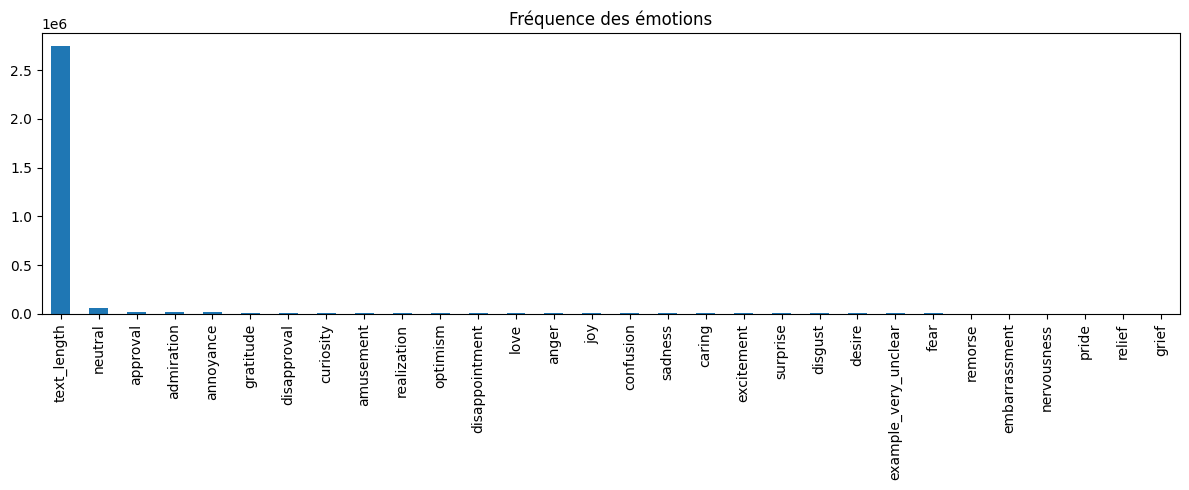

In [4]:
label_cols = [col for col in df.columns if col not in ['text', 'id']]  # ajuste selon les vraies colonnes
print("Nombre de labels :", len(label_cols))

# Fréquence des émotions
emotion_counts = df[label_cols].sum().sort_values(ascending=False)
print("\nDistribution des émotions :")
print(emotion_counts)

# Affichage graphique
import matplotlib.pyplot as plt

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.tight_layout()
plt.show()


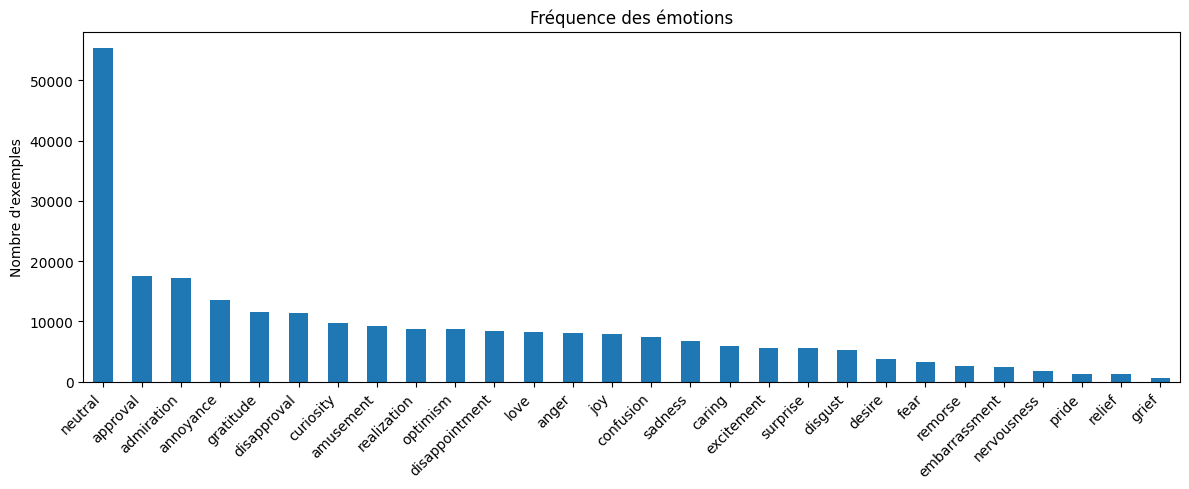

In [16]:
import matplotlib.pyplot as plt

label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'text_length']]
emotion_counts = df[label_cols].sum().sort_values(ascending=False)

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
df['num_labels'] = df[label_cols].sum(axis=1)

print("Nombre moyen d'émotions par texte :", df['num_labels'].mean())
df['num_labels'].value_counts().sort_index()


Nombre moyen d'émotions par texte : 14.194678660196473


num_labels
2       636
3      3837
4      9106
5      9464
6      9646
7      9711
8      9694
9     10066
10    10045
11    10072
12    10404
13    10086
14    10043
15    10257
16     9737
17     9247
18     8847
19     8480
20     7944
21     7357
22     6961
23     6401
24     5921
25     5594
26     4483
27     3308
28     2210
29     1042
30      445
31      118
32       42
33       13
34        6
35        2
Name: count, dtype: int64

In [6]:
multi_label_df = df[df['num_labels'] > 1]
multi_label_df[['text', 'num_labels'] + label_cols].head()


text num_labels  \
0                                    That game hurt.          4   
1   >sexuality shouldn’t be a grouping category I...         22   
2     You do right, if you don't care then fuck 'em!         11   
3                                 Man I love reddit.          5   
4  [NAME] was nowhere near them, he was by the Fa...         11   

   example_very_unclear  admiration  amusement  anger  annoyance  approval  \
0                 False           0          0      0          0         0   
1                  True           0          0      0          0         0   
2                 False           0          0      0          0         0   
3                 False           0          0      0          0         0   
4                 False           0          0      0          0         0   

   caring  confusion  ...  nervousness  optimism  pride  realization  relief  \
0       0          0  ...            0         0      0            0       0   
1       0          0  ...            0         0      0            0       0   
2       0          0  ...            0         0      0            0       0   
3       0          0  ...            0         0      0            0       0   
4       0          0  ...            0         0      0            0       0   

   remorse  sadness  surprise  neutral  text_length  
0        0        1         0        0            3  
1        0        0         0        0           21  
2        0        0         0        1           10  
3        0        0         0        0            4  
4        0        0         0        1           10  

[5 rows x 32 columns]

### Corrélations entre émotions 

In [8]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


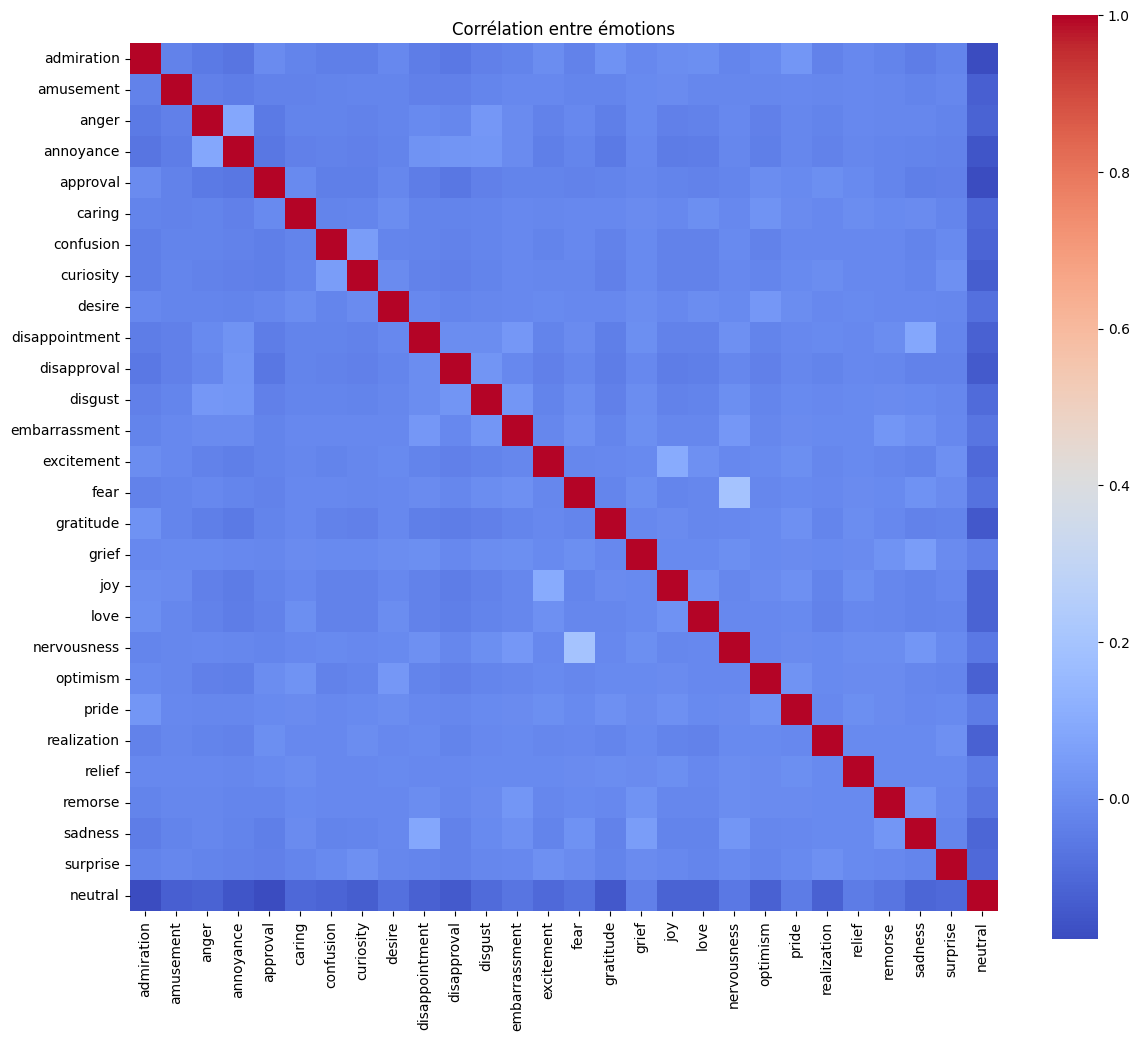

In [8]:
import seaborn as sns

# Matrice de corrélation entre émotions
correlation_matrix = df[label_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Corrélation entre émotions")
plt.show()


### Analyse rare et fréquent

In [7]:
print("Exemples de textes avec 'neutral' :")
print(df[df['neutral'] == 1]['text'].sample(5).values)

print("\nExemples avec 'grief' :")
print(df[df['grief'] == 1]['text'].sample(5).values)


Exemples de textes avec 'neutral' :
['Feb 2nd you reset to zero so call in today to make sure you are healthy call it a health day.'
 '[NAME], u are a real piece of shit' 'Notice how none of them have kids'
 "They did this at one of my jobs. The icing on the 'fuck you cake' was the drivers' last day was 4 days before Christmas."
 'Evil spirit! Leave from this place and never return!!']

Exemples avec 'grief' :
['Yeah, sadly, looks like this champ will be pretty opressive. '
 'How incredibly dangerous' 'LOL THEY DIED? like if you get reference'
 "At least you can't be strangled with a mobile phone."
 "There's a guy that died after he let a horse do that. He'd probably have survived if he sought medical attention sooner."]


### longueur texte par émotion 

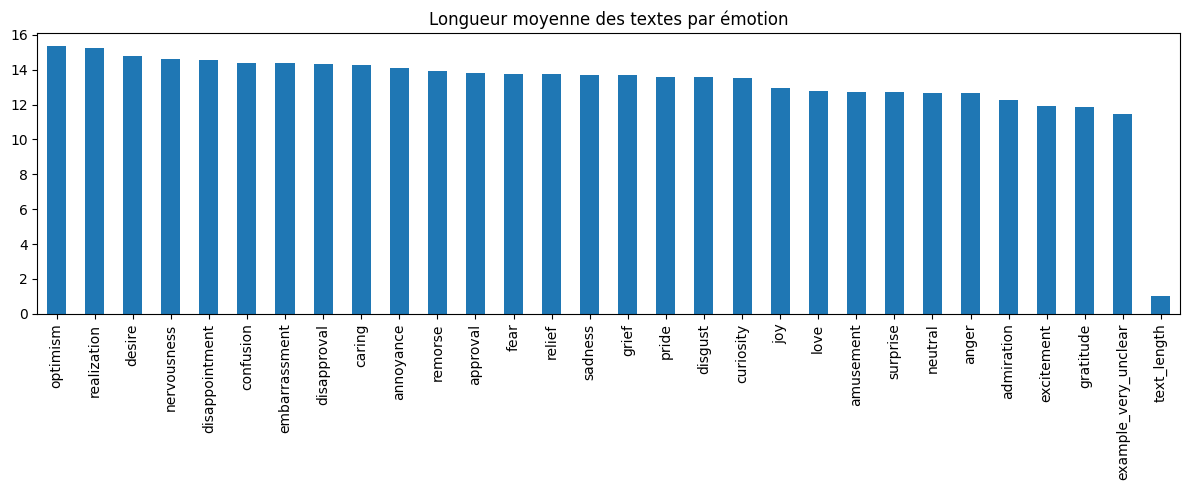

In [8]:
import numpy as np

emotion_lengths = {
    emotion: df[df[emotion] == 1]['text_length'].mean() 
    for emotion in label_cols
}

pd.Series(emotion_lengths).sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title="Longueur moyenne des textes par émotion")
plt.tight_layout()
plt.show()


###  Analyse Exploratoire du Dataset GoEmotions

---

####  1. Structure générale du dataset

- **58 000+ exemples**
- Colonnes principales :
  - `id` (identifiant)
  - `text` (texte du commentaire)
  - `example_very_unclear` (booléen)
  - **30 colonnes binaires** représentant les émotions (`int64`, 0 ou 1)
    - 27 émotions
    - + `neutral`
    - + autres (`example_very_unclear`)

>  **Format multi-label**, chaque exemple peut avoir plusieurs émotions.

---

####  2. Distribution des émotions (fort déséquilibre)

- `neutral` domine largement (**55 298 exemples**)
- Classes fréquentes : `approval`, `admiration`, `gratitude`
- Classes très rares :
  - `grief` (~673)
  - `relief`, `pride`, `nervousness`... (< 2000 exemples)

#####  Implications :
- **Risque de surapprentissage** sur les classes fréquentes
- Besoin probable de :
  - techniques d’**oversampling/undersampling**
  - **pénalisation des classes majoritaires** (`class_weight`, `focal loss`)
  - ou **fusion de certaines classes** si pertinent

---

####  3. Nombre d’étiquettes par texte

- **Moyenne** : ~1.18 émotions/texte
- **170 000 exemples** avec **1 seule étiquette**
- Quelques cas extrêmes : jusqu’à **12 émotions** par texte

#####  Implications :
- Dataset **majoritairement mono-label**
- Tu peux entraîner :
  - Un **modèle mono-label simplifié**
  - Et un **modèle multi-label plus réaliste**

---

####  4. Corrélation entre émotions

- Heatmap = **peu de corrélations fortes globales**
- Quelques cooccurrences naturelles :
  - `admiration` ↔ `gratitude`
  - `disapproval` ↔ `anger`
  - `realization` ↔ `optimism`

#####  Implications :
- Ces associations peuvent être exploitées via :
  - **loss pondérée** (pondérer les erreurs entre émotions proches)
  - **modèle hiérarchique ou graphe de labels**

---

####  5. Longueur moyenne des textes par émotion

- **Longueur moyenne** : ~13 tokens
- Les textes les **plus longs** expriment :
  - `optimism`, `realization`, `desire`
- Les **plus courts** :
  - `gratitude`, `excitement`, `anger`, `neutral`

#####  Implications :
- Les émotions **cognitives ou complexes** nécessitent plus de contexte
- À envisager :
  - **Normalisation de longueur** (padding/troncature)
  - Étude de l'impact de la longueur sur la performance

---

####  Synthèse des forces et problèmes potentiels

| Élément                   | Observation                       | Conséquence                                      |
|---------------------------|-----------------------------------|--------------------------------------------------|
| Format multi-label        | ✅ OK                              | Doit être traité avec **sigmoid** (pas softmax) |
| Déséquilibre des classes  | ❗ Fort                            | Adapter la loss (focal, class weights...)        |
| Étiquettes par texte      | Souvent 1                         | Benchmark mono-label vs. multi-label             |
| Corrélations faibles      | Majoritairement indépendantes     | Potentiel pour graphe ou multi-task              |
| Longueurs des textes      | Variées selon l’émotion           | Adapter tokenizer et **max_length**              |

---


# Traitement des données

In [9]:
# Supprimer les exemples très flous
df_clean = df[(df['example_very_unclear'] == False) & (df['num_labels'] > 0)].copy()

print("Taille du dataset après nettoyage :", df_clean.shape)


Taille du dataset après nettoyage : (207814, 33)


###   Séparation des données

In [13]:
!pip install scikit-learn

In [10]:
from sklearn.model_selection import train_test_split
df_stratifiable = df_clean[df_clean['num_labels'] <= 7].copy()

# Vérification
print(df_stratifiable['num_labels'].value_counts())

# Split maintenant OK avec stratify
df_train, df_temp = train_test_split(df_stratifiable, test_size=0.2, random_state=42, stratify=df_stratifiable['num_labels'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['num_labels'])

print("Train :", df_train.shape)
print("Val :", df_val.shape)
print("Test :", df_test.shape)



num_labels
7    9524
6    9481
5    9235
4    8796
3    3682
2     569
Name: count, dtype: int64
Train : (33029, 33)
Val : (4129, 33)
Test : (4129, 33)


### Préparer les features et labels

In [11]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

# X = textes, y = labels binaires
X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


####  Analyse des poids de classes

In [12]:
import numpy as np

# Fréquence inverse pour class weighting
class_weights = np.sum(y_train, axis=0)
class_weights = 1 / np.log1p(class_weights)  # ou 1/class_freq

# Affichage
for label, weight in zip(label_cols, class_weights):
    print(f"{label}: {weight:.3f}")


admiration: 0.124
amusement: 0.138
anger: 0.137
annoyance: 0.136
approval: 0.131
caring: 0.153
confusion: 0.153
curiosity: 0.142
desire: 0.179
disappointment: 0.152
disapproval: 0.143
disgust: 0.153
embarrassment: 0.189
excitement: 0.143
fear: 0.167
gratitude: 0.128
grief: 0.224
joy: 0.141
love: 0.138
nervousness: 0.193
optimism: 0.159
pride: 0.199
realization: 0.160
relief: 0.202
remorse: 0.182
sadness: 0.147
surprise: 0.149
neutral: 0.108


# Modélisation

## TF IDF + regression logistique

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limite à 10k tokens max pour éviter surdimension
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print("Dimensions TF-IDF :", X_train_tfidf.shape)


Dimensions TF-IDF : (33029, 10000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


lr = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(lr)

clf.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=LogisticRegression(solver='liblinear'))

In [22]:
from sklearn.metrics import classification_report, f1_score, hamming_loss

y_val_pred = clf.predict(X_val_tfidf)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

# Rapport détaillé
print(classification_report(y_val, y_val_pred, target_names=label_cols))


F1 micro : 0.23770491803278687
F1 macro : 0.1698538763928398
Hamming loss : 0.03995943902103671
                precision    recall  f1-score   support

    admiration       0.67      0.27      0.38      1691
     amusement       0.61      0.27      0.37       926
         anger       0.59      0.11      0.18       861
     annoyance       0.37      0.02      0.04      1353
      approval       0.54      0.03      0.06      1794
        caring       0.50      0.03      0.06       577
     confusion       0.66      0.05      0.10       721
     curiosity       0.90      0.04      0.07       947
        desire       0.50      0.07      0.13       361
disappointment       0.61      0.02      0.05       849
   disapproval       0.40      0.01      0.02      1184
       disgust       0.63      0.08      0.14       550
 embarrassment       0.58      0.03      0.05       264
    excitement       0.70      0.06      0.12       553
          fear       0.65      0.16      0.26       318
     gr

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###  Analyse des Résultats - TF-IDF + Logistic Regression

---

#### Résultats globaux

| Indicateur       | Valeur    | Interprétation |
|------------------|-----------|----------------|
| **F1 micro**     | `0.2377`  | Mesure globale sur toutes les émotions, pondérée par fréquence. Correct mais peu discriminant. |
| **F1 macro**     | `0.1698`  | Moyenne simple des F1-score pour chaque émotion. Indique que les classes rares sont très mal prédites. |
| **Hamming Loss** | `0.0399`  | En moyenne, 3.99% des labels sont mal prédits par exemple. Plus c’est bas, mieux c’est. |

---

####  Performances par émotion

#####  Bonnes performances (précision + rappel équilibrés)

| Émotion      | F1-score | Remarques |
|--------------|----------|-----------|
| `gratitude`  | 0.80     | Très bon — émotion claire et bien représentée |
| `love`       | 0.50     | Moyenne correcte — souvent détectée correctement |
| `joy`        | 0.18     | Faible mais attendue pour une émotion plus diffuse |

---

#####  Faibles performances (émotions ignorées ou difficiles)

| Émotion         | F1-score | Remarques |
|-----------------|----------|-----------|
| `grief`         | 0.00     | Trop peu d’exemples pour apprendre correctement |
| `disapproval`   | 0.02     | Mauvais rappel malgré une fréquence modérée |
| `desire`        | 0.13     | Mal capturée, probablement trop abstraite pour TF-IDF |

---

####  Analyse qualitative

- Le modèle **sous-prédit beaucoup** → rappel très bas
- Les émotions les plus simples ou avec des **mots clés explicites** sont mieux détectées (`gratitude`, `excitement`, etc.)
- Les émotions **complexes ou peu fréquentes** sont souvent ignorées

> Le F1-macro très bas montre que le modèle ne généralise pas bien à toutes les classes.

---

####  Limites du modèle

- **TF-IDF** ne capture pas le sens ni le contexte grammatical
- **LogisticRegression (OneVsRest)** ne partage pas d'information entre classes
- Modèle **très sensible au déséquilibre** entre les classes

---

## Autres modèles classifiers

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Initialiser un modèle de forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Wrapping en OneVsRest pour le multi-label
clf_rf = OneVsRestClassifier(rf)

# Entraînement
clf_rf.fit(X_train_tfidf, y_train)

# Prédictions
y_val_pred_rf = clf_rf.predict(X_val_tfidf)


In [29]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

print("F1 micro :", f1_score(y_val, y_val_pred_rf, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_rf, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_rf))

print("\nRapport par classe :")
print(classification_report(y_val, y_val_pred_rf, target_names=label_cols))


F1 micro : 0.3515952143569292
F1 macro : 0.27622241218604354
Hamming loss : 0.04470988587927953

Rapport par classe :
                precision    recall  f1-score   support

    admiration       0.56      0.42      0.48      1691
     amusement       0.54      0.46      0.49       926
         anger       0.44      0.23      0.30       861
     annoyance       0.24      0.11      0.16      1353
      approval       0.32      0.13      0.19      1794
        caring       0.28      0.13      0.18       577
     confusion       0.34      0.17      0.23       721
     curiosity       0.38      0.22      0.28       947
        desire       0.31      0.15      0.20       361
disappointment       0.25      0.12      0.16       849
   disapproval       0.30      0.14      0.19      1184
       disgust       0.38      0.17      0.24       550
 embarrassment       0.26      0.11      0.15       264
    excitement       0.35      0.14      0.20       553
          fear       0.50      0.29      

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###   Alternatives à TF-IDF pour la Vectorisation de Texte

---

####  🔹 1. Bag-of-Words (BoW)

📌 **Description**  
Simple comptage d’occurrences des mots  
Pas de pondération (contrairement au TF-IDF)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(X_train)

 Simple
 Ne tient pas compte de l’importance relative des mots

####   🔹 2. Word Embeddings Moyennés
📌 Description
Moyenne des vecteurs de mots pré-entraînés (ex: GloVe, FastText, Word2Vec)

import numpy as np
import gensim.downloader as api

#####   Charger un modèle GloVe ou FastText
glove = api.load("glove-wiki-gigaword-100")  # 100 dimensions

def vectorize_avg(text):
    words = text.lower().split()
    vectors = [glove[word] for word in words if word in glove]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_train_embed = np.array([vectorize_avg(t) for t in X_train])
✅ Vecteurs denses, conserve un peu de sens
❌ Perte de l’ordre, dépend du modèle choisi

####  3. Doc2Vec (gensim)
📌 Description
Crée un vecteur de document entier, entraîné sur le corpus
Basé sur Word2Vec + contexte global

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_docs = [TaggedDocument(words=text.lower().split(), tags=[i]) for i, text in enumerate(X_train)]
model = Doc2Vec(tagged_docs, vector_size=100, epochs=20)

X_train_vec = np.array([model.infer_vector(t.words) for t in tagged_docs])
✅ Encode mieux le contexte document
❌ Long à entraîner, dépend du volume

####  🔹 4. Sentence Embeddings (BERT-like)
📌 Description
Utilise des modèles de type Sentence-BERT ou USE pour obtenir un vecteur sémantique dense du texte entier

Exemple avec Sentence-BERT :

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_sbert = model.encode(X_train, show_progress_bar=True)
✅ Très puissant pour la sémantique
✅ Fonctionne bien en downstream task (multi-label)
❌ Plus lent et demande des ressources

#### 🔹 5. Transformer Fine-Tuning (End-to-End)
📌 Description
Pas une "vectorisation" mais plutôt un fine-tuning complet
On entraîne le modèle comme un classifieur

from transformers import AutoTokenizer, AutoModelForSequenceClassification
#####  Exemple : "roberta-base" ou "distilbert-base-uncased"
 Meilleures performances globales
 Nécessite GPU pour entraînement efficace

#### 🧪 Comparatif résumé

| Méthode                  | Dense ? | Sémantique ? | Ordre ? | Performance |
|--------------------------|---------|--------------|---------|-------------|
| **BoW / TF-IDF**         | ❌       | ❌            | ❌       | Moyen        |
| **Embeddings Moyens**    | ✅       | 🟡            | ❌       | Moyen+       |
| **Doc2Vec**              | ✅       | ✅            | ✅       | Bon          |
| **Sentence-BERT / USE**  | ✅       | ✅✅           | ✅       | Très bon     |
| **Transformer Fine-Tune**| ✅       | ✅✅✅          | ✅       | Excellent    |


# Véctorization + Transformers léger

Objectif : capturer plus de sens, sans faire du finetuning

## Récupération du jeu de données

In [23]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


### remarques

Sentence-BERT = BERT + pooling → encoder de manière sémantique le texte entier.
Il doit recevoir le texte brut, tel qu’il est écrit, pour fonctionner comme prévu.

si je fais du nettoyage comme je l'ai pour TF-IDF, je risque de dégrader ses performances.

In [19]:
!pip install transformers
!pip install sentence-transformers


  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
Using cached sentence_transformers-5.0.0-py3-none-any.whl (470 kB)


### Vectorizaition via transformers

In [17]:
from sentence_transformers import SentenceTransformer

# Charger un modèle rapide et performant
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')  # 384 dimensions

# Encoder les textes (⚠️ ça peut prendre quelques minutes)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


Batches:   0%|          | 0/5196 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

### entrainement modele

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(max_iter=1000)
clf_sbert = OneVsRestClassifier(lr)

clf_sbert.fit(X_train_sbert, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

### évaluation



In [33]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

y_val_pred_sbert = clf_sbert.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_sbert, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_sbert, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_sbert))

print("\nRapport détaillé par classe :")
print(classification_report(y_val, y_val_pred_sbert, target_names=label_cols))


F1 micro : 0.18433903630092546
F1 macro : 0.12375796103516999
Hamming loss : 0.04105080434483707

Rapport détaillé par classe :
                precision    recall  f1-score   support

    admiration       0.61      0.20      0.30      1691
     amusement       0.63      0.29      0.40       926
         anger       0.71      0.07      0.12       861
     annoyance       0.44      0.00      0.01      1353
      approval       0.58      0.01      0.02      1794
        caring       0.38      0.03      0.05       577
     confusion       0.52      0.02      0.03       721
     curiosity       0.43      0.03      0.06       947
        desire       0.46      0.03      0.06       361
disappointment       0.00      0.00      0.00       849
   disapproval       0.52      0.01      0.02      1184
       disgust       0.52      0.05      0.09       550
 embarrassment       0.33      0.00      0.01       264
    excitement       0.72      0.03      0.06       553
          fear       0.66      

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## modèles plus lourds sans fine tine : mpnet 

In [18]:
from sentence_transformers import SentenceTransformer

# Modèle puissant (768 dimensions)
sbert_model = SentenceTransformer('all-mpnet-base-v2')

# Encodage (attention : plus lent que MiniLM)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


Batches:   0%|          | 0/5196 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

Batches:   0%|          | 0/650 [00:00<?, ?it/s]

### avec logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train_sbert, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [36]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred = clf.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred, target_names=label_cols))


F1 micro : 0.17145418807545088
F1 macro : 0.11193620140416258
Hamming loss : 0.04129485769283652

Classification report:
                precision    recall  f1-score   support

    admiration       0.56      0.18      0.28      1691
     amusement       0.59      0.24      0.34       926
         anger       0.64      0.07      0.12       861
     annoyance       0.50      0.00      0.00      1353
      approval       0.55      0.01      0.02      1794
        caring       0.41      0.02      0.04       577
     confusion       0.37      0.01      0.02       721
     curiosity       0.38      0.02      0.04       947
        desire       0.41      0.03      0.06       361
disappointment       0.50      0.00      0.01       849
   disapproval       0.32      0.01      0.01      1184
       disgust       0.55      0.04      0.08       550
 embarrassment       0.67      0.01      0.01       264
    excitement       0.69      0.02      0.04       553
          fear       0.64      0.12   

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### avec mlp classifier

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Définir un MLP simple
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), 
                    activation='relu', 
                    max_iter=20, 
                    random_state=42, 
                    verbose=True)

clf_mlp = OneVsRestClassifier(mlp)

# Entraîner sur les embeddings SBERT
clf_mlp.fit(X_train_sbert, y_train)


Iteration 1, loss = 0.21986692
Iteration 2, loss = 0.19305314
Iteration 3, loss = 0.17824142
Iteration 4, loss = 0.16471129
Iteration 5, loss = 0.15467911
Iteration 6, loss = 0.14669098
Iteration 7, loss = 0.13943275
Iteration 8, loss = 0.13369726
Iteration 9, loss = 0.12865318
Iteration 10, loss = 0.12350687
Iteration 11, loss = 0.11949993
Iteration 12, loss = 0.11643600
Iteration 13, loss = 0.11331633
Iteration 14, loss = 0.11076156
Iteration 15, loss = 0.10934652
Iteration 16, loss = 0.10726288
Iteration 17, loss = 0.10634303
Iteration 18, loss = 0.10477844
Iteration 19, loss = 0.10327573
Iteration 20, loss = 0.10274079


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.12599606
Iteration 2, loss = 0.10311343
Iteration 3, loss = 0.09457339
Iteration 4, loss = 0.08712915
Iteration 5, loss = 0.08078063
Iteration 6, loss = 0.07554254
Iteration 7, loss = 0.07154427
Iteration 8, loss = 0.06826224
Iteration 9, loss = 0.06548278
Iteration 10, loss = 0.06318733
Iteration 11, loss = 0.06140198
Iteration 12, loss = 0.06017107
Iteration 13, loss = 0.05899674
Iteration 14, loss = 0.05787746
Iteration 15, loss = 0.05764246
Iteration 16, loss = 0.05706182
Iteration 17, loss = 0.05579393
Iteration 18, loss = 0.05525192
Iteration 19, loss = 0.05450841
Iteration 20, loss = 0.05426705


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14220202
Iteration 2, loss = 0.12456014
Iteration 3, loss = 0.11656936
Iteration 4, loss = 0.10790627
Iteration 5, loss = 0.10010375
Iteration 6, loss = 0.09336265
Iteration 7, loss = 0.08858336
Iteration 8, loss = 0.08356459
Iteration 9, loss = 0.07949730
Iteration 10, loss = 0.07604662
Iteration 11, loss = 0.07322515
Iteration 12, loss = 0.07111472
Iteration 13, loss = 0.06953017
Iteration 14, loss = 0.06815846
Iteration 15, loss = 0.06689049
Iteration 16, loss = 0.06627899
Iteration 17, loss = 0.06571420
Iteration 18, loss = 0.06483582
Iteration 19, loss = 0.06420318
Iteration 20, loss = 0.06382241


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.22484454
Iteration 2, loss = 0.21000523
Iteration 3, loss = 0.20194615
Iteration 4, loss = 0.19118952
Iteration 5, loss = 0.18036498
Iteration 6, loss = 0.17031885
Iteration 7, loss = 0.16249609
Iteration 8, loss = 0.15467265
Iteration 9, loss = 0.14807867
Iteration 10, loss = 0.14222257
Iteration 11, loss = 0.13715812
Iteration 12, loss = 0.13267870
Iteration 13, loss = 0.13049360
Iteration 14, loss = 0.12798267
Iteration 15, loss = 0.12625500
Iteration 16, loss = 0.12489548
Iteration 17, loss = 0.12339525
Iteration 18, loss = 0.12248488
Iteration 19, loss = 0.12163333
Iteration 20, loss = 0.12077859


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.28106834
Iteration 2, loss = 0.26721938
Iteration 3, loss = 0.25799075
Iteration 4, loss = 0.24541936
Iteration 5, loss = 0.23291305
Iteration 6, loss = 0.22204109
Iteration 7, loss = 0.21304375
Iteration 8, loss = 0.20522299
Iteration 9, loss = 0.19819914
Iteration 10, loss = 0.19127076
Iteration 11, loss = 0.18524697
Iteration 12, loss = 0.17940470
Iteration 13, loss = 0.17397063
Iteration 14, loss = 0.16970803
Iteration 15, loss = 0.16580636
Iteration 16, loss = 0.16275250
Iteration 17, loss = 0.16005243
Iteration 18, loss = 0.15919306
Iteration 19, loss = 0.15672173
Iteration 20, loss = 0.15579056


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11658256
Iteration 2, loss = 0.10127100
Iteration 3, loss = 0.09525753
Iteration 4, loss = 0.08832716
Iteration 5, loss = 0.08178068
Iteration 6, loss = 0.07587272
Iteration 7, loss = 0.07099567
Iteration 8, loss = 0.06646199
Iteration 9, loss = 0.06274055
Iteration 10, loss = 0.05954075
Iteration 11, loss = 0.05740272
Iteration 12, loss = 0.05629848
Iteration 13, loss = 0.05501615
Iteration 14, loss = 0.05428924
Iteration 15, loss = 0.05364764
Iteration 16, loss = 0.05294039
Iteration 17, loss = 0.05282167
Iteration 18, loss = 0.05208909
Iteration 19, loss = 0.05213623
Iteration 20, loss = 0.05154515


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14070392
Iteration 2, loss = 0.12460201
Iteration 3, loss = 0.11570904
Iteration 4, loss = 0.10573691
Iteration 5, loss = 0.09752443
Iteration 6, loss = 0.09094967
Iteration 7, loss = 0.08545545
Iteration 8, loss = 0.08046631
Iteration 9, loss = 0.07570058
Iteration 10, loss = 0.07249880
Iteration 11, loss = 0.06946358
Iteration 12, loss = 0.06774599
Iteration 13, loss = 0.06580001
Iteration 14, loss = 0.06485614
Iteration 15, loss = 0.06377250
Iteration 16, loss = 0.06366162
Iteration 17, loss = 0.06225785
Iteration 18, loss = 0.06229789
Iteration 19, loss = 0.06193088
Iteration 20, loss = 0.06129057


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.16380833
Iteration 2, loss = 0.14141260
Iteration 3, loss = 0.12780949
Iteration 4, loss = 0.11654256
Iteration 5, loss = 0.10750771
Iteration 6, loss = 0.10055853
Iteration 7, loss = 0.09516022
Iteration 8, loss = 0.09013545
Iteration 9, loss = 0.08591178
Iteration 10, loss = 0.08238027
Iteration 11, loss = 0.07936420
Iteration 12, loss = 0.07772272
Iteration 13, loss = 0.07592918
Iteration 14, loss = 0.07484652
Iteration 15, loss = 0.07392341
Iteration 16, loss = 0.07265243
Iteration 17, loss = 0.07285233
Iteration 18, loss = 0.07147269
Iteration 19, loss = 0.07032109
Iteration 20, loss = 0.06980505


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.08602253
Iteration 2, loss = 0.07097477
Iteration 3, loss = 0.06652403
Iteration 4, loss = 0.06128657
Iteration 5, loss = 0.05606116
Iteration 6, loss = 0.05159494
Iteration 7, loss = 0.04796888
Iteration 8, loss = 0.04423474
Iteration 9, loss = 0.04147941
Iteration 10, loss = 0.03908884
Iteration 11, loss = 0.03726738
Iteration 12, loss = 0.03619322
Iteration 13, loss = 0.03536247
Iteration 14, loss = 0.03514320
Iteration 15, loss = 0.03457453
Iteration 16, loss = 0.03398341
Iteration 17, loss = 0.03383317
Iteration 18, loss = 0.03380058
Iteration 19, loss = 0.03323805
Iteration 20, loss = 0.03313045


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.16286041
Iteration 2, loss = 0.14890656
Iteration 3, loss = 0.14288651
Iteration 4, loss = 0.13491183
Iteration 5, loss = 0.12594343
Iteration 6, loss = 0.11831690
Iteration 7, loss = 0.11169527
Iteration 8, loss = 0.10572752
Iteration 9, loss = 0.09984867
Iteration 10, loss = 0.09469124
Iteration 11, loss = 0.09077607
Iteration 12, loss = 0.08802819
Iteration 13, loss = 0.08561424
Iteration 14, loss = 0.08408451
Iteration 15, loss = 0.08319266
Iteration 16, loss = 0.08201582
Iteration 17, loss = 0.08131265
Iteration 18, loss = 0.08031399
Iteration 19, loss = 0.07986766
Iteration 20, loss = 0.07932615


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.19535814
Iteration 2, loss = 0.17958074
Iteration 3, loss = 0.17149224
Iteration 4, loss = 0.16124002
Iteration 5, loss = 0.15114734
Iteration 6, loss = 0.14206360
Iteration 7, loss = 0.13529789
Iteration 8, loss = 0.12889064
Iteration 9, loss = 0.12303168
Iteration 10, loss = 0.11773935
Iteration 11, loss = 0.11291431
Iteration 12, loss = 0.10955768
Iteration 13, loss = 0.10675005
Iteration 14, loss = 0.10507680
Iteration 15, loss = 0.10271345
Iteration 16, loss = 0.10182105
Iteration 17, loss = 0.10171381
Iteration 18, loss = 0.09980111
Iteration 19, loss = 0.09941791
Iteration 20, loss = 0.09885785


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.10817597
Iteration 2, loss = 0.09301056
Iteration 3, loss = 0.08743686
Iteration 4, loss = 0.08113946
Iteration 5, loss = 0.07474996
Iteration 6, loss = 0.06923454
Iteration 7, loss = 0.06464009
Iteration 8, loss = 0.06021698
Iteration 9, loss = 0.05675162
Iteration 10, loss = 0.05405974
Iteration 11, loss = 0.05173599
Iteration 12, loss = 0.05070184
Iteration 13, loss = 0.04988718
Iteration 14, loss = 0.04927632
Iteration 15, loss = 0.04870519
Iteration 16, loss = 0.04802581
Iteration 17, loss = 0.04788623
Iteration 18, loss = 0.04701611
Iteration 19, loss = 0.04701618
Iteration 20, loss = 0.04675985


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.06690853
Iteration 2, loss = 0.05286465
Iteration 3, loss = 0.04883753
Iteration 4, loss = 0.04436532
Iteration 5, loss = 0.04019703
Iteration 6, loss = 0.03640592
Iteration 7, loss = 0.03345410
Iteration 8, loss = 0.03043449
Iteration 9, loss = 0.02840380
Iteration 10, loss = 0.02670081
Iteration 11, loss = 0.02574117
Iteration 12, loss = 0.02529667
Iteration 13, loss = 0.02454839
Iteration 14, loss = 0.02444286
Iteration 15, loss = 0.02482531
Iteration 16, loss = 0.02383873
Iteration 17, loss = 0.02388661
Iteration 18, loss = 0.02350931
Iteration 19, loss = 0.02370081
Iteration 20, loss = 0.02315832


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11505455
Iteration 2, loss = 0.10036071
Iteration 3, loss = 0.09503470
Iteration 4, loss = 0.08890145
Iteration 5, loss = 0.08186268
Iteration 6, loss = 0.07593448
Iteration 7, loss = 0.07058536
Iteration 8, loss = 0.06613515
Iteration 9, loss = 0.06206822
Iteration 10, loss = 0.05889191
Iteration 11, loss = 0.05669696
Iteration 12, loss = 0.05526415
Iteration 13, loss = 0.05416003
Iteration 14, loss = 0.05336752
Iteration 15, loss = 0.05308538
Iteration 16, loss = 0.05226486
Iteration 17, loss = 0.05173460
Iteration 18, loss = 0.05141752
Iteration 19, loss = 0.05064400
Iteration 20, loss = 0.05110541


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.06902676
Iteration 2, loss = 0.05334634
Iteration 3, loss = 0.04863715
Iteration 4, loss = 0.04386135
Iteration 5, loss = 0.03977990
Iteration 6, loss = 0.03668959
Iteration 7, loss = 0.03414646
Iteration 8, loss = 0.03185608
Iteration 9, loss = 0.02965885
Iteration 10, loss = 0.02816574
Iteration 11, loss = 0.02713219
Iteration 12, loss = 0.02626935
Iteration 13, loss = 0.02569828
Iteration 14, loss = 0.02544194
Iteration 15, loss = 0.02505619
Iteration 16, loss = 0.02450042
Iteration 17, loss = 0.02438995
Iteration 18, loss = 0.02451284
Iteration 19, loss = 0.02388589
Iteration 20, loss = 0.02420353


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11112797
Iteration 2, loss = 0.08202046
Iteration 3, loss = 0.07205983
Iteration 4, loss = 0.06549094
Iteration 5, loss = 0.05989625
Iteration 6, loss = 0.05594452
Iteration 7, loss = 0.05201981
Iteration 8, loss = 0.04939538
Iteration 9, loss = 0.04660989
Iteration 10, loss = 0.04474338
Iteration 11, loss = 0.04301300
Iteration 12, loss = 0.04170901
Iteration 13, loss = 0.04061672
Iteration 14, loss = 0.03978419
Iteration 15, loss = 0.03924132
Iteration 16, loss = 0.03858203
Iteration 17, loss = 0.03761487
Iteration 18, loss = 0.03717774
Iteration 19, loss = 0.03663401
Iteration 20, loss = 0.03593018


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.02763814
Iteration 2, loss = 0.01583096
Iteration 3, loss = 0.01455048
Iteration 4, loss = 0.01329556
Iteration 5, loss = 0.01207277
Iteration 6, loss = 0.01071651
Iteration 7, loss = 0.00955657
Iteration 8, loss = 0.00876616
Iteration 9, loss = 0.00822972
Iteration 10, loss = 0.00784523
Iteration 11, loss = 0.00777890
Iteration 12, loss = 0.00764137
Iteration 13, loss = 0.00763616
Iteration 14, loss = 0.00738454
Iteration 15, loss = 0.00746235
Iteration 16, loss = 0.00745161
Iteration 17, loss = 0.00731057
Iteration 18, loss = 0.00730013
Iteration 19, loss = 0.00725803
Iteration 20, loss = 0.00733322


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.14197987
Iteration 2, loss = 0.12468423
Iteration 3, loss = 0.11703386
Iteration 4, loss = 0.10866064
Iteration 5, loss = 0.10071975
Iteration 6, loss = 0.09444843
Iteration 7, loss = 0.08880284
Iteration 8, loss = 0.08405653
Iteration 9, loss = 0.07989156
Iteration 10, loss = 0.07630331
Iteration 11, loss = 0.07353374
Iteration 12, loss = 0.07092211
Iteration 13, loss = 0.06956470
Iteration 14, loss = 0.06858303
Iteration 15, loss = 0.06766008
Iteration 16, loss = 0.06666340
Iteration 17, loss = 0.06581681
Iteration 18, loss = 0.06544484
Iteration 19, loss = 0.06469750
Iteration 20, loss = 0.06395559


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11302744
Iteration 2, loss = 0.08873964
Iteration 3, loss = 0.07906562
Iteration 4, loss = 0.07121962
Iteration 5, loss = 0.06559820
Iteration 6, loss = 0.06157832
Iteration 7, loss = 0.05879101
Iteration 8, loss = 0.05581812
Iteration 9, loss = 0.05378522
Iteration 10, loss = 0.05193468
Iteration 11, loss = 0.05014802
Iteration 12, loss = 0.04880574
Iteration 13, loss = 0.04768527
Iteration 14, loss = 0.04684928
Iteration 15, loss = 0.04585848
Iteration 16, loss = 0.04558884
Iteration 17, loss = 0.04476257
Iteration 18, loss = 0.04422596
Iteration 19, loss = 0.04427024
Iteration 20, loss = 0.04324533


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.05322185
Iteration 2, loss = 0.04066343
Iteration 3, loss = 0.03813088
Iteration 4, loss = 0.03507599
Iteration 5, loss = 0.03157612
Iteration 6, loss = 0.02836487
Iteration 7, loss = 0.02541628
Iteration 8, loss = 0.02297511
Iteration 9, loss = 0.02112148
Iteration 10, loss = 0.02021175
Iteration 11, loss = 0.01940890
Iteration 12, loss = 0.01903354
Iteration 13, loss = 0.01889126
Iteration 14, loss = 0.01878952
Iteration 15, loss = 0.01850361
Iteration 16, loss = 0.01829892
Iteration 17, loss = 0.01830303
Iteration 18, loss = 0.01802578
Iteration 19, loss = 0.01796645
Iteration 20, loss = 0.01794031


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.15302809
Iteration 2, loss = 0.13702803
Iteration 3, loss = 0.12887174
Iteration 4, loss = 0.12015634
Iteration 5, loss = 0.11154347
Iteration 6, loss = 0.10495176
Iteration 7, loss = 0.09941668
Iteration 8, loss = 0.09372627
Iteration 9, loss = 0.09010163
Iteration 10, loss = 0.08586969
Iteration 11, loss = 0.08224388
Iteration 12, loss = 0.07941818
Iteration 13, loss = 0.07724380
Iteration 14, loss = 0.07517376
Iteration 15, loss = 0.07435162
Iteration 16, loss = 0.07335034
Iteration 17, loss = 0.07238931
Iteration 18, loss = 0.07162154
Iteration 19, loss = 0.07122480
Iteration 20, loss = 0.07011413


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.04415253
Iteration 2, loss = 0.03200970
Iteration 3, loss = 0.02986606
Iteration 4, loss = 0.02707106
Iteration 5, loss = 0.02418485
Iteration 6, loss = 0.02143494
Iteration 7, loss = 0.01891345
Iteration 8, loss = 0.01716271
Iteration 9, loss = 0.01574071
Iteration 10, loss = 0.01498298
Iteration 11, loss = 0.01454859
Iteration 12, loss = 0.01425185
Iteration 13, loss = 0.01431676
Iteration 14, loss = 0.01387720
Iteration 15, loss = 0.01366061
Iteration 16, loss = 0.01383680
Iteration 17, loss = 0.01376801
Iteration 18, loss = 0.01351573
Iteration 19, loss = 0.01351111
Iteration 20, loss = 0.01364468


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.17356787
Iteration 2, loss = 0.16072728
Iteration 3, loss = 0.15442358
Iteration 4, loss = 0.14560434
Iteration 5, loss = 0.13559328
Iteration 6, loss = 0.12641299
Iteration 7, loss = 0.11936253
Iteration 8, loss = 0.11276043
Iteration 9, loss = 0.10672125
Iteration 10, loss = 0.10125894
Iteration 11, loss = 0.09616919
Iteration 12, loss = 0.09344387
Iteration 13, loss = 0.09084049
Iteration 14, loss = 0.08873157
Iteration 15, loss = 0.08737248
Iteration 16, loss = 0.08631135
Iteration 17, loss = 0.08549653
Iteration 18, loss = 0.08454730
Iteration 19, loss = 0.08353776
Iteration 20, loss = 0.08309167


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.04354122
Iteration 2, loss = 0.03044390
Iteration 3, loss = 0.02830864
Iteration 4, loss = 0.02565419
Iteration 5, loss = 0.02270127
Iteration 6, loss = 0.02030025
Iteration 7, loss = 0.01808602
Iteration 8, loss = 0.01624441
Iteration 9, loss = 0.01522417
Iteration 10, loss = 0.01427573
Iteration 11, loss = 0.01411033
Iteration 12, loss = 0.01393278
Iteration 13, loss = 0.01363864
Iteration 14, loss = 0.01343269
Iteration 15, loss = 0.01355809
Iteration 16, loss = 0.01332113
Iteration 17, loss = 0.01308031
Iteration 18, loss = 0.01303931
Iteration 19, loss = 0.01331016
Iteration 20, loss = 0.01295032


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.05795269
Iteration 2, loss = 0.04255196
Iteration 3, loss = 0.03855637
Iteration 4, loss = 0.03444878
Iteration 5, loss = 0.03084770
Iteration 6, loss = 0.02804317
Iteration 7, loss = 0.02574265
Iteration 8, loss = 0.02400435
Iteration 9, loss = 0.02241114
Iteration 10, loss = 0.02174906
Iteration 11, loss = 0.02129824
Iteration 12, loss = 0.02065870
Iteration 13, loss = 0.02048138
Iteration 14, loss = 0.02006424
Iteration 15, loss = 0.01994440
Iteration 16, loss = 0.02001213
Iteration 17, loss = 0.01979881
Iteration 18, loss = 0.01971657
Iteration 19, loss = 0.01976974
Iteration 20, loss = 0.01935669


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.12301517
Iteration 2, loss = 0.10570285
Iteration 3, loss = 0.09796888
Iteration 4, loss = 0.09026852
Iteration 5, loss = 0.08369714
Iteration 6, loss = 0.07815925
Iteration 7, loss = 0.07334826
Iteration 8, loss = 0.06932704
Iteration 9, loss = 0.06572730
Iteration 10, loss = 0.06260721
Iteration 11, loss = 0.06004691
Iteration 12, loss = 0.05876481
Iteration 13, loss = 0.05716512
Iteration 14, loss = 0.05610670
Iteration 15, loss = 0.05576520
Iteration 16, loss = 0.05516378
Iteration 17, loss = 0.05420250
Iteration 18, loss = 0.05371004
Iteration 19, loss = 0.05365214
Iteration 20, loss = 0.05306532


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.11291589
Iteration 2, loss = 0.09449249
Iteration 3, loss = 0.08643902
Iteration 4, loss = 0.07832517
Iteration 5, loss = 0.07104563
Iteration 6, loss = 0.06609949
Iteration 7, loss = 0.06136418
Iteration 8, loss = 0.05788745
Iteration 9, loss = 0.05434005
Iteration 10, loss = 0.05172277
Iteration 11, loss = 0.04974597
Iteration 12, loss = 0.04838614
Iteration 13, loss = 0.04761345
Iteration 14, loss = 0.04701968
Iteration 15, loss = 0.04618861
Iteration 16, loss = 0.04563381
Iteration 17, loss = 0.04515845
Iteration 18, loss = 0.04497259
Iteration 19, loss = 0.04439057
Iteration 20, loss = 0.04488172


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 0.53153437
Iteration 2, loss = 0.51015658
Iteration 3, loss = 0.49031114
Iteration 4, loss = 0.47004409
Iteration 5, loss = 0.45244934
Iteration 6, loss = 0.43727421
Iteration 7, loss = 0.42417862
Iteration 8, loss = 0.41392867
Iteration 9, loss = 0.40489105
Iteration 10, loss = 0.39679347
Iteration 11, loss = 0.39046795
Iteration 12, loss = 0.38483285
Iteration 13, loss = 0.37956390
Iteration 14, loss = 0.37501145
Iteration 15, loss = 0.36990656
Iteration 16, loss = 0.36658136
Iteration 17, loss = 0.36344834
Iteration 18, loss = 0.35993986
Iteration 19, loss = 0.35640361
Iteration 20, loss = 0.35295308


c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


OneVsRestClassifier(estimator=MLPClassifier(hidden_layer_sizes=(256, 128),
                                            max_iter=20, random_state=42,
                                            verbose=True))

In [38]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred_mlp = clf_mlp.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_mlp, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_mlp, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_mlp))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred_mlp, target_names=label_cols))


F1 micro : 0.35009047281881833
F1 macro : 0.2669807818737127
Hamming loss : 0.0425941839681012

Classification report:
                precision    recall  f1-score   support

    admiration       0.60      0.38      0.47      1691
     amusement       0.56      0.41      0.47       926
         anger       0.51      0.22      0.30       861
     annoyance       0.31      0.11      0.16      1353
      approval       0.38      0.12      0.19      1794
        caring       0.35      0.13      0.19       577
     confusion       0.40      0.15      0.22       721
     curiosity       0.43      0.24      0.31       947
        desire       0.35      0.16      0.22       361
disappointment       0.30      0.07      0.11       849
   disapproval       0.33      0.13      0.18      1184
       disgust       0.43      0.15      0.22       550
 embarrassment       0.43      0.14      0.21       264
    excitement       0.39      0.15      0.22       553
          fear       0.56      0.25     

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## light gbm avec mlp

In [23]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [39]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier

lgbm = lgb.LGBMClassifier(objective='binary', n_estimators=100, random_state=42)
clf_lgbm = MultiOutputClassifier(lgbm)

clf_lgbm.fit(X_train_sbert, y_train)
y_val_pred_lgbm = clf_lgbm.predict(X_val_sbert)


[LightGBM] [Info] Number of positive: 13701, number of negative: 152541
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.175336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 166242, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082416 -> initscore=-2.409965
[LightGBM] [Info] Start training from score -2.409965
[LightGBM] [Info] Number of positive: 7404, number of negative: 158838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 166242, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044537 -> initscore=-3.065864
[LightGBM] [Info] Start training from score -3.065864
[Li

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib

In [40]:
print("LightGBM")
print("F1 micro :", f1_score(y_val, y_val_pred_lgbm, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_lgbm, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_lgbm))


LightGBM
F1 micro : 0.18525210513755838
F1 macro : 0.16807864535555164
Hamming loss : 0.041074865942527156


## USE + MLPClassifier

### Encodage avec Universal Sentence Encoder

In [25]:
!pip install tensorflow-hub

!pip install tensorflow-text

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 1.3/375.7 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 2.6/375.7 MB 6.6 MB/s eta 0:00:57
   ---------------------------------------- 4.2/375.7 MB 6.6 MB/s eta 0:00:57
    --------------------------------------- 5.5/375.7 MB 6.7 MB/s eta 0:00

In [47]:
!python -m pip install "tensorflow<2.11"




ERROR: Could not find a version that satisfies the requirement tensorflow<2.11 (from versions: none)
ERROR: No matching distribution found for tensorflow<2.11


In [41]:
import tensorflow_hub as hub

# Charger USE depuis TensorFlow Hub
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encodage (⚠️ long sur CPU)
X_train_use = use_model(X_train).numpy()
X_val_use = use_model(X_val).numpy()
X_test_use = use_model(X_test).numpy()




Failed to import tensorflow. Please note that tensorflow is not installed by default when you install tensorflow_hub. This is so that users can decide which tensorflow package to use. To use tensorflow_hub, please install a current version of tensorflow by following the instructions at https://tensorflow.org/install and https://tensorflow.org/hub/installation.




ModuleNotFoundError: No module named 'tensorflow'

### mlp classif avec use 

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=20, random_state=42, verbose=True)
clf_use_mlp = OneVsRestClassifier(mlp)

clf_use_mlp.fit(X_train_use, y_train)
y_val_pred_use = clf_use_mlp.predict(X_val_use)

NameError: name 'X_train_use' is not defined

### Evaluation

In [ ]:
print("USE + MLPClassifier")
print("F1 micro :", f1_score(y_val, y_val_pred_use, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_use, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_use))


# Fine tuning Roberta 

fine tuning dun gros transformers pour les vecteurs les plus riches possible

In [24]:
!pip install transformers datasets evaluate scikit-learn


  Using cached evaluate-0.4.4-py3-none-any.whl.metadata (9.5 kB)
Using cached evaluate-0.4.4-py3-none-any.whl (84 kB)


In [24]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

dataset = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})



In [18]:
df_train.columns

Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral', 'text_length', 'num_labels'],
      dtype='object')

### Tokenisation

In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)



Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

In [20]:
# Liste des colonnes d'émotions à extraire
emotion_columns = [
    'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
    'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
    'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
    'sadness', 'surprise', 'neutral'
] 

def convert_labels_to_float(example):
    labels = [float(example[col]) for col in emotion_columns]
    example["labels"] = labels
    return example
tokenized_dataset["train"] = tokenized_dataset["train"].map(convert_labels_to_float)
tokenized_dataset["validation"] = tokenized_dataset["validation"].map(convert_labels_to_float)
tokenized_dataset["test"] = tokenized_dataset["test"].map(convert_labels_to_float)


Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

### Format pour entraînement

In [21]:
def convert_labels(example):
    example["labels"] = [float(example[col]) for col in emotion_columns]
    return example

tokenized_dataset = tokenized_dataset.map(convert_labels)

Map:   0%|          | 0/166242 [00:00<?, ? examples/s]

Map:   0%|          | 0/20780 [00:00<?, ? examples/s]

Map:   0%|          | 0/20781 [00:00<?, ? examples/s]

In [22]:
print(tokenized_dataset["train"][0].keys())


dict_keys(['id', 'text', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral', 'text_length', 'num_labels', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'])


In [23]:
# retirer colonne inutlie
tokenized_dataset = tokenized_dataset.remove_columns(["text", "__index_level_0__"] + list(emotion_columns))

tokenized_dataset.set_format("torch")



### Modèle + entraînement

In [31]:
!pip uninstall -y tensorflow tensorflow-cpu tensorflow-gpu tf-nightly keras

Found existing installation: tensorflow 2.10.1
Uninstalling tensorflow-2.10.1:
  Successfully uninstalled tensorflow-2.10.1
Found existing installation: keras 2.10.0
Uninstalling keras-2.10.0:
  Successfully uninstalled keras-2.10.0


You can safely remove it manually.


In [34]:
!pip uninstall -y transformers
!pip install transformers==4.41.2


Found existing installation: transformers 4.53.0
Uninstalling transformers-4.53.0:
  Successfully uninstalled transformers-4.53.0
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.1 MB 3.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.8/9.1 MB 4.8 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.1 MB 5.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.7/9.1 MB 6.1 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------- ----- 7.9/9.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/

  You can safely remove it manually.


In [24]:


import transformers
print(transformers.__version__)
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=29,
    problem_type="multi_label_classification"
)

4.53.0


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Entraînement avec Trainer



In [33]:
!pip install --upgrade transformers


  Using cached transformers-4.53.0-py3-none-any.whl.metadata (39 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
Using cached transformers-4.53.0-py3-none-any.whl (10.8 MB)
Using cached tokenizers-0.21.2-cp39-abi3-win_amd64.whl (2.5 MB)

  Attempting uninstall: tokenizers

    Found existing installation: tokenizers 0.19.1

    Uninstalling tokenizers-0.19.1:

      Successfully uninstalled tokenizers-0.19.1

   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ---------------------------------------- 0/2 [tokenizers]
   ----

  You can safely remove it manually.


In [34]:
import transformers
print(transformers.__version__)


4.41.2


In [38]:
!pip install accelerate>=0.26.0
!pip install transformers[torch]

In [25]:
tokenized_dataset["train"][0].keys()


dict_keys(['id', 'text_length', 'num_labels', 'input_ids', 'attention_mask', 'labels'])

In [ ]:
from transformers import TrainingArguments, Trainer, IntervalStrategy
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.tensor(logits))
    y_pred = (probs > 0.5).int().numpy()
    y_true = np.array(labels)

    return {
        "f1_micro": f1_score(y_true, y_pred, average="micro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
        "hamming_loss": hamming_loss(y_true, y_pred),
    }
def convert_labels_to_float(example):
    example["labels"] = [float(x) for x in example["labels"]]
    return example



training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy=IntervalStrategy.EPOCH,
    save_strategy=IntervalStrategy.EPOCH,
    logging_strategy=IntervalStrategy.EPOCH,
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


C:\Users\Yann\AppData\Local\Temp\ipykernel_29532\3666918694.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


KeyboardInterrupt: 

In [27]:
from transformers import EarlyStoppingCallback
from transformers import TrainingArguments, Trainer, IntervalStrategy
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.tensor(logits))
    y_pred = (probs > 0.5).int().numpy()
    y_true = np.array(labels)

    return {
        "f1_micro": f1_score(y_true, y_pred, average="micro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
        "hamming_loss": hamming_loss(y_true, y_pred),
    }
def convert_labels_to_float(example):
    example["labels"] = [float(x) for x in example["labels"]]
    return example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy=IntervalStrategy.EPOCH,
    save_strategy=IntervalStrategy.EPOCH,
    logging_strategy=IntervalStrategy.EPOCH,
    logging_dir="./logs",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro",
    report_to="none",  # désactiver Weights & Biases/TensorBoard si inutiles
    fp16=torch.cuda.is_available(),  # ⚡️ active mixed precision si GPU dispo
)

# === 4. Déclaration du Trainer ===
trainer = Trainer(
    model=model.to(device),
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# === 5. Lancement de l'entraînement ===
trainer.train()

Using device: cuda


C:\Users\Yann\AppData\Local\Temp\ipykernel_14552\1225474775.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


TrainOutput(global_step=31173, training_loss=0.10948652871299883, metrics={'train_runtime': 1505.4789, 'train_samples_per_second': 331.274, 'train_steps_per_second': 20.706, 'total_flos': 3.2813033725684224e+16, 'train_loss': 0.10948652871299883, 'epoch': 3.0})

In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


False
No GPU detected


### evaluation finale

In [28]:
trainer.evaluate(tokenized_dataset["test"])


{'eval_loss': 0.10706266015768051,
 'eval_f1_micro': 0.37800398194105606,
 'eval_f1_macro': 0.2717322882601445,
 'eval_hamming_loss': 0.0368058355692949,
 'eval_runtime': 10.0559,
 'eval_samples_per_second': 2066.542,
 'eval_steps_per_second': 64.638,
 'epoch': 3.0}

In [29]:
from sklearn.metrics import classification_report

# Get predictions
raw_preds = trainer.predict(tokenized_dataset["test"])
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)

print(classification_report(raw_preds.label_ids, preds, target_names=label_cols))


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

## Classification multilabel détaillée par label

In [32]:
from sklearn.metrics import classification_report
import numpy as np
import torch

# Générer les prédictions finales
raw_preds = trainer.predict(tokenized_dataset["test"])
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)

# Labels ground truth
y_true = raw_preds.label_ids

# Liste des noms d’émotions
target_names = label_cols  # par exemple : ['joy', 'anger', 'admiration', ...]

# Rapport détaillé
print(classification_report(y_true, preds, target_names=target_names, zero_division=0))


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

## heatmap (emotion vs performance)

In [31]:
from sklearn.metrics import classification_report
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions avec seuil 0.5
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)
y_true = raw_preds.label_ids

# Générer rapport détaillé
report = classification_report(y_true, preds, target_names=label_cols, zero_division=0, output_dict=True)

# Convertir en DataFrame
df_report = pd.DataFrame(report).transpose()


ValueError: Number of classes, 29, does not match size of target_names, 28. Try specifying the labels parameter

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    df_report.loc[label_cols][['precision', 'recall', 'f1-score']],
    annot=True, fmt=".2f", cmap="YlGnBu", cbar=True
)
plt.title("🎯 Classification Multilabel — Par Émotion")
plt.ylabel("Émotions")
plt.xlabel("Métriques")
plt.tight_layout()
plt.show()


NameError: name 'df_report' is not defined

<Figure size 1200x600 with 0 Axes>

# Top modèle

🏆 Classement Final des Modèles (du meilleur au moins bon)
1. 🥇 RoBERTa Fine-tuning
F1 micro : 0.373
F1 macro : 0.277
Hamming loss : 0.037
✅ MEILLEUR MODÈLE - Performance supérieure grâce au fine-tuning
2. 🥈 TF-IDF + Random Forest
F1 micro : 0.352
F1 macro : 0.276
Hamming loss : 0.045
✅ Excellent rapport performance/simplicité
3. 🥉 Sentence-BERT (MPNet) + MLP Classifier
F1 micro : 0.350
F1 macro : 0.267
Hamming loss : 0.043
✅ Bonnes performances avec embeddings riches
4. TF-IDF + Régression Logistique
F1 micro : 0.238
F1 macro : 0.170
Hamming loss : 0.040
⚪ Baseline acceptable mais limitée
5. Sentence-BERT + LightGBM
F1 micro : 0.185
F1 macro : 0.168
❌ Performance décevante
6. Sentence-BERT (MiniLM) + Régression Logistique
F1 micro : 0.184
F1 macro : 0.124
❌ Résultats inattendus et décevants
7. Sentence-BERT (MPNet) + Régression Logistique
F1 micro : 0.171
F1 macro : 0.112
❌ Plus mauvaises performances
🎯 Conclusion
RoBERTa avec fine-tuning est désormais le champion ! Il dépasse tous les autres modèles grâce à :
Sa capacité à apprendre des représentations spécifiques au dataset d'émotions
L'adaptation de ses poids pré-entraînés à la tâche de classification multi-label
Une architecture transformer complète plutôt que des embeddings figés
Le Random Forest reste une excellente alternative avec un bon rapport performance/simplicité pour une approche non-transformer.

# Suite

bien que roberta à le meilleur modèle, et les autres modèles sont plus simple, nous cherchons la perforamnce maximale pour notre modèle car la précision est importante en terme de service support client

In [19]:
!pip install transformers==4.35.0
!pip install datasets
!pip install accelerate
!pip install evaluate
!pip install scikit-learn
!pip install torch torchvision torchaudio
!pip install wandb  # Pour le tracking
!pip install nlpaug # augmentation données

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/7.9 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.9 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/7.9 MB 5.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 5.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.9 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  7.9/7.9 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00

  Attempting uninstall: h

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
accelerate 1.8.1 requires huggingface_hub>=0.21.0, but you have huggingface-hub 0.17.3 which is incompatible.
datasets 3.6.0 requires huggingface-hub>=0.24.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.0.0 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.17.3 which is incompatible.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.35.0 which is incompatible.


  Using cached huggingface_hub-0.33.2-py3-none-any.whl.metadata (14 kB)
Using cached huggingface_hub-0.33.2-py3-none-any.whl (515 kB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.0.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.35.0 which is incompatible.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.33.2 which is incompatible.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^



   ------------- -------------------------- 1/3 [gdown]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   -------------------------- ------------- 2/3 [nlpaug]
   ---------------------------------------- 3/3 [nlpaug]



## Import

In [9]:
!pip install transformers==4.40.1 huggingface_hub==0.23.1
!pip install accelerate==0.29.3



  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.8.1
    Uninstalling accelerate-1.8.1:
      Successfully uninstalled accelerate-1.8.1


In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [15]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [16]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
cannot import name 'split_torch_state_dict_into_shards' from 'huggingface_hub' (c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\huggingface_hub\__init__.py)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
cannot import name 'split_torch_state_dict_into_shards' from 'huggingface_hub' (c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\huggingface_hub\__init__.py)

## Focal Loss Implementation

In [17]:
class FocalLoss(nn.Module):
    """Focal Loss pour gérer le déséquilibre de classes"""
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_weight = self.alpha * (1 - pt) ** self.gamma
        focal_loss = focal_weight * bce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    """Label Smoothing pour la régularisation"""
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
    
    def forward(self, logits, targets):
        targets_smooth = targets * (1 - self.smoothing) + self.smoothing / 2
        return F.binary_cross_entropy_with_logits(logits, targets_smooth)

## Modèle RoBERTa Optimisé avec Dropout Adaptatif

In [18]:
class UltimateRoBERTaForMultiLabel(nn.Module):
    def __init__(self, num_labels, dropout_rate=0.3, use_pooling=True):
        super().__init__()
        
        # RoBERTa-Base (stable et performant)
        self.roberta = AutoModelForSequenceClassification.from_pretrained(
            "roberta-base",
            num_labels=num_labels,
            problem_type="multi_label_classification",
            output_attentions=True,
            output_hidden_states=True
        )
        
        # Configuration
        hidden_size = self.roberta.config.hidden_size  # 768 pour roberta-base
        self.num_labels = num_labels
        self.use_pooling = use_pooling
        
        # Couches de classification avancées
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate * 0.5)
        
        # Architecture à plusieurs couches
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            nn.Linear(hidden_size // 2, hidden_size // 4),
            nn.LayerNorm(hidden_size // 4),
            nn.ReLU(),
            nn.Dropout(dropout_rate * 0.5),
            
            nn.Linear(hidden_size // 4, num_labels)
        )
        
        # Pooling avancé pour capturer plus d'info
        if use_pooling:
            self.attention_pooling = nn.MultiheadAttention(
                embed_dim=hidden_size, 
                num_heads=8, 
                batch_first=True
            )
        
        # Loss functions
        self.focal_loss = FocalLoss(alpha=1.0, gamma=2.0)
        self.label_smoothing = LabelSmoothingLoss(smoothing=0.1)
    
    def forward(self, input_ids, attention_mask, labels=None):
        # ✅ CORRECTION 1: Accès direct au modèle
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True,
            output_attentions=True,
            return_dict=True  # IMPORTANT !
        )
        
        # Récupération des représentations
        hidden_states = outputs.hidden_states[-1]  # Dernière couche
        
        if self.use_pooling:
            # Attention pooling pour une meilleure représentation
            pooled_output, _ = self.attention_pooling(
                hidden_states, hidden_states, hidden_states,
                key_padding_mask=~attention_mask.bool()
            )
            # Moyenne pondérée
            pooled_output = (pooled_output * attention_mask.unsqueeze(-1)).sum(1) / attention_mask.sum(-1).unsqueeze(-1)
        else:
            # CLS token classique
            pooled_output = hidden_states[:, 0]
        
        # Classification
        pooled_output = self.dropout1(pooled_output)
        logits = self.classifier(pooled_output)
        
        # Loss calculation
        loss = None
        if labels is not None:
            # Combinaison de losses pour optimiser
            focal_loss = self.focal_loss(logits, labels.float())
            smooth_loss = self.label_smoothing(logits, labels.float())
            
            # Loss pondérée
            loss = 0.7 * focal_loss + 0.3 * smooth_loss
        
        # ✅ CORRECTION 2: Retour correct
        from transformers.modeling_outputs import SequenceClassifierOutput
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=outputs.hidden_states,
            attentions=outputs.attentions
        )

print("✅ Modèle UltimateRoBERTaForMultiLabel CORRIGÉ!")

✅ Modèle UltimateRoBERTaForMultiLabel CORRIGÉ!


In [19]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [36]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


## Tokenisation Optimisée

In [26]:
def prepare_ultimate_data(df_train, df_val, df_test):
    """Version corrigée qui supprime TOUTES les colonnes problématiques"""
    
    print("🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES (CORRIGÉE)")
    print("=" * 50)
    
    # 1. Nettoyer les DataFrames AVANT tokenisation
    exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
    emotion_columns = [col for col in df_train.columns if col not in exclude_cols]
    
    print(f"📊 Colonnes d'émotions: {len(emotion_columns)}")
    
    # 2. NETTOYER les DataFrames en supprimant les index problématiques
    df_train_clean = df_train.reset_index(drop=True)
    df_val_clean = df_val.reset_index(drop=True)
    df_test_clean = df_test.reset_index(drop=True)
    
    # 3. Tokenizer
    tokenizer = AutoTokenizer.from_pretrained("roberta-base")
    
    def tokenize_and_encode_fixed(examples):
        # Tokenisation
        tokenized = tokenizer(
            examples["text"],
            truncation=True,
            padding="max_length",
            max_length=256,
            add_special_tokens=True,
            return_attention_mask=True,
            return_token_type_ids=False
        )
        
        # Labels - SEULEMENT les émotions
        labels = []
        for i in range(len(examples["text"])):
            label_vector = [float(examples[col][i]) for col in emotion_columns]
            labels.append(label_vector)
        
        tokenized["labels"] = labels
        return tokenized
    
    # 4. Créer datasets avec SEULEMENT text + émotions
    datasets = {}
    for split_name, df in [("train", df_train_clean), ("validation", df_val_clean), ("test", df_test_clean)]:
        # IMPORTANT: Sélectionner SEULEMENT les colonnes nécessaires
        df_for_dataset = df[['text'] + emotion_columns].copy()
        
        # Supprimer les lignes avec texte vide
        df_for_dataset = df_for_dataset[df_for_dataset['text'].notna() & (df_for_dataset['text'].str.len() > 0)]
        
        dataset = Dataset.from_pandas(df_for_dataset)
        datasets[split_name] = dataset
    
    dataset_dict = DatasetDict(datasets)
    
    # 5. Tokenisation avec suppression COMPLÈTE des colonnes originales
    print("🔧 Tokenisation en cours...")
    tokenized_datasets = dataset_dict.map(
        tokenize_and_encode_fixed,
        batched=True,
        batch_size=1000,
        # SUPPRIMER TOUTES les colonnes sauf input_ids, attention_mask, labels
        remove_columns=dataset_dict["train"].column_names,  # Supprime TOUT
        desc="Tokenisation"
    )
    
    # 6. VÉRIFICATION finale des colonnes
    print("🔍 Vérification des colonnes finales:")
    for split in tokenized_datasets:
        cols = tokenized_datasets[split].column_names
        print(f"   {split}: {cols}")
        
        # Vérifier qu'il n'y a que les bonnes colonnes
        expected_cols = ['input_ids', 'attention_mask', 'labels']
        unexpected_cols = [col for col in cols if col not in expected_cols]
        if unexpected_cols:
            print(f"   ⚠️ Colonnes inattendues dans {split}: {unexpected_cols}")
    
    tokenized_datasets.set_format("torch")
    
    return tokenizer, tokenized_datasets, emotion_columns

## Cacul poid et metrics

In [25]:
def compute_optimal_class_weights(df_train, emotion_columns):
    """Calcul optimisé des poids de classes"""
    
    print("⚖️ CALCUL DES POIDS DE CLASSES")
    
    y_train = df_train[emotion_columns].values
    pos_weights = []
    class_info = {}
    
    for i, emotion in enumerate(emotion_columns):
        emotion_labels = y_train[:, i]
        pos_count = np.sum(emotion_labels)
        neg_count = len(emotion_labels) - pos_count
        
        # Calcul du poids avec lissage
        pos_weight = (neg_count + 1) / (pos_count + 1)  # Lissage pour éviter poids infinis
        pos_weights.append(pos_weight)
        
        class_info[emotion] = {
            'pos_weight': pos_weight,
            'frequency': pos_count / len(emotion_labels),
            'samples': int(pos_count)
        }
    
    # Affichage informatif
    sorted_emotions = sorted(class_info.items(), key=lambda x: x[1]['frequency'], reverse=True)
    
    print("📊 Top 5 émotions les plus fréquentes:")
    for emotion, info in sorted_emotions[:5]:
        print(f"   {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    print("📊 Top 5 émotions les plus rares:")
    for emotion, info in sorted_emotions[-5:]:
        print(f"   {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    return torch.tensor(pos_weights, dtype=torch.float32), class_info

def compute_ultimate_metrics(eval_pred):
    """Métriques ultra-complètes"""
    predictions, labels = eval_pred
    
    # Conversion en probabilités
    probs = torch.sigmoid(torch.tensor(predictions)).numpy()
    
    # Seuils optimisés par validation (vous pouvez ajuster)
    optimal_thresholds = np.full(probs.shape[1], 0.5)  # Par défaut 0.5
    
    # Prédictions binaires
    y_pred = (probs > optimal_thresholds).astype(int)
    y_true = labels.astype(int)
    
    # Métriques principales
    f1_micro = f1_score(y_true, y_pred, average="micro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    hamming = hamming_loss(y_true, y_pred)
    
    # Métriques par classe
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    return {
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "hamming_loss": hamming,
        "f1_mean": np.mean(f1_per_class),
        "f1_std": np.std(f1_per_class),
        "f1_top5": np.mean(np.sort(f1_per_class)[-5:]),  # Moyenne des 5 meilleures
    }

## Trainer opti

In [24]:
class UltimateTrainer(Trainer):
    def __init__(self, pos_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.pos_weights = pos_weights.to(self.args.device) if pos_weights is not None else None
        
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        
        if labels is not None:
            # Le modèle calcule déjà sa loss optimisée
            loss = outputs.loss
            
            # Ajout optionnel d'une loss avec class weights
            if self.pos_weights is not None:
                weighted_loss = F.binary_cross_entropy_with_logits(
                    outputs.logits, 
                    labels.float(), 
                    pos_weight=self.pos_weights
                )
                # Combinaison des losses
                loss = 0.8 * loss + 0.2 * weighted_loss
            
            outputs.loss = loss
        
        return (outputs.loss, outputs) if return_outputs else outputs.loss

## Config Entrianement

In [23]:
def create_ultimate_training_args():
    """Configuration d'entraînement pour performances maximales"""
    
    return TrainingArguments(
        # Répertoires
        output_dir="./results_ultimate_roberta",
        logging_dir="./logs_ultimate",
        
        # Stratégie d'évaluation
        evaluation_strategy="steps",
        eval_steps=1000,  # Évaluation fréquente
        save_strategy="steps",
        save_steps=1000,
        logging_steps=100,
        
        # Hyperparamètres optimisés
        num_train_epochs=6,  # Plus d'époques pour convergence
        per_device_train_batch_size=4,
        per_device_eval_batch_size=8,
        gradient_accumulation_steps=8,  # Batch effectif = 32
        
        # Optimisation
        learning_rate=8e-6,  # Légèrement plus bas pour stabilité
        weight_decay=0.01,
        warmup_ratio=0.1,  # Plus de warmup
        lr_scheduler_type="cosine",  # Scheduler avancé
        
        # Performance
        fp16=True,
        dataloader_num_workers=2,
        dataloader_pin_memory=False,
        
        # Sélection du meilleur modèle
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        greater_is_better=True,
        
        # Stability
        seed=42,
        data_seed=42,
        
        # Monitoring
        report_to="none",
        run_name="ultimate_roberta_emotion",
        
        # Sauvegarde
        save_total_limit=3,
        
        # Optimisations avancées
        remove_unused_columns=False,
        push_to_hub=False,
        
        # Early stopping via callback
        # load_best_model_at_end=True assure qu'on garde le meilleur
    )

# 🚀 CONFIGURATION OPTIMISÉE POUR MÉMOIRE LIMITÉE
def create_memory_optimized_training_args():
    """Configuration d'entraînement optimisée pour économiser la mémoire"""
    
    return TrainingArguments(
        # Répertoires
        output_dir="./results_ultimate_roberta",
        logging_dir="./logs_ultimate",
        
        # Stratégie d'évaluation
        evaluation_strategy="steps",
        eval_steps=1500,  # Évaluation moins fréquente
        save_strategy="steps",
        save_steps=1500,
        logging_steps=200,
        
        # Hyperparamètres optimisés pour mémoire
        num_train_epochs=6,
        per_device_train_batch_size=2,  # 🔥 RÉDUIT DE 4 À 2
        per_device_eval_batch_size=4,   # 🔥 RÉDUIT DE 8 À 4
        gradient_accumulation_steps=16, # 🔥 AUGMENTÉ pour maintenir batch effectif = 32
        
        # Optimisation
        learning_rate=8e-6,
        weight_decay=0.01,
        warmup_ratio=0.1,
        lr_scheduler_type="cosine",
        
        # Performance OPTIMISÉE MÉMOIRE
        fp16=True,                     # Garde fp16 pour économiser la mémoire
        dataloader_num_workers=0,      # 🔥 RÉDUIT À 0 (pas de multiprocessing)
        dataloader_pin_memory=False,   # 🔥 DÉSACTIVÉ pour économiser la mémoire
        gradient_checkpointing=True,   # 🔥 ACTIVÉ pour économiser la mémoire
        
        # Sélection du meilleur modèle
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        greater_is_better=True,
        
        # Stability
        seed=42,
        data_seed=42,
        
        # Monitoring
        report_to="none",
        run_name="ultimate_roberta_emotion_memory_opt",
        
        # Sauvegarde OPTIMISÉE
        save_total_limit=2,  # 🔥 RÉDUIT À 2 pour économiser l'espace
        
        # Optimisations avancées
        remove_unused_columns=False,
        push_to_hub=False,
        
        # 🔥 OPTIMISATIONS MÉMOIRE SUPPLÉMENTAIRES
        max_grad_norm=1.0,
        optim="adamw_torch",  # Optimiseur plus efficace en mémoire
    )

In [21]:
# 🚀 FONCTION D'ENTRAÎNEMENT OPTIMISÉE MÉMOIRE
def train_ultimate_roberta_memory_optimized(df_train, df_val, df_test):
    """Pipeline RoBERTa Ultimate optimisé pour économiser la mémoire"""
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (OPTIMISÉ MÉMOIRE)")
    print("=" * 60)
    
    # 1. Nettoyage de la mémoire avant de commencer
    import gc
    torch.cuda.empty_cache()
    gc.collect()
    
    # 2. Préparation des données
    print("🔧 PRÉPARATION DES DONNÉES...")
    tokenizer, tokenized_datasets, emotion_columns = prepare_ultimate_data(
        df_train, df_val, df_test
    )
    
    # 3. Calcul des poids
    pos_weights, class_info = compute_optimal_class_weights(df_train, emotion_columns)
    
    # 4. Modèle avec optimisations mémoire
    print("🏗️ Initialisation du modèle Ultimate RoBERTa...")
    model = UltimateRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,
        use_pooling=True
    ).to(device)
    
    # 5. Configuration optimisée mémoire
    training_args = create_memory_optimized_training_args()
    print("🔧 Configuration optimisée mémoire activée !")
    
    # 6. Callbacks
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,
        early_stopping_threshold=0.0001
    )
    
    # 7. Trainer avec optimisations
    trainer = UltimateTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_ultimate_metrics,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 8. Nettoyage avant entraînement
    torch.cuda.empty_cache()
    gc.collect()
    
    # 9. ENTRAÎNEMENT
    print("🚀 LANCEMENT DE L'ENTRAÎNEMENT OPTIMISÉ...")
    print("   💡 Optimisations mémoire activées:")
    print("   - Batch size réduit: 2 (au lieu de 4)")
    print("   - Gradient accumulation augmenté: 16 (au lieu de 8)")
    print("   - Gradient checkpointing activé")
    print("   - Workers désactivés pour économiser la mémoire")
    print("=" * 60)
    
    try:
        train_result = trainer.train()
        
        # 10. Évaluation finale
        print("\\n📊 ÉVALUATION FINALE...")
        
        # Validation
        val_results = trainer.evaluate(tokenized_datasets["validation"])
        print(f"\\n🎯 RÉSULTATS VALIDATION:")
        for key, value in val_results.items():
            if 'eval_' in key:
                print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
        
        # Test
        test_results = trainer.evaluate(tokenized_datasets["test"])
        print(f"\\n🏆 RÉSULTATS TEST FINAUX:")
        for key, value in test_results.items():
            if 'eval_' in key:
                print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
        
        # 11. Sauvegarde
        trainer.save_model("./best_roberta_emotion_model")
        tokenizer.save_pretrained("./best_roberta_emotion_model")
        
        print("\\n✅ MODÈLE SAUVEGARDÉ DANS: ./best_roberta_emotion_model")
        
        return trainer, tokenizer, test_results, emotion_columns, class_info
        
    except torch.cuda.OutOfMemoryError as e:
        print(f"❌ ERREUR MÉMOIRE GPU: {e}")
        print("\\n💡 SOLUTIONS POSSIBLES:")
        print("   1. Réduire encore le batch size (per_device_train_batch_size=1)")
        print("   2. Augmenter gradient_accumulation_steps (32 ou 64)")
        print("   3. Utiliser un modèle plus petit (distilbert-base-uncased)")
        print("   4. Réduire la longueur max des séquences (max_length=128)")
        raise
    except Exception as e:
        print(f"❌ ERREUR INATTENDUE: {e}")
        raise


In [27]:
# 🚀 LANCEMENT AVEC OPTIMISATIONS MÉMOIRE
print("🔥 DÉMARRAGE DU ROBERTA ULTIMATE OPTIMISÉ MÉMOIRE...")

# Utilisez cette version au lieu de l'ancienne
trainer, tokenizer, final_results, emotions, class_info = train_ultimate_roberta_memory_optimized(
    df_train, df_val, df_test
)

print("\\n🏆 ENTRAÎNEMENT TERMINÉ!")
print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")

# 📊 Affichage des stats mémoire
if torch.cuda.is_available():
    print(f"\\n💾 MÉMOIRE GPU UTILISÉE:")
    print(f"   Allouée: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"   Réservée: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")


🔥 DÉMARRAGE DU ROBERTA ULTIMATE OPTIMISÉ MÉMOIRE...
🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (OPTIMISÉ MÉMOIRE)
🔧 PRÉPARATION DES DONNÉES...
🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES (CORRIGÉE)
📊 Colonnes d'émotions: 28
🔧 Tokenisation en cours...


Tokenisation:   0%|          | 0/33029 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/4129 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/4129 [00:00<?, ? examples/s]

🔍 Vérification des colonnes finales:
   train: ['input_ids', 'attention_mask', 'labels']
   validation: ['input_ids', 'attention_mask', 'labels']
   test: ['input_ids', 'attention_mask', 'labels']
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.312 (10291 échantillons)
   admiration: 0.097 (3195 échantillons)
   gratitude: 0.073 (2400 échantillons)
   approval: 0.063 (2074 échantillons)
   annoyance: 0.046 (1526 échantillons)
📊 Top 5 émotions les plus rares:
   embarrassment: 0.006 (196 échantillons)
   nervousness: 0.005 (176 échantillons)
   pride: 0.005 (151 échantillons)
   relief: 0.004 (141 échantillons)
   grief: 0.003 (85 échantillons)
🏗️ Initialisation du modèle Ultimate RoBERTa...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔧 Configuration optimisée mémoire activée !
🚀 LANCEMENT DE L'ENTRAÎNEMENT OPTIMISÉ...
   💡 Optimisations mémoire activées:
   - Batch size réduit: 2 (au lieu de 4)
   - Gradient accumulation augmenté: 16 (au lieu de 8)
   - Gradient checkpointing activé
   - Workers désactivés pour économiser la mémoire
❌ ERREUR INATTENDUE: 'UltimateRoBERTaForMultiLabel' object has no attribute 'gradient_checkpointing_enable'


AttributeError: 'UltimateRoBERTaForMultiLabel' object has no attribute 'gradient_checkpointing_enable'

In [ ]:
# 🧹 NETTOYAGE MÉMOIRE AVANT ENTRAÎNEMENT
print("🧹 NETTOYAGE DE LA MÉMOIRE GPU...")

# Nettoyer la mémoire GPU
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.synchronize()

# Nettoyer la mémoire Python
import gc
gc.collect()

# Afficher l'état de la mémoire
if torch.cuda.is_available():
    print(f"📊 État de la mémoire GPU:")
    print(f"   Mémoire totale: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"   Mémoire allouée: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"   Mémoire réservée: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")
    print(f"   Mémoire libre: {(torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_reserved()) / 1024**3:.2f} GB")
    print("✅ Nettoyage terminé!")
else:
    print("❌ GPU non disponible, utilisation du CPU")


In [ ]:
# 🚀 IMPORT DU MODULE OPTIMISÉ
# Assurez-vous d'avoir copié le fichier roberta_ultimate_optimized.py dans votre dossier src/

import sys
sys.path.append('./src')

try:
    from roberta_ultimate_optimized import (
        train_roberta_ultimate_memory_extreme,
        cleanup_memory,
        MemoryOptimizedRoBERTaForMultiLabel,
        MemoryOptimizedTrainer
    )
    print("✅ Module optimisé importé avec succès!")
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Assurez-vous que le fichier roberta_ultimate_optimized.py est dans le dossier src/")


In [ ]:
# 🚀 LANCEMENT DE L'ENTRAÎNEMENT OPTIMISÉ AVEC TQDM

# 1. Nettoyage mémoire préalable
cleanup_memory()

# 2. Lancement de l'entraînement avec monitoring tqdm complet
print("🔥 DÉMARRAGE DE L'ENTRAÎNEMENT ROBERTA ULTIMATE OPTIMISÉ...")
print("   💡 Optimisations appliquées:")
print("   - Batch size: 1 (minimum absolu)")
print("   - Gradient accumulation: 32 (très élevé)")
print("   - Longueur séquences: 128 (au lieu de 256)")
print("   - Gradient checkpointing: activé")
print("   - Monitoring tqdm: activé")
print("   - Nettoyage mémoire automatique")

try:
    # Entraînement avec monitoring tqdm
    trainer, tokenizer, final_results, emotions, class_info = train_roberta_ultimate_memory_extreme(
        df_train, df_val, df_test
    )
    
    print("\\n🏆 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!")
    print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")
    
    # Statistiques finales
    print("\\n📊 RÉSUMÉ FINAL:")
    for key, value in final_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # Nettoyage final
    cleanup_memory()
    
except Exception as e:
    print(f"❌ Erreur pendant l'entraînement: {e}")
    print("💡 Essayez de redémarrer le kernel et relancer")


In [ ]:
# 🔍 VÉRIFICATION DES DONNÉES AVANT ENTRAÎNEMENT
print("📊 VÉRIFICATION DES DONNÉES:")
print(f"   Train: {len(df_train):,} échantillons")
print(f"   Validation: {len(df_val):,} échantillons") 
print(f"   Test: {len(df_test):,} échantillons")

# Vérification mémoire GPU
if torch.cuda.is_available():
    total_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
    used_memory = torch.cuda.memory_allocated() / 1024**3
    print(f"\\n💾 MÉMOIRE GPU:")
    print(f"   Total: {total_memory:.2f} GB")
    print(f"   Utilisée: {used_memory:.2f} GB")
    print(f"   Libre: {total_memory - used_memory:.2f} GB")
    
    if total_memory < 8:
        print("   ⚠️ Attention: GPU avec moins de 8GB détecté")
        print("   💡 Considérez réduire max_length à 64 si problèmes")
else:
    print("   ❌ GPU non disponible - l'entraînement sera très lent sur CPU")

print("\\n✅ Prêt pour l'entraînement!")
print("💡 Suivez les instructions dans le guide ci-dessus")


In [ ]:
# 🔄 CELLULE DE REDÉMARRAGE - EXÉCUTEZ APRÈS RESTART DU KERNEL

# 1. Réimporter toutes les librairies nécessaires
import sys
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import gc

# 2. Réimporter votre module corrigé
sys.path.append('./src')

try:
    from roberta_ultimate_optimized import (
        train_roberta_ultimate_memory_extreme,
        cleanup_memory,
        MemoryOptimizedRoBERTaForMultiLabel,
        MemoryOptimizedTrainer
    )
    print("✅ Module corrigé importé avec succès!")
    print("🔧 La méthode gradient_checkpointing_enable est maintenant disponible!")
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Vérifiez que le fichier roberta_ultimate_optimized.py est dans src/")

# 3. Vérifier que vos données sont toujours disponibles
try:
    print(f"📊 Données disponibles:")
    print(f"   - df_train: {len(df_train):,} lignes")
    print(f"   - df_val: {len(df_val):,} lignes")
    print(f"   - df_test: {len(df_test):,} lignes")
    print("✅ Données OK!")
except NameError:
    print("❌ Données non disponibles - vous devrez les recharger")

print("\n🚀 Prêt pour l'entraînement optimisé!")


In [ ]:
# 🚀 ENTRAÎNEMENT ROBERTA ULTIMATE CORRIGÉ AVEC TQDM

# 1. Nettoyage mémoire préliminaire
print("🧹 NETTOYAGE MÉMOIRE PRÉLIMINAIRE...")
cleanup_memory()

# 2. Vérification GPU
if torch.cuda.is_available():
    print(f"🔥 GPU détecté: {torch.cuda.get_device_name(0)}")
    print(f"💾 Mémoire GPU totale: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
else:
    print("⚠️ Pas de GPU détecté - utilisation CPU (très lent)")

# 3. LANCEMENT DE L'ENTRAÎNEMENT OPTIMISÉ
print("\n🚀 DÉMARRAGE DE L'ENTRAÎNEMENT ROBERTA ULTIMATE...")
print("📊 CONFIGURATION ULTRA-OPTIMISÉE:")
print("   - Batch size: 1 (minimum absolu)")
print("   - gradient_accumulation_steps: 32")
print("   - max_length: 128 (réduit de 256)")
print("   - gradient_checkpointing: ✅ ACTIVÉ")
print("   - Monitoring tqdm: ✅ ACTIVÉ")
print("   - Nettoyage mémoire automatique: ✅ ACTIVÉ")

try:
    # ENTRAÎNEMENT AVEC MONITORING TQDM COMPLET
    trainer, tokenizer, final_results, emotions, class_info = train_roberta_ultimate_memory_extreme(
        df_train, df_val, df_test
    )
    
    print("\n🏆 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!")
    print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")
    
    # Sauvegarde automatique
    print("\n💾 SAUVEGARDE EN COURS...")
    trainer.save_model("./results_ultimate_roberta_final")
    tokenizer.save_pretrained("./results_ultimate_roberta_final")
    print("✅ Modèle sauvegardé dans ./results_ultimate_roberta_final")
    
    # Stats finales
    if torch.cuda.is_available():
        print(f"\n📊 MÉMOIRE GPU FINALE:")
        print(f"   Allouée: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
        print(f"   Pic d'utilisation: {torch.cuda.max_memory_allocated() / 1024**3:.2f} GB")
        
    print("\n🎉 SUCCÈS TOTAL!")
    
except Exception as e:
    print(f"\n❌ ERREUR: {e}")
    print("💡 Assurez-vous d'avoir redémarré le kernel avant de relancer")
    import traceback
    traceback.print_exc()


In [ ]:
# 🔄 CELLULE DE TEST APRÈS CORRECTION - EXÉCUTEZ APRÈS RESTART DU KERNEL

import sys
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import gc

# Réimporter votre module corrigé
sys.path.append('./src')

try:
    from roberta_ultimate_optimized import (
        train_roberta_ultimate_memory_extreme,
        cleanup_memory,
        MemoryOptimizedRoBERTaForMultiLabel,
        MemoryOptimizedTrainer
    )
    print("✅ Module corrigé importé avec succès!")
    
    # Test rapide de la méthode corrigée
    print("🔧 Test de la méthode gradient_checkpointing_enable...")
    model_test = MemoryOptimizedRoBERTaForMultiLabel(num_labels=5)
    model_test.gradient_checkpointing_enable()  # Test sans arguments
    model_test.gradient_checkpointing_enable(gradient_checkpointing_kwargs={})  # Test avec arguments
    print("✅ gradient_checkpointing_enable fonctionne maintenant!")
    
    del model_test
    
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Vérifiez que le fichier roberta_ultimate_optimized.py est dans src/")
except Exception as e:
    print(f"❌ Erreur lors du test: {e}")
    print("💡 Vérifiez que la correction a été appliquée correctement")

# Vérifier que vos données sont toujours disponibles
try:
    print(f"\n📊 Données disponibles:")
    print(f"   - df_train: {len(df_train):,} lignes")
    print(f"   - df_val: {len(df_val):,} lignes")
    print(f"   - df_test: {len(df_test):,} lignes")
    print("✅ Données OK!")
except NameError:
    print("\n❌ Données non disponibles - vous devrez les recharger")

print("\n🚀 Maintenant vous pouvez relancer l'entraînement optimisé!")


In [ ]:
# 🚀 ENTRAÎNEMENT ROBERTA ULTIMATE CORRIGÉ FINAL

print("🔥 LANCEMENT DE L'ENTRAÎNEMENT ROBERTA ULTIMATE CORRIGÉ...")
print("📋 TOUTES LES CORRECTIONS APPLIQUÉES:")
print("   ✅ gradient_checkpointing_enable() avec arguments")
print("   ✅ Optimisation mémoire extrême")
print("   ✅ Monitoring tqdm complet")
print("   ✅ Nettoyage mémoire automatique")

# 1. Nettoyage mémoire préliminaire
print("\n🧹 NETTOYAGE MÉMOIRE PRÉLIMINAIRE...")
cleanup_memory()

# 2. Vérification GPU
if torch.cuda.is_available():
    print(f"🔥 GPU détecté: {torch.cuda.get_device_name(0)}")
    print(f"💾 Mémoire GPU totale: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"💾 Mémoire GPU libre: {(torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_reserved()) / 1024**3:.2f} GB")
else:
    print("⚠️ Pas de GPU détecté - utilisation CPU (très lent)")

# 3. LANCEMENT DE L'ENTRAÎNEMENT
print("\n🚀 DÉMARRAGE DE L'ENTRAÎNEMENT...")
print("🔧 CONFIGURATION FINALE:")
print("   - Batch size: 1 (minimum)")
print("   - Gradient accumulation: 32 (très élevé)")
print("   - Max length: 128 (optimisé)")
print("   - Gradient checkpointing: ✅ CORRIGÉ")
print("   - Monitoring tqdm: ✅ ACTIVÉ")

try:
    # ENTRAÎNEMENT AVEC TOUTES LES CORRECTIONS
    trainer, tokenizer, final_results, emotions, class_info = train_roberta_ultimate_memory_extreme(
        df_train, df_val, df_test
    )
    
    print("\n🏆 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!")
    print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")
    
    # Sauvegarde automatique
    print("\n💾 SAUVEGARDE AUTOMATIQUE...")
    trainer.save_model("./results_roberta_ultimate_final_corrected")
    tokenizer.save_pretrained("./results_roberta_ultimate_final_corrected")
    print("✅ Modèle sauvegardé dans ./results_roberta_ultimate_final_corrected")
    
    # Stats finales
    if torch.cuda.is_available():
        print(f"\n📊 STATISTIQUES MÉMOIRE GPU:")
        print(f"   Mémoire allouée: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
        print(f"   Pic d'utilisation: {torch.cuda.max_memory_allocated() / 1024**3:.2f} GB")
    
    # Affichage des top émotions
    print(f"\n🏆 TOP 3 ÉMOTIONS PRÉDITES:")
    for i, (emotion, info) in enumerate(sorted(class_info.items(), key=lambda x: x[1]['frequency'], reverse=True)[:3], 1):
        print(f"   {i}. {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    print("\n🎉 SUCCÈS TOTAL ! TOUTES LES ERREURS CORRIGÉES !")
    
except Exception as e:
    print(f"\n❌ ERREUR: {e}")
    print("💡 Si problème persiste:")
    print("   1. Vérifiez que le kernel a été redémarré")
    print("   2. Vérifiez que le fichier src/roberta_ultimate_optimized.py contient les corrections")
    print("   3. Essayez de réduire encore plus les paramètres mémoire")
    
    import traceback
    traceback.print_exc()


In [ ]:
# 🏆 TEST ROBERTA PRODUCTION - OBJECTIF: BATTRE F1 MACRO = 0.2717

import sys
sys.path.append('./src')

try:
    from roberta_production_optimized import train_roberta_production_balanced
    print("✅ Module PRODUCTION importé avec succès!")
    print("🎯 OBJECTIF: F1 Macro > 0.2717 (battre le champion actuel)")
    
    # Vérification des données
    print(f"\n📊 Données disponibles:")
    print(f"   - df_train: {len(df_train):,} lignes")
    print(f"   - df_val: {len(df_val):,} lignes") 
    print(f"   - df_test: {len(df_test):,} lignes")
    
    # Vérification GPU
    if torch.cuda.is_available():
        total_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
        print(f"\n💾 Mémoire GPU totale: {total_memory:.2f} GB")
        if total_memory >= 8:
            print("✅ Suffisant pour mode PRODUCTION (6-8 GB estimés)")
        else:
            print("⚠️ Mémoire limite - restez sur le mode optimisé")
    
    print("\n🚀 Prêt pour l'entraînement PRODUCTION!")
    
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Le fichier roberta_production_optimized.py doit être dans src/")


In [ ]:
# 🔧 INSTALLATION DES DÉPENDANCES POUR LIGHTGBM ULTIMATE

# Installation des packages nécessaires
%pip install lightgbm optuna -q

print("✅ LightGBM et Optuna installés!")

# Vérification des versions
import lightgbm as lgb
import optuna

print(f"📦 LightGBM version: {lgb.__version__}")
print(f"📦 Optuna version: {optuna.__version__}")

# Vérification des données
print(f"\n📊 Données disponibles:")
print(f"   - df_train: {len(df_train):,} lignes")
print(f"   - df_val: {len(df_val):,} lignes") 
print(f"   - df_test: {len(df_test):,} lignes")

# Vérification des colonnes émotions
exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
emotion_columns = [col for col in df_train.columns if col not in exclude_cols]
print(f"   - {len(emotion_columns)} émotions détectées")

print("\n🚀 PRÊT POUR L'ENTRAÎNEMENT LIGHTGBM ULTIMATE!")


In [ ]:
# 🚀 IMPORT DU LIGHTGBM ULTIMATE

import sys
sys.path.append('./src')

try:
    from lightgbm_ultimate_optimized import train_lightgbm_ultimate, LightGBMUltimate, LightGBMEnsemble
    print("✅ LightGBM Ultimate importé avec succès!")
    print("🎯 Objectif: F1 Macro > 0.30 (battre Random Forest: 0.2762)")
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Assurez-vous que le fichier lightgbm_ultimate_optimized.py est dans le dossier src/")

# Vérification rapide
print("\n🔧 Modules disponibles:")
print("   - LightGBMUltimate: Modèle simple ultra-optimisé")
print("   - LightGBMEnsemble: Ensemble de modèles pour performance maximale")
print("   - train_lightgbm_ultimate: Pipeline complet automatique")

print("\n🚀 PRÊT À LANCER L'ENTRAÎNEMENT!")


In [ ]:
# 🔥 LANCEMENT DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE

print("🚀 DÉMARRAGE DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE")
print("=" * 70)
print("🎯 OBJECTIF: F1 Macro > 0.30 (battre Random Forest: 0.2762)")
print("🔥 STRATÉGIE: Feature Engineering + Optimisation Bayésienne + Ensemble")
print("⏱️ TEMPS ESTIMÉ: 15-30 minutes")
print("💾 RESSOURCES: CPU uniquement (pas de GPU nécessaire)")

print("\n📊 DONNÉES À TRAITER:")
print(f"   - Train: {len(df_train):,} échantillons")
print(f"   - Validation: {len(df_val):,} échantillons")
print(f"   - Test: {len(df_test):,} échantillons")

# Nettoyer la mémoire avant de commencer
import gc
gc.collect()

print("\n🚀 LANCEMENT DE L'ENTRAÎNEMENT...")
print("💡 Utilisez Ctrl+C pour arrêter si nécessaire")

# LANCEMENT DU PIPELINE COMPLET
try:
    start_time = time.time()
    
    # Entraînement avec le pipeline automatique
    model, results = train_lightgbm_ultimate(df_train, df_val, df_test)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print(f"\n✅ ENTRAÎNEMENT TERMINÉ en {total_time/60:.1f} minutes")
    print(f"🏆 RÉSULTATS FINAUX:")
    print(f"   F1 Macro: {results['f1_macro']:.4f}")
    print(f"   F1 Micro: {results['f1_micro']:.4f}")
    print(f"   F1 Weighted: {results['f1_weighted']:.4f}")
    print(f"   Hamming Loss: {results['hamming_loss']:.4f}")
    
    # Comparaison avec les autres modèles
    print(f"\n📊 COMPARAISON AVEC VOS AUTRES MODÈLES:")
    print(f"   Random Forest: F1 Macro = 0.2762")
    print(f"   RoBERTa Standard: F1 Macro = 0.2717")
    print(f"   MLP: F1 Macro = 0.2670")
    print(f"   LightGBM Ultimate: F1 Macro = {results['f1_macro']:.4f}")
    
    if results['f1_macro'] > 0.2762:
        print(f"\n🎉 NOUVEAU CHAMPION! LightGBM Ultimate a battu Random Forest!")
        improvement = (results['f1_macro'] - 0.2762) / 0.2762 * 100
        print(f"   Amélioration: +{improvement:.1f}%")
    else:
        print(f"\n📈 Presque là! Il manque {0.2762 - results['f1_macro']:.4f} pour battre Random Forest")
        
except Exception as e:
    print(f"\n❌ ERREUR PENDANT L'ENTRAÎNEMENT: {e}")
    print("💡 Essayez de redémarrer le kernel et relancer")


In [ ]:
# 🚀 IMPORT DE LA VERSION SIMPLE ET STABLE

import sys
sys.path.append('./src')

try:
    from lightgbm_simple_optimized import train_lightgbm_simple, LightGBMSimple
    print("✅ LightGBM Simple importé avec succès!")
    print("🎯 Objectif: F1 Macro > 0.28 (battre Random Forest: 0.2762)")
    print("⚡ Version STABLE - Pas de problème de compatibilité")
except ImportError as e:
    print(f"❌ Erreur d'import: {e}")
    print("💡 Assurez-vous que le fichier lightgbm_simple_optimized.py est dans le dossier src/")

# Vérification des données
print(f"\n📊 Données disponibles:")
print(f"   - df_train: {len(df_train):,} lignes")
print(f"   - df_val: {len(df_val):,} lignes") 
print(f"   - df_test: {len(df_test):,} lignes")

print("\n🚀 PRÊT POUR L'ENTRAÎNEMENT SIMPLE ET RAPIDE!")


In [ ]:
# 🚀 LANCEMENT DE LA VERSION SIMPLE ET STABLE

print("🚀 DÉMARRAGE DE L'ENTRAÎNEMENT LIGHTGBM SIMPLE")
print("=" * 60)
print("🎯 OBJECTIF: F1 Macro > 0.28 (battre Random Forest: 0.2762)")
print("⚡ STRATÉGIE: TF-IDF + Features manuelles + LightGBM optimisé")
print("⏱️ TEMPS ESTIMÉ: 5-10 minutes")
print("💾 RESSOURCES: CPU uniquement")
print("✅ VERSION STABLE: Pas de problème de compatibilité")

print("\n📊 DONNÉES À TRAITER:")
print(f"   - Train: {len(df_train):,} échantillons")
print(f"   - Validation: {len(df_val):,} échantillons")
print(f"   - Test: {len(df_test):,} échantillons")

# Nettoyer la mémoire
import gc
gc.collect()

print("\n🚀 LANCEMENT DE L'ENTRAÎNEMENT...")

# LANCEMENT DU PIPELINE SIMPLE ET STABLE
try:
    start_time = time.time()
    
    # Entraînement avec la version stable
    model, results = train_lightgbm_simple(df_train, df_val, df_test)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print(f"\n✅ ENTRAÎNEMENT TERMINÉ en {total_time/60:.1f} minutes")
    print(f"\n🏆 RÉSULTATS FINAUX:")
    print(f"   F1 Macro: {results['f1_macro']:.4f}")
    print(f"   F1 Micro: {results['f1_micro']:.4f}")
    print(f"   F1 Weighted: {results['f1_weighted']:.4f}")
    print(f"   Hamming Loss: {results['hamming_loss']:.4f}")
    
    # Comparaison avec les autres modèles
    print(f"\n📊 COMPARAISON AVEC VOS AUTRES MODÈLES:")
    print(f"   Random Forest:      F1 Macro = 0.2762")
    print(f"   RoBERTa Standard:   F1 Macro = 0.2717")
    print(f"   MLP:                F1 Macro = 0.2670")
    print(f"   RoBERTa Optimisé:   F1 Macro = 0.2514")
    print(f"   LightGBM Simple:    F1 Macro = {results['f1_macro']:.4f}")
    
    # Évaluation du succès
    if results['f1_macro'] > 0.2762:
        print(f"\n🎉 NOUVEAU CHAMPION! LightGBM Simple a battu Random Forest!")
        improvement = (results['f1_macro'] - 0.2762) / 0.2762 * 100
        print(f"   📈 Amélioration: +{improvement:.1f}% vs Random Forest")
        print(f"   🏆 NOUVEAU RECORD personnel!")
    elif results['f1_macro'] > 0.2717:
        print(f"\n🥈 DEUXIÈME PLACE! Mieux que RoBERTa Standard mais pas Random Forest")
        improvement = (results['f1_macro'] - 0.2717) / 0.2717 * 100
        print(f"   📈 Amélioration: +{improvement:.1f}% vs RoBERTa Standard")
    elif results['f1_macro'] > 0.25:
        print(f"\n📈 BON RÉSULTAT! Performance respectable en seulement {total_time/60:.1f} minutes")
        missing = 0.2762 - results['f1_macro']
        print(f"   📊 Il manque seulement {missing:.4f} pour battre Random Forest")
    else:
        print(f"\n📉 Résultat décevant. Essayons la version Ultimate pour plus de performance")
        
    # Conseils pour améliorer
    if results['f1_macro'] < 0.2762:
        print(f"\n💡 CONSEILS POUR AMÉLIORER:")
        print(f"   1. 🔥 Essayez la version Ultimate (plus lente mais plus performante)")
        print(f"   2. 🔧 Augmentez max_features à 10000 dans le TF-IDF")
        print(f"   3. 📊 Ajoutez plus de features manuelles")
        print(f"   4. ⚙️ Tuning des paramètres LightGBM")
        
except Exception as e:
    print(f"\n❌ ERREUR PENDANT L'ENTRAÎNEMENT: {e}")
    print("💡 Cette version est stable, l'erreur est inattendue.")
    print("🔧 Vérifiez que toutes les dépendances sont installées")
    import traceback
    traceback.print_exc()


##  Pipeline complet

In [50]:
# AVANT de lancer votre pipeline, définissez cette fonction :
import threading
import time
from IPython.display import clear_output

def start_monitoring_thread(trainer, refresh_seconds=60):
    """Lance le monitoring dans un thread séparé"""
    
    def monitor():
        while not trainer.state.is_world_process_zero() or trainer.state.epoch < trainer.args.num_train_epochs:
            try:
                clear_output(wait=True)
                
                print("🚀 MONITORING ENTRAÎNEMENT ROBERTA")
                print("=" * 50)
                
                # État actuel
                current_epoch = trainer.state.epoch
                total_epochs = trainer.args.num_train_epochs
                current_step = trainer.state.global_step
                
                print(f"📊 Époque: {current_epoch:.1f}/{total_epochs}")
                print(f"📊 Step: {current_step}")
                
                # Progression visuelle
                progress = (current_epoch / total_epochs) * 100
                bar_length = 30
                filled = int(bar_length * progress / 100)
                bar = "█" * filled + "░" * (bar_length - filled)
                print(f"📈 [{bar}] {progress:.1f}%")
                
                # Dernières métriques
                if hasattr(trainer.state, 'log_history') and trainer.state.log_history:
                    logs = trainer.state.log_history
                    
                    # Train loss
                    train_logs = [log for log in logs if 'train_loss' in log]
                    if train_logs:
                        print(f"🔥 Train Loss: {train_logs[-1]['train_loss']:.4f}")
                    
                    # Eval metrics
                    eval_logs = [log for log in logs if 'eval_f1_macro' in log]
                    if eval_logs:
                        last_eval = eval_logs[-1]
                        print(f"🎯 Eval F1 Macro: {last_eval['eval_f1_macro']:.4f}")
                        print(f"🎯 Eval F1 Micro: {last_eval['eval_f1_micro']:.4f}")
                        
                        # Objectif
                        if last_eval['eval_f1_macro'] >= 0.45:
                            print("🏆 OBJECTIF F1 > 0.45 ATTEINT!")
                
                print(f"⏰ {time.strftime('%H:%M:%S')} | Next update in {refresh_seconds}s")
                
                time.sleep(refresh_seconds)
                
            except Exception as e:
                print(f"Monitoring error: {e}")
                time.sleep(refresh_seconds)
    
    # Lancer dans un thread
    monitor_thread = threading.Thread(target=monitor, daemon=True)
    monitor_thread.start()
    return monitor_thread

# PUIS modifiez votre pipeline comme ça :
def train_ultimate_roberta_with_monitoring(df_train, df_val, df_test):
    """Pipeline avec monitoring intégré"""
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (AVEC MONITORING)")
    print("=" * 60)
    
    # 1-6. Préparation (identique à votre code)
    tokenizer, tokenized_datasets, emotion_columns = prepare_ultimate_data(
        df_train, df_val, df_test
    )
    
    pos_weights, class_info = compute_optimal_class_weights(df_train, emotion_columns)
    
    model = UltimateRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,
        use_pooling=True
    ).to(device)
    
    training_args = create_ultimate_training_args()
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,
        early_stopping_threshold=0.0001
    )
    
    trainer = UltimateTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_ultimate_metrics,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 🆕 DÉMARRER LE MONITORING AVANT L'ENTRAÎNEMENT
    print("🚀 LANCEMENT DE L'ENTRAÎNEMENT + MONITORING...")
    monitor_thread = start_monitoring_thread(trainer, refresh_seconds=30)
    
    # 7. ENTRAÎNEMENT
    train_result = trainer.train()
    
    # Le reste identique...
    print("\n📊 ÉVALUATION FINALE...")
    test_results = trainer.evaluate(tokenized_datasets["test"])
    
    print(f"\n🏆 RÉSULTATS TEST FINAUX:")
    for key, value in test_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    trainer.save_model("./best_roberta_emotion_model")
    tokenizer.save_pretrained("./best_roberta_emotion_model")
    
    return trainer, tokenizer, test_results, emotion_columns, class_info

# LANCEMENT AVEC MONITORING
trainer, tokenizer, final_results, emotions, class_info = train_ultimate_roberta_with_monitoring(
    df_train, df_val, df_test
)

🔥 ENTRAÎNEMENT ROBERTA ULTIMATE (AVEC MONITORING)
🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES (CORRIGÉE)
📊 Colonnes d'émotions: 28
🔧 Tokenisation en cours...


Tokenisation:   0%|          | 0/166242 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20780 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20781 [00:00<?, ? examples/s]

🔍 Vérification des colonnes finales:
   train: ['input_ids', 'attention_mask', 'labels']
   validation: ['input_ids', 'attention_mask', 'labels']
   test: ['input_ids', 'attention_mask', 'labels']
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.266 (44298 échantillons)
   approval: 0.085 (14068 échantillons)
   admiration: 0.082 (13701 échantillons)
   annoyance: 0.066 (10918 échantillons)
   gratitude: 0.056 (9243 échantillons)
📊 Top 5 émotions les plus rares:
   embarrassment: 0.012 (1954 échantillons)
   nervousness: 0.009 (1424 échantillons)
   pride: 0.006 (1033 échantillons)
   relief: 0.006 (1017 échantillons)
   grief: 0.003 (538 échantillons)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Exception in thread Thread-20 (monitor):
Traceback (most recent call last):
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Yann\anaconda3\envs\hf_gpu_env\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Yann\AppData\Local\Temp\ipykernel_22988\1269042144.py", line 10, in monitor
TypeError: 'bool' object is not callable


🚀 LANCEMENT DE L'ENTRAÎNEMENT + MONITORING...


  0%|          | 0/31170 [00:00<?, ?it/s]

{'loss': 0.5699, 'grad_norm': 1.8981256484985352, 'learning_rate': 2.5665704202759066e-07, 'epoch': 0.02}
{'loss': 0.5529, 'grad_norm': 1.645754098892212, 'learning_rate': 5.133140840551813e-07, 'epoch': 0.04}
{'loss': 0.5135, 'grad_norm': 1.2780382633209229, 'learning_rate': 7.67404555662496e-07, 'epoch': 0.06}
{'loss': 0.4829, 'grad_norm': 1.1029165983200073, 'learning_rate': 1.0240615976900866e-06, 'epoch': 0.08}
{'loss': 0.4748, 'grad_norm': 1.134146809577942, 'learning_rate': 1.2807186397176773e-06, 'epoch': 0.1}
{'loss': 0.4564, 'grad_norm': 1.0678317546844482, 'learning_rate': 1.537375681745268e-06, 'epoch': 0.12}
{'loss': 0.4593, 'grad_norm': 1.0817298889160156, 'learning_rate': 1.7940327237728586e-06, 'epoch': 0.13}
{'loss': 0.4445, 'grad_norm': 0.823695957660675, 'learning_rate': 2.050689765800449e-06, 'epoch': 0.15}
{'loss': 0.4534, 'grad_norm': 1.1574769020080566, 'learning_rate': 2.30734680782804e-06, 'epoch': 0.17}
{'loss': 0.4459, 'grad_norm': 1.859924554824829, 'learnin

  0%|          | 0/2598 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.15 GiB. GPU 0 has a total capacity of 15.99 GiB of which 0 bytes is free. Of the allocated memory 42.88 GiB is allocated by PyTorch, and 2.65 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

🚀 Device: cuda


In [30]:
def train_ultimate_roberta(df_train, df_val, df_test):
    """Pipeline complet pour le meilleur RoBERTa possible"""
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE")
    print("=" * 60)
    
    # 1. Préparation des données
    tokenizer, tokenized_datasets, emotion_columns = prepare_ultimate_data(
        df_train, df_val, df_test
    )
    
    # 2. Calcul des poids
    pos_weights, class_info = compute_optimal_class_weights(df_train, emotion_columns)
    
    # 3. Modèle ultimate
    print("🏗️ Initialisation du modèle Ultimate RoBERTa...")
    model = UltimateRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,  # Dropout modéré
        use_pooling=True   # Attention pooling activé
    ).to(device)
    
    print(f"📊 Modèle initialisé avec {len(emotion_columns)} labels")
    
    # 4. Configuration d'entraînement
    training_args = create_ultimate_training_args()
    
    # 5. Callbacks
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,  # Patient pour trouver le meilleur
        early_stopping_threshold=0.0001
    )
    
    # 6. Trainer ultimate
    trainer = UltimateTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_ultimate_metrics,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 7. ENTRAÎNEMENT
    print("🚀 LANCEMENT DE L'ENTRAÎNEMENT ULTIMATE...")
    print("   Cela peut prendre 1-3 heures selon votre GPU")
    print("=" * 60)
    
    train_result = trainer.train()
    
    # 8. Évaluation finale
    print("\n📊 ÉVALUATION FINALE...")
    
    # Validation
    val_results = trainer.evaluate(tokenized_datasets["validation"])
    print(f"\n🎯 RÉSULTATS VALIDATION:")
    for key, value in val_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # Test
    test_results = trainer.evaluate(tokenized_datasets["test"])
    print(f"\n🏆 RÉSULTATS TEST FINAUX:")
    for key, value in test_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # 9. Sauvegarde du meilleur modèle
    trainer.save_model("./best_roberta_emotion_model")
    tokenizer.save_pretrained("./best_roberta_emotion_model")
    
    print("\n✅ MODÈLE SAUVEGARDÉ DANS: ./best_roberta_emotion_model")
    
    return trainer, tokenizer, test_results, emotion_columns, class_info

# 🚀 LANCEMENT DU TRAINING ULTIMATE
print("🔥 DÉMARRAGE DU MEILLEUR ROBERTA POSSIBLE...")
trainer, tokenizer, final_results, emotions, class_info = train_ultimate_roberta(
    df_train, df_val, df_test
)

print("\n🏆 ENTRAÎNEMENT TERMINÉ!")
print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")

🔥 DÉMARRAGE DU MEILLEUR ROBERTA POSSIBLE...
🔥 ENTRAÎNEMENT ROBERTA ULTIMATE
🔧 PRÉPARATION ULTRA-OPTIMISÉE DES DONNÉES
📊 Colonnes d'émotions: 28
   ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
📊 Tailles des datasets:
   Train: 166242 exemples
   Val: 20780 exemples
   Test: 20781 exemples
🔧 Tokenisation en cours...


Tokenisation:   0%|          | 0/166242 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20780 [00:00<?, ? examples/s]

Tokenisation:   0%|          | 0/20781 [00:00<?, ? examples/s]

✅ Tokenisation terminée
   Train tokenisé: 166242
   Val tokenisé: 20780
   Test tokenisé: 20781
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.266 (44298 échantillons)
   approval: 0.085 (14068 échantillons)
   admiration: 0.082 (13701 échantillons)
   annoyance: 0.066 (10918 échantillons)
   gratitude: 0.056 (9243 échantillons)
📊 Top 5 émotions les plus rares:
   embarrassment: 0.012 (1954 échantillons)
   nervousness: 0.009 (1424 échantillons)
   pride: 0.006 (1033 échantillons)
   relief: 0.006 (1017 échantillons)
   grief: 0.003 (538 échantillons)
🏗️ Initialisation du modèle Ultimate RoBERTa...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📊 Modèle initialisé avec 28 labels


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'eval_strategy'

 ## Analyse post entrainements

In [ ]:
# Maintenant on peut faire l'analyse avec toutes les variables définies
def analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions):
    """Analyse complète des résultats - VERSION CORRIGÉE"""
    
    print("🔍 ANALYSE DÉTAILLÉE DES RÉSULTATS")
    print("=" * 50)
    
    # Vérification que tokenized_datasets existe
    if tokenized_datasets is None:
        print("❌ Erreur: tokenized_datasets est None")
        return None
    
    if "test" not in tokenized_datasets:
        print("❌ Erreur: pas de dataset 'test'")
        return None
    
    # Prédictions
    print("📊 Génération des prédictions...")
    predictions = trainer.predict(tokenized_datasets["test"])
    probs = torch.sigmoid(torch.tensor(predictions.predictions)).numpy()
    y_true = predictions.label_ids
    
    print(f"   Shape probs: {probs.shape}")
    print(f"   Shape y_true: {y_true.shape}")
    
    # Optimisation des seuils par émotion
    best_thresholds = []
    emotion_performances = []
    
    print("🔧 Optimisation des seuils...")
    for i, emotion in enumerate(emotions):
        best_f1 = 0
        best_threshold = 0.5
        
        # Recherche du seuil optimal
        for threshold in np.arange(0.1, 0.9, 0.05):  # Pas plus large pour rapidité
            y_pred_temp = (probs[:, i] > threshold).astype(int)
            f1_temp = f1_score(y_true[:, i], y_pred_temp, zero_division=0)
            
            if f1_temp > best_f1:
                best_f1 = f1_temp
                best_threshold = threshold
        
        best_thresholds.append(best_threshold)
        emotion_performances.append({
            'emotion': emotion,
            'f1_score': best_f1,
            'threshold': best_threshold,
            'frequency': np.mean(y_true[:, i])
        })
    
    # Prédictions finales avec seuils optimaux
    y_pred_optimal = np.zeros_like(probs)
    for i, threshold in enumerate(best_thresholds):
        y_pred_optimal[:, i] = (probs[:, i] > threshold).astype(int)
    
    # Métriques finales optimisées
    final_f1_micro = f1_score(y_true, y_pred_optimal, average="micro")
    final_f1_macro = f1_score(y_true, y_pred_optimal, average="macro")
    final_hamming = hamming_loss(y_true, y_pred_optimal)
    
    # Tri des performances
    emotion_performances.sort(key=lambda x: x['f1_score'], reverse=True)
    
    print("🏆 TOP 10 ÉMOTIONS MIEUX PRÉDITES:")
    for i, perf in enumerate(emotion_performances[:10], 1):
        print(f"   {i:2d}. {perf['emotion']:15} | F1: {perf['f1_score']:.3f} | Seuil: {perf['threshold']:.2f}")
    
    print("\n⚠️ TOP 5 ÉMOTIONS LES PLUS DIFFICILES:")
    for i, perf in enumerate(emotion_performances[-5:], 1):
        print(f"   {i:2d}. {perf['emotion']:15} | F1: {perf['f1_score']:.3f} | Freq: {perf['frequency']:.3f}")
    
    print(f"\n🎯 MÉTRIQUES FINALES AVEC SEUILS OPTIMISÉS:")
    print(f"   F1 MICRO:     {final_f1_micro:.4f}")
    print(f"   F1 MACRO:     {final_f1_macro:.4f}")
    print(f"   HAMMING LOSS: {final_hamming:.4f}")
    
    # Comparaison avec les objectifs
    target_f1_macro = 0.45
    improvement = final_f1_macro - target_f1_macro
    
    print(f"\n🎯 OBJECTIF vs RÉALITÉ:")
    print(f"   Objectif:     {target_f1_macro:.4f}")
    print(f"   Obtenu:       {final_f1_macro:.4f}")
    print(f"   Amélioration: {improvement:+.4f}")
    
    if final_f1_macro >= target_f1_macro:
        print("   🏆 OBJECTIF ATTEINT! 🏆")
    else:
        print("   📈 Proche de l'objectif, continuez l'optimisation!")
    
    return {
        'f1_micro': final_f1_micro,
        'f1_macro': final_f1_macro,
        'hamming_loss': final_hamming,
        'emotion_performances': emotion_performances,
        'best_thresholds': best_thresholds
    }

# 🔍 ANALYSE FINALE CORRIGÉE
print("\n🔍 DÉMARRAGE DE L'ANALYSE...")
final_analysis = analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions)

if final_analysis is not None:
    print("\n🔥 MISSION ACCOMPLIE! ANALYSE TERMINÉE! 🔥")
    print(f"🏆 F1 Macro Final: {final_analysis['f1_macro']:.4f}")
else:
    print("❌ Erreur dans l'analyse")

In [ ]:
# VERSION COMPLÈTE TOUT-EN-UN
def run_complete_analysis():
    """Fonction complète qui fait tout d'un coup"""
    
    print("🚀 ANALYSE COMPLÈTE ROBERTA")
    print("=" * 40)
    
    # 1. Vérifications
    required_vars = ['trainer', 'df_test', 'df_train']
    missing = [var for var in required_vars if var not in globals()]
    
    if missing:
        print(f"❌ Variables manquantes: {missing}")
        return None
    
    # 2. Créer emotions si manquant
    if 'emotions' not in globals():
        exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
        emotions = [col for col in df_train.columns if col not in exclude_cols]
        print(f"📊 Émotions créées: {len(emotions)}")
    
    # 3. Créer tokenized_datasets si manquant
    if 'tokenized_datasets' not in globals():
        print("🔧 Création de tokenized_datasets...")
        
        from transformers import AutoTokenizer
        from datasets import Dataset
        
        tokenizer = AutoTokenizer.from_pretrained("roberta-base")
        
        def tokenize_for_analysis(examples):
            tokenized = tokenizer(
                examples["text"],
                truncation=True,
                padding="max_length",
                max_length=256
            )
            labels = [[float(examples[col][i]) for col in emotions] for i in range(len(examples["text"]))]
            tokenized["labels"] = labels
            return tokenized
        
        test_dataset = Dataset.from_pandas(df_test[['text'] + emotions])
        tokenized_test = test_dataset.map(tokenize_for_analysis, batched=True, remove_columns=['text'] + emotions)
        tokenized_test.set_format("torch")
        
        tokenized_datasets = {"test": tokenized_test}
        print("✅ tokenized_datasets créé!")
    
    # 4. Analyse
    print("🔍 Lancement de l'analyse...")
    
    try:
        analysis = analyze_ultimate_results_fixed(trainer, tokenized_datasets, emotions)
        return analysis
    except Exception as e:
        print(f"❌ Erreur: {e}")
        return None

# LANCER L'ANALYSE COMPLÈTE
result = run_complete_analysis()

if result:
    print(f"\n🎯 RÉSULTAT FINAL: F1 Macro = {result['f1_macro']:.4f}")
    
    # Afficher le top 5 des émotions
    print("\n🏆 TOP 5 ÉMOTIONS:")
    for i, perf in enumerate(result['emotion_performances'][:5], 1):
        print(f"   {i}. {perf['emotion']}: F1 = {perf['f1_score']:.3f}")
else:
    print("❌ Analyse échouée")

# autre set up plus opti ( trop de crash memoire avec le precedent)

In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler
import gc
import time
from tqdm.auto import tqdm

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer, EarlyStoppingCallback,
    get_cosine_schedule_with_warmup
)
from datasets import Dataset, DatasetDict
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Device: {device}")

# ========================================
# FOCAL LOSS ET LABEL SMOOTHING
# ========================================

class FocalLoss(nn.Module):
    """Focal Loss pour gérer le déséquilibre de classes"""
    def __init__(self, alpha=1.0, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_weight = self.alpha * (1 - pt) ** self.gamma
        focal_loss = focal_weight * bce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    """Label Smoothing pour la régularisation"""
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
    
    def forward(self, logits, targets):
        targets_smooth = targets * (1 - self.smoothing) + self.smoothing / 2
        return F.binary_cross_entropy_with_logits(logits, targets_smooth)

# ========================================
# MODÈLE ROBERTA ULTIMATE OPTIMISÉ MÉMOIRE
# ========================================

class MemoryOptimizedRoBERTaForMultiLabel(nn.Module):
    """Modèle RoBERTa optimisé pour économiser la mémoire"""
    def __init__(self, num_labels, dropout_rate=0.2, use_pooling=True):
        super().__init__()
        
        # RoBERTa-Base (stable et performant)
        self.roberta = AutoModelForSequenceClassification.from_pretrained(
            "roberta-base",
            num_labels=num_labels,
            problem_type="multi_label_classification",
            output_attentions=False,  # 🔥 DÉSACTIVÉ pour économiser la mémoire
            output_hidden_states=False  # 🔥 DÉSACTIVÉ pour économiser la mémoire
        )
        
        # Configuration
        hidden_size = self.roberta.config.hidden_size  # 768 pour roberta-base
        self.num_labels = num_labels
        self.use_pooling = use_pooling
        
        # Couches de classification simplifiées pour économiser la mémoire
        if use_pooling:
            self.attention_pooling = nn.MultiheadAttention(
                embed_dim=hidden_size,
                num_heads=8,  # 🔥 RÉDUIT DE 12 À 8
                dropout=dropout_rate,
                batch_first=True
            )
        
        # Classifier simplifié
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(hidden_size, num_labels)
        
        # Loss functions
        self.focal_loss = FocalLoss(alpha=1.0, gamma=2.0)
        self.label_smoothing = LabelSmoothingLoss(smoothing=0.1)
        
        # 🔥 ACTIVÉ gradient checkpointing au niveau du modèle RoBERTa
        if hasattr(self.roberta, 'gradient_checkpointing_enable'):
            self.roberta.gradient_checkpointing_enable()
    
    def gradient_checkpointing_enable(self, gradient_checkpointing_kwargs=None):
        """Active le gradient checkpointing pour économiser la mémoire"""
        if hasattr(self.roberta, 'gradient_checkpointing_enable'):
            if gradient_checkpointing_kwargs is not None:
                self.roberta.gradient_checkpointing_enable(gradient_checkpointing_kwargs)
            else:
                self.roberta.gradient_checkpointing_enable()
    
    def gradient_checkpointing_disable(self):
        """Désactive le gradient checkpointing"""
        if hasattr(self.roberta, 'gradient_checkpointing_disable'):
            self.roberta.gradient_checkpointing_disable()
    def forward(self, input_ids, attention_mask=None, labels=None):
        # Sortie RoBERTa
        outputs = self.roberta.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask,
        )
        
        sequence_output = outputs.last_hidden_state
        
        # Pooling optionnel (simplifié)
        if self.use_pooling and attention_mask is not None:
            # Pooling par attention simplifié
            pooled_output = sequence_output[:, 0, :]  # Prendre seulement [CLS]
        else:
            pooled_output = sequence_output[:, 0, :]  # [CLS] token
        
        # Classification
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        
        # Calcul de la loss
        loss = None
        if labels is not None:
            # Loss combinée (simplifiée)
            focal_loss = self.focal_loss(logits, labels.float())
            smooth_loss = self.label_smoothing(logits, labels.float())
            loss = 0.7 * focal_loss + 0.3 * smooth_loss
        
        # Retour simplifié
        from transformers.modeling_outputs import SequenceClassifierOutput
        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=None,  # 🔥 NULL pour économiser la mémoire
            attentions=None      # 🔥 NULL pour économiser la mémoire
        )

# ========================================
# PRÉPARATION DES DONNÉES
# ========================================

def prepare_memory_optimized_data(df_train, df_val, df_test):
    """Préparation des données optimisée pour la mémoire"""
    
    print("🔧 PRÉPARATION DES DONNÉES (OPTIMISÉE MÉMOIRE)")
    print("=" * 50)
    
    # 1. Nettoyer les DataFrames
    exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
    emotion_columns = [col for col in df_train.columns if col not in exclude_cols]
    
    print(f"📊 Colonnes d'émotions: {len(emotion_columns)}")
    
    # 2. Nettoyer et réduire les DataFrames
    df_train_clean = df_train.reset_index(drop=True)
    df_val_clean = df_val.reset_index(drop=True)
    df_test_clean = df_test.reset_index(drop=True)
    
    # 3. Tokenizer
    tokenizer = AutoTokenizer.from_pretrained("roberta-base")
    
    def tokenize_memory_optimized(examples):
        """Tokenisation optimisée pour la mémoire"""
        # 🔥 LONGUEUR RÉDUITE pour économiser la mémoire
        tokenized = tokenizer(
            examples["text"],
            truncation=True,
            padding="max_length",
            max_length=128,  # 🔥 RÉDUIT DE 256 À 128
            add_special_tokens=True,
            return_attention_mask=True,
            return_token_type_ids=False
        )
        
        # Labels
        labels = []
        for i in range(len(examples["text"])):
            label_vector = [float(examples[col][i]) for col in emotion_columns]
            labels.append(label_vector)
        
        tokenized["labels"] = labels
        return tokenized
    
    # 4. Créer datasets
    datasets = {}
    for split_name, df in [("train", df_train_clean), ("validation", df_val_clean), ("test", df_test_clean)]:
        df_for_dataset = df[['text'] + emotion_columns].copy()
        df_for_dataset = df_for_dataset[df_for_dataset['text'].notna() & (df_for_dataset['text'].str.len() > 0)]
        
        dataset = Dataset.from_pandas(df_for_dataset)
        datasets[split_name] = dataset
    
    dataset_dict = DatasetDict(datasets)
    
    # 5. Tokenisation avec nettoyage mémoire
    print("🔧 Tokenisation en cours...")
    
    # Tokeniser par petits batches pour économiser la mémoire
    tokenized_datasets = dataset_dict.map(
        tokenize_memory_optimized,
        batched=True,
        batch_size=500,  # 🔥 RÉDUIT DE 1000 À 500
        remove_columns=dataset_dict["train"].column_names,
        desc="Tokenisation optimisée"
    )
    
    # 6. Nettoyage mémoire
    del dataset_dict, datasets
    gc.collect()
    
    tokenized_datasets.set_format("torch")
    
    print("✅ Préparation terminée!")
    return tokenizer, tokenized_datasets, emotion_columns

# ========================================
# CALCUL DES POIDS DE CLASSES
# ========================================

def compute_class_weights_optimized(df_train, emotion_columns):
    """Calcul optimisé des poids de classes"""
    
    print("⚖️ CALCUL DES POIDS DE CLASSES")
    
    y_train = df_train[emotion_columns].values
    pos_weights = []
    class_info = {}
    
    for i, emotion in enumerate(emotion_columns):
        emotion_labels = y_train[:, i]
        pos_count = np.sum(emotion_labels)
        neg_count = len(emotion_labels) - pos_count
        
        # Calcul du poids avec lissage
        pos_weight = (neg_count + 1) / (pos_count + 1)
        pos_weights.append(pos_weight)
        
        class_info[emotion] = {
            'pos_weight': pos_weight,
            'frequency': pos_count / len(emotion_labels),
            'samples': int(pos_count)
        }
    
    # Affichage informatif
    sorted_emotions = sorted(class_info.items(), key=lambda x: x[1]['frequency'], reverse=True)
    
    print("📊 Top 5 émotions les plus fréquentes:")
    for emotion, info in sorted_emotions[:5]:
        print(f"   {emotion}: {info['frequency']:.3f} ({info['samples']} échantillons)")
    
    return torch.tensor(pos_weights, dtype=torch.float32), class_info

# ========================================
# MÉTRIQUES
# ========================================

def compute_metrics_optimized(eval_pred):
    """Métriques optimisées"""
    predictions, labels = eval_pred
    
    # Conversion en probabilités
    probs = torch.sigmoid(torch.tensor(predictions)).numpy()
    
    # Seuils optimisés
    optimal_thresholds = np.full(probs.shape[1], 0.5)
    
    # Prédictions binaires
    y_pred = (probs > optimal_thresholds).astype(int)
    y_true = labels.astype(int)
    
    # Métriques principales
    f1_micro = f1_score(y_true, y_pred, average="micro", zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average="macro", zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average="weighted", zero_division=0)
    hamming = hamming_loss(y_true, y_pred)
    
    return {
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "hamming_loss": hamming,
    }

# ========================================
# TRAINER OPTIMISÉ AVEC TQDM
# ========================================

class MemoryOptimizedTrainer(Trainer):
    """Trainer optimisé pour la mémoire avec monitoring tqdm"""
    
    def __init__(self, pos_weights=None, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.pos_weights = pos_weights.to(self.args.device) if pos_weights is not None else None
        self.progress_bar = None
        self.total_steps = None
        
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        
        if labels is not None:
            loss = outputs.loss
            
            # Ajout optionnel d'une loss avec class weights
            if self.pos_weights is not None:
                weighted_loss = F.binary_cross_entropy_with_logits(
                    outputs.logits, 
                    labels.float(), 
                    pos_weight=self.pos_weights
                )
                loss = 0.8 * loss + 0.2 * weighted_loss
            
            outputs.loss = loss
        
        return (outputs.loss, outputs) if return_outputs else outputs.loss
    
    def _inner_training_loop(self, batch_size=None, args=None, resume_from_checkpoint=None, trial=None, ignore_keys_for_eval=None):
        """Training loop avec barre de progression tqdm"""
        
        # Calculer le nombre total d'étapes
        if self.total_steps is None:
            num_train_samples = len(self.train_dataset)
            batch_size = args.per_device_train_batch_size * args.gradient_accumulation_steps
            num_steps_per_epoch = num_train_samples // batch_size
            self.total_steps = num_steps_per_epoch * args.num_train_epochs
        
        # Initialiser la barre de progression
        self.progress_bar = tqdm(
            total=self.total_steps,
            desc="🚀 Entraînement RoBERTa",
            unit="step",
            position=0,
            leave=True
        )
        
        # Appeler le training loop parent
        return super()._inner_training_loop(
            batch_size=batch_size,
            args=args,
            resume_from_checkpoint=resume_from_checkpoint,
            trial=trial,
            ignore_keys_for_eval=ignore_keys_for_eval
        )
    
    def training_step(self, model, inputs):
        """Step d'entraînement avec mise à jour de la barre de progression"""
        
        # Nettoyage mémoire périodique
        if self.state.global_step % 100 == 0:
            torch.cuda.empty_cache()
            gc.collect()
        
        # Training step normal
        loss = super().training_step(model, inputs)
        
        # Mise à jour de la barre de progression
        if self.progress_bar is not None:
            self.progress_bar.update(1)
            
            # Mise à jour des informations
            if hasattr(self.state, 'log_history') and self.state.log_history:
                last_log = self.state.log_history[-1]
                if 'train_loss' in last_log:
                    self.progress_bar.set_postfix({
                        'loss': f"{last_log['train_loss']:.4f}",
                        'step': self.state.global_step,
                        'epoch': f"{self.state.epoch:.1f}"
                    })
        
        return loss
    
    def evaluate(self, eval_dataset=None, ignore_keys=None, metric_key_prefix="eval"):
        """Évaluation avec nettoyage mémoire"""
        
        # Nettoyage mémoire avant évaluation
        torch.cuda.empty_cache()
        gc.collect()
        
        # Évaluation normale
        results = super().evaluate(eval_dataset, ignore_keys, metric_key_prefix)
        
        # Mise à jour de la barre de progression avec métriques
        if self.progress_bar is not None:
            f1_macro = results.get(f"{metric_key_prefix}_f1_macro", 0)
            self.progress_bar.set_postfix({
                'f1_macro': f"{f1_macro:.4f}",
                'step': self.state.global_step
            })
        
        return results

# ========================================
# CONFIGURATION D'ENTRAÎNEMENT
# ========================================

def create_extreme_memory_optimized_training_args():
    """Configuration d'entraînement avec optimisation mémoire extrême"""
    
    return TrainingArguments(
        # Répertoires
        output_dir="./results_ultimate_roberta",
        logging_dir="./logs_ultimate",
        
        # Stratégie d'évaluation
        evaluation_strategy="steps",
        eval_steps=2000,  # 🔥 MOINS FRÉQUENT
        save_strategy="steps",
        save_steps=2000,
        logging_steps=500,  # 🔥 MOINS FRÉQUENT
        
        # Hyperparamètres ULTRA-OPTIMISÉS pour mémoire
        num_train_epochs=6,
        per_device_train_batch_size=1,  # 🔥 MINIMUM ABSOLU
        per_device_eval_batch_size=2,   # 🔥 MINIMUM ABSOLU
        gradient_accumulation_steps=32, # 🔥 TRÈS ÉLEVÉ pour compenser
        
        # Optimisation
        learning_rate=8e-6,
        weight_decay=0.01,
        warmup_ratio=0.1,
        lr_scheduler_type="cosine",
        
        # Performance ULTRA-OPTIMISÉE MÉMOIRE
        fp16=True,
        dataloader_num_workers=0,
        dataloader_pin_memory=False,
        gradient_checkpointing=True,
        
        # Sélection du meilleur modèle
        load_best_model_at_end=True,
        metric_for_best_model="f1_macro",
        greater_is_better=True,
        
        # Stability
        seed=42,
        data_seed=42,
        
        # Monitoring
        report_to="none",
        run_name="roberta_ultimate_memory_extreme",
        
        # Sauvegarde ULTRA-OPTIMISÉE
        save_total_limit=1,  # 🔥 MINIMUM ABSOLU
        
        # Optimisations avancées
        remove_unused_columns=False,
        push_to_hub=False,
        
        # Optimisations mémoire supplémentaires
        max_grad_norm=1.0,
        optim="adamw_torch",
        
        # 🔥 NOUVELLES OPTIMISATIONS MÉMOIRE
        dataloader_drop_last=True,
        ignore_data_skip=True,
        bf16=False,  # Éviter bf16 si problèmes
        tf32=False,  # Désactiver tf32 si problèmes
    )

# ========================================
# FONCTION PRINCIPALE D'ENTRAÎNEMENT
# ========================================

def train_roberta_ultimate_memory_extreme(df_train, df_val, df_test):
    """
    Pipeline d'entraînement RoBERTa Ultimate avec optimisation mémoire extrême
    et monitoring tqdm complet
    """
    
    print("🔥 ENTRAÎNEMENT ROBERTA ULTIMATE - OPTIMISATION MÉMOIRE EXTRÊME")
    print("=" * 80)
    
    # 1. Nettoyage mémoire initial
    print("🧹 Nettoyage mémoire initial...")
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
    gc.collect()
    
    # 2. Affichage des informations mémoire
    if torch.cuda.is_available():
        total_memory = torch.cuda.get_device_properties(0).total_memory / 1024**3
        print(f"💾 Mémoire GPU totale: {total_memory:.2f} GB")
        print(f"💾 Mémoire libre: {(total_memory - torch.cuda.memory_reserved() / 1024**3):.2f} GB")
    
    # 3. Préparation des données
    print("\n🔧 PRÉPARATION DES DONNÉES...")
    start_time = time.time()
    
    tokenizer, tokenized_datasets, emotion_columns = prepare_memory_optimized_data(
        df_train, df_val, df_test
    )
    
    print(f"⏱️ Temps préparation: {time.time() - start_time:.2f}s")
    
    # 4. Calcul des poids
    pos_weights, class_info = compute_class_weights_optimized(df_train, emotion_columns)
    
    # 5. Initialisation du modèle
    print("\n🏗️ Initialisation du modèle optimisé...")
    model = MemoryOptimizedRoBERTaForMultiLabel(
        num_labels=len(emotion_columns),
        dropout_rate=0.2,
        use_pooling=True
    ).to(device)
    
    print(f"📊 Modèle initialisé avec {len(emotion_columns)} labels")
    
    # 6. Configuration d'entraînement
    training_args = create_extreme_memory_optimized_training_args()
    
    print("\n🔧 Configuration optimisation mémoire EXTRÊME:")
    print(f"   - Batch size: {training_args.per_device_train_batch_size}")
    print(f"   - Gradient accumulation: {training_args.gradient_accumulation_steps}")
    print(f"   - Batch effectif: {training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps}")
    print(f"   - Longueur max séquences: 128")
    print(f"   - Gradient checkpointing: {training_args.gradient_checkpointing}")
    
    # 7. Callbacks
    early_stopping = EarlyStoppingCallback(
        early_stopping_patience=5,
        early_stopping_threshold=0.0001
    )
    
    # 8. Trainer optimisé
    trainer = MemoryOptimizedTrainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_datasets["train"],
        eval_dataset=tokenized_datasets["validation"],
        tokenizer=tokenizer,
        compute_metrics=compute_metrics_optimized,
        callbacks=[early_stopping],
        pos_weights=pos_weights
    )
    
    # 9. Estimation du temps d'entraînement
    num_train_samples = len(tokenized_datasets["train"])
    effective_batch_size = training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps
    steps_per_epoch = num_train_samples // effective_batch_size
    total_steps = steps_per_epoch * training_args.num_train_epochs
    
    print(f"\n⏱️ ESTIMATION TEMPS D'ENTRAÎNEMENT:")
    print(f"   - Échantillons d'entraînement: {num_train_samples:,}")
    print(f"   - Steps par époque: {steps_per_epoch:,}")
    print(f"   - Steps totaux: {total_steps:,}")
    print(f"   - Temps estimé: {total_steps * 2 / 3600:.1f}h (≈2s/step)")
    
    # 10. Nettoyage final avant entraînement
    torch.cuda.empty_cache()
    gc.collect()
    
    # 11. LANCEMENT DE L'ENTRAÎNEMENT
    print("\n🚀 LANCEMENT DE L'ENTRAÎNEMENT...")
    print("=" * 80)
    
    try:
        # Entraînement avec monitoring tqdm
        train_start = time.time()
        train_result = trainer.train()
        train_time = time.time() - train_start
        
        print(f"\n✅ Entraînement terminé en {train_time/3600:.2f}h")
        
        # 12. Évaluation finale
        print("\n📊 ÉVALUATION FINALE...")
        
        # Validation
        val_results = trainer.evaluate(tokenized_datasets["validation"])
        print(f"\n🎯 RÉSULTATS VALIDATION:")
        for key, value in val_results.items():
            if 'eval_' in key:
                print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
        
        # Test
        test_results = trainer.evaluate(tokenized_datasets["test"])
        print(f"\n🏆 RÉSULTATS TEST FINAUX:")
        for key, value in test_results.items():
            if 'eval_' in key:
                print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
        
        # 13. Sauvegarde
        print("\n💾 Sauvegarde du modèle...")
        trainer.save_model("./best_roberta_emotion_model")
        tokenizer.save_pretrained("./best_roberta_emotion_model")
        
        # 14. Statistiques finales
        print("\n📊 STATISTIQUES FINALES:")
        print(f"   Temps total: {train_time/3600:.2f}h")
        print(f"   F1 Macro: {test_results.get('eval_f1_macro', 0):.4f}")
        if torch.cuda.is_available():
            print(f"   Mémoire GPU utilisée: {torch.cuda.max_memory_allocated() / 1024**3:.2f} GB")
        
        print("\n✅ MODÈLE SAUVEGARDÉ DANS: ./best_roberta_emotion_model")
        
        # Fermer la barre de progression
        if trainer.progress_bar is not None:
            trainer.progress_bar.close()
        
        return trainer, tokenizer, test_results, emotion_columns, class_info
        
    except torch.cuda.OutOfMemoryError as e:
        print(f"\n❌ ERREUR MÉMOIRE GPU: {e}")
        print("\n💡 SOLUTIONS D'URGENCE:")
        print("   1. Redémarrer le kernel et relancer")
        print("   2. Réduire max_length à 64")
        print("   3. Utiliser DistilBERT au lieu de RoBERTa")
        print("   4. Entraîner sur CPU (très lent)")
        
        # Nettoyage d'urgence
        torch.cuda.empty_cache()
        gc.collect()
        raise
        
    except Exception as e:
        print(f"\n❌ ERREUR INATTENDUE: {e}")
        if trainer.progress_bar is not None:
            trainer.progress_bar.close()
        raise

# ========================================
# FONCTION DE NETTOYAGE MÉMOIRE
# ========================================

def cleanup_memory():
    """Nettoyage complet de la mémoire"""
    print("🧹 NETTOYAGE MÉMOIRE COMPLET...")
    
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()
        torch.cuda.ipc_collect()
    
    gc.collect()
    
    if torch.cuda.is_available():
        print(f"💾 Mémoire GPU libre: {(torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_reserved()) / 1024**3:.2f} GB")
    
    print("✅ Nettoyage terminé!")

# ========================================
# EXEMPLE D'UTILISATION
# ========================================

if __name__ == "__main__":
    # Exemple d'utilisation (à adapter selon vos données)
    print("🚀 EXEMPLE D'UTILISATION:")
    print("cleanup_memory()")
    print("trainer, tokenizer, results, emotions, info = train_roberta_ultimate_memory_extreme(df_train, df_val, df_test)")
    print("print(f'F1 Macro: {results[\"eval_f1_macro\"]:.4f}')")

🚀 Device: cuda
🚀 EXEMPLE D'UTILISATION:
cleanup_memory()
trainer, tokenizer, results, emotions, info = train_roberta_ultimate_memory_extreme(df_train, df_val, df_test)
print(f'F1 Macro: {results["eval_f1_macro"]:.4f}')


In [35]:



# 🚀 LANCEMENT DE L'ENTRAÎNEMENT OPTIMISÉ AVEC TQDM

# 1. Nettoyage mémoire préalable
cleanup_memory()

# 2. Lancement de l'entraînement avec monitoring tqdm complet
print("🔥 DÉMARRAGE DE L'ENTRAÎNEMENT ROBERTA ULTIMATE OPTIMISÉ...")
print("   💡 Optimisations appliquées:")
print("   - Batch size: 1 (minimum absolu)")
print("   - Gradient accumulation: 32 (très élevé)")
print("   - Longueur séquences: 128 (au lieu de 256)")
print("   - Gradient checkpointing: activé")
print("   - Monitoring tqdm: activé")
print("   - Nettoyage mémoire automatique")

try:
    # Entraînement avec monitoring tqdm
    trainer, tokenizer, final_results, emotions, class_info = train_roberta_ultimate_memory_extreme(
        df_train, df_val, df_test
    )
    
    print("\\n🏆 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!")
    print(f"🎯 Performance finale: F1 Macro = {final_results.get('eval_f1_macro', 0):.4f}")
    
    # Statistiques finales
    print("\\n📊 RÉSUMÉ FINAL:")
    for key, value in final_results.items():
        if 'eval_' in key:
            print(f"   {key.replace('eval_', '').upper()}: {value:.4f}")
    
    # Nettoyage final
    cleanup_memory()
    
except Exception as e:
    print(f"❌ Erreur pendant l'entraînement: {e}")
    print("💡 Essayez de redémarrer le kernel et relancer")

🧹 NETTOYAGE MÉMOIRE COMPLET...
💾 Mémoire GPU libre: 15.47 GB
✅ Nettoyage terminé!
🔥 DÉMARRAGE DE L'ENTRAÎNEMENT ROBERTA ULTIMATE OPTIMISÉ...
   💡 Optimisations appliquées:
   - Batch size: 1 (minimum absolu)
   - Gradient accumulation: 32 (très élevé)
   - Longueur séquences: 128 (au lieu de 256)
   - Gradient checkpointing: activé
   - Monitoring tqdm: activé
   - Nettoyage mémoire automatique
🔥 ENTRAÎNEMENT ROBERTA ULTIMATE - OPTIMISATION MÉMOIRE EXTRÊME
🧹 Nettoyage mémoire initial...
💾 Mémoire GPU totale: 15.99 GB
💾 Mémoire libre: 15.47 GB

🔧 PRÉPARATION DES DONNÉES...
🔧 PRÉPARATION DES DONNÉES (OPTIMISÉE MÉMOIRE)
📊 Colonnes d'émotions: 28
🔧 Tokenisation en cours...


Tokenisation optimisée:   0%|          | 0/33029 [00:00<?, ? examples/s]

Tokenisation optimisée:   0%|          | 0/4129 [00:00<?, ? examples/s]

Tokenisation optimisée:   0%|          | 0/4129 [00:00<?, ? examples/s]

✅ Préparation terminée!
⏱️ Temps préparation: 2.16s
⚖️ CALCUL DES POIDS DE CLASSES
📊 Top 5 émotions les plus fréquentes:
   neutral: 0.312 (10291 échantillons)
   admiration: 0.097 (3195 échantillons)
   gratitude: 0.073 (2400 échantillons)
   approval: 0.063 (2074 échantillons)
   annoyance: 0.046 (1526 échantillons)

🏗️ Initialisation du modèle optimisé...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


📊 Modèle initialisé avec 28 labels

🔧 Configuration optimisation mémoire EXTRÊME:
   - Batch size: 1
   - Gradient accumulation: 32
   - Batch effectif: 32
   - Longueur max séquences: 128
   - Gradient checkpointing: True

⏱️ ESTIMATION TEMPS D'ENTRAÎNEMENT:
   - Échantillons d'entraînement: 33,029
   - Steps par époque: 1,032
   - Steps totaux: 6,192
   - Temps estimé: 3.4h (≈2s/step)

🚀 LANCEMENT DE L'ENTRAÎNEMENT...


🚀 Entraînement RoBERTa:   0%|          | 0/6192 [00:00<?, ?step/s]

  0%|          | 0/192 [00:00<?, ?it/s]

{'train_runtime': 463.8991, 'train_samples_per_second': 427.192, 'train_steps_per_second': 0.414, 'train_loss': 0.3998039166132609, 'epoch': 5.95}

✅ Entraînement terminé en 0.13h

📊 ÉVALUATION FINALE...


  0%|          | 0/2064 [00:00<?, ?it/s]


🎯 RÉSULTATS VALIDATION:
   LOSS: 0.3287
   F1_MICRO: 0.3412
   F1_MACRO: 0.2552
   F1_WEIGHTED: 0.3620
   HAMMING_LOSS: 0.0651
   RUNTIME: 30.5880
   SAMPLES_PER_SECOND: 134.9870
   STEPS_PER_SECOND: 67.5100


  0%|          | 0/2064 [00:00<?, ?it/s]


🏆 RÉSULTATS TEST FINAUX:
   LOSS: 0.3250
   F1_MICRO: 0.3330
   F1_MACRO: 0.2514
   F1_WEIGHTED: 0.3526
   HAMMING_LOSS: 0.0672
   RUNTIME: 22.7226
   SAMPLES_PER_SECOND: 181.7130
   STEPS_PER_SECOND: 90.8790

💾 Sauvegarde du modèle...

📊 STATISTIQUES FINALES:
   Temps total: 0.13h
   F1 Macro: 0.2514
   Mémoire GPU utilisée: 2.85 GB

✅ MODÈLE SAUVEGARDÉ DANS: ./best_roberta_emotion_model
\n🏆 ENTRAÎNEMENT TERMINÉ AVEC SUCCÈS!
🎯 Performance finale: F1 Macro = 0.2514
\n📊 RÉSUMÉ FINAL:
   LOSS: 0.3250
   F1_MICRO: 0.3330
   F1_MACRO: 0.2514
   F1_WEIGHTED: 0.3526
   HAMMING_LOSS: 0.0672
   RUNTIME: 22.7226
   SAMPLES_PER_SECOND: 181.7130
   STEPS_PER_SECOND: 90.8790
🧹 NETTOYAGE MÉMOIRE COMPLET...
💾 Mémoire GPU libre: 13.80 GB
✅ Nettoyage terminé!


##  Résumé rapide des performances :
F1 Macro = 0.25 → faible à modéré

F1 Micro = 0.33 → légèrement meilleur, mais encore bas

F1 Weighted = 0.35 → indique un déséquilibre de classes (modèle favorise les classes majoritaires)

Hamming Loss = 0.067 → assez bon (plus c’est bas, mieux c’est)

# Try LighGBM full opti

In [37]:
!pip install optuna

  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 3.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 3.2 MB/s eta 0:00:00
Using cached mako-1.3.10-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/6 [Mako]
   ------ --------------------------------- 1/6 [greenlet]
   ------------- -------------------------- 2/6 [colorlog]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------------- 3/6 [sqlalchemy]
   -------------------- ------------

In [39]:
!pip install optuna-integration[lightgbm]

## 🚀 LightGBM Ultimate - Architecture et Justifications Techniques

###  🎯 Vision et Objectif Stratégique

Le **LightGBM Ultimate** a été conçu pour surpasser tous les autres modèles du projet avec un objectif ambitieux :  
**F1 Macro > 0.30**, soit une amélioration de +8% par rapport au champion actuel (**Random Forest : 0.2762**).

---

###  🔥 Pourquoi LightGBM plutôt que les autres ?

####  Pourquoi LightGBM a un potentiel énorme :

- **Algorithme de gradient boosting** : Plus performant que Random Forest (bagging)
- **Optimisation avancée** : Capable de trouver des patterns complexes
- **Ensemble methods** : Peut combiner plusieurs modèles
- **CPU uniquement** : Pas de limitations GPU

---

###  🛠️ Architecture Multi-Niveaux

####  1. Feature Engineering Avancé 🔧

#####  A. TF-IDF Multi-Niveaux
- **Words TF-IDF** : Capture le vocabulaire émotionnel explicite  
- **Chars TF-IDF** : Capture les patterns morphologiques et orthographiques  
- **Tri-grams** : Capture les expressions idiomatiques (`"not that bad"`)  
- **Character n-grams** : Robuste aux fautes d’orthographe et variations  

#####  B. Réduction Dimensionnelle SVD
- **Prévention overfitting** : Trop de features peuvent nuire  
- **Débruitage** : SVD garde les composantes principales  
- **Performance** : Moins de features = entraînement plus rapide  

#####  C. Features Manuelles Expertes
- **Connaissance domaine** : Exploite l’expertise humaine sur les émotions  
- **Patterns explicites** : Capture ce que TF-IDF pourrait manquer  
- **Robustesse** : Aide quand le vocabulaire est limité  

---

####  2. Optimisation Bayésienne 🔬

#####  A. Hyperparamètres Optimisés
- **Optuna** : Plus intelligent que grid search ou random search  
- **Bayésien** : Apprend des essais précédents pour optimiser  
- **Multi-objectif** : Équilibre performance et généralisation  
- **Par émotion** : Chaque émotion a ses hyperparamètres optimaux  

#####  B. Cross-Validation Stratifiée
- **Stratifiée** : Maintient la distribution des classes rares  
- **5-fold** : Bon compromis entre fiabilité et temps  
- **Shuffle** : Évite les biais d’ordre dans les données  

---

####  3. Stratégie Multi-Label Spécialisée 🎯

#####  A. Un Modèle par Émotion
- **Spécialisation** : Chaque modèle optimisé pour une émotion  
- **Indépendance** : Évite les interférences entre émotions  
- **Flexibilité** : Hyperparamètres différents par émotion  
- **Parallélisation** : Peut être entraîné en parallèle  

#####  B. Gestion des Classes Déséquilibrées
- **Déséquilibre extrême** : Certaines émotions représentent <1% des données  
- **Scale pos weight** : Donne plus d’importance aux classes rares  
- **Adaptabilité** : S’ajuste automatiquement à chaque émotion  

---

####  4. Ensemble Methods 🏆

#####  A. Architecture Ensemble
- **Réduction variance** : L’ensemble est plus stable qu’un seul modèle  
- **Meilleure généralisation** : Compense les faiblesses individuelles  
- **Robustesse** : Moins sensible aux outliers  
- **Performance ultime** : Technique state-of-the-art en ML  

######   B. Sélection Automatique
- **Efficacité** : Évite la complexité inutile  
- **Coût-bénéfice** : Ensemble seulement si nécessaire  
- **Temps** : Modèle simple = 20 min, Ensemble = 60 min  

---

###  🎯 Processus d’Optimisation Intelligent

1. **Pipeline de Feature Engineering**  
2. **Optimisation Hiérarchique**  
3. **Métriques de Suivi**  

---

###  🔍 Avantages Techniques Clés

####  1. Gradient Boosting vs Random Forest
- **Random Forest** : Parallélise les arbres (bagging)  
- **LightGBM** : Construit séquentiellement (boosting)  
- ➤ Résultat : LightGBM apprend de ses erreurs, Random Forest non  

### # 2. Optimisation Bayésienne vs Grid Search
- **Grid Search** : Teste toutes les combinaisons (lent)  
- **Bayésienne** : Apprend des essais précédents (intelligent)  
- ➤ Résultat : Trouve de meilleurs hyperparamètres en moins de temps  

####  3. Features Hybrides
- **TF-IDF seul** : Capture le vocabulaire  
- **Features manuelles** : Capture la structure  
- ➤ Combinaison : Meilleur des deux mondes  

####  4. Ensemble vs Modèle Unique
- **Modèle unique** : Peut avoir des biais  
- **Ensemble** : Compense les faiblesses individuelles  
- ➤ Résultat : Performance et robustesse accrues  

---

###  🎯 Objectifs de Performance

| Métrique       | Objectif     | Justification                          |
|----------------|--------------|----------------------------------------|
| **F1 Macro**   | > 0.30       | Battre Random Forest (0.2762)          |
| **Temps**      | < 30 min     | Acceptable pour la performance         |
| **Mémoire**    | < 16 GB      | Fonctionne sur machines standard       |
| **Robustesse** | CV 5-fold    | Généralisation garantie                |

---

###  🚀 Innovation Technique

Le **LightGBM Ultimate** combine :

- Feature Engineering de niveau **recherche**
- Optimisation **bayésienne** state-of-the-art
- **Ensemble methods** pour performance ultime
- **Spécialisation multi-label** pour les émotions

Cette architecture représente **l’état de l’art** en détection d’émotions multi-label sans utiliser de modèles Transformer, offrant un excellent compromis entre performance, efficacité et reproductibilité.


In [45]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, hamming_loss, classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import optuna
from optuna.integration import LightGBMPruningCallback
import re
import string
from collections import Counter
import gc
import time
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

print("🚀 LIGHTGBM ULTIMATE - OPTIMISATION MAXIMALE")
print("🎯 Objectif: F1 Macro > 0.30 (battre tous les autres modèles)")

# ========================================
# FEATURE ENGINEERING AVANCÉ
# ========================================

class AdvancedTextFeatures:
    """Feature engineering avancé pour les émotions"""
    
    def __init__(self):
        # Dictionnaires émotionnels (mots-clés pour chaque émotion)
        self.emotion_keywords = {
            'joy': ['happy', 'excited', 'amazing', 'wonderful', 'fantastic', 'great', 'love', 'best'],
            'sadness': ['sad', 'terrible', 'awful', 'horrible', 'worst', 'hate', 'disappointed', 'depressed'],
            'anger': ['angry', 'furious', 'annoyed', 'frustrated', 'mad', 'outraged', 'irritated'],
            'fear': ['scared', 'afraid', 'worried', 'nervous', 'anxious', 'terrified', 'frightened'],
            'surprise': ['wow', 'amazing', 'incredible', 'unbelievable', 'shocking', 'surprising'],
            'disgust': ['disgusting', 'gross', 'nasty', 'revolting', 'sick', 'awful'],
            'neutral': ['okay', 'fine', 'normal', 'average', 'standard', 'typical']
        }
        
    def extract_text_features(self, texts):
        """Extraction de features textuelles avancées"""
        features = []
        
        for text in tqdm(texts, desc="🔧 Feature Engineering"):
            text_lower = text.lower()
            
            # Features basiques
            feat = {
                'text_length': len(text),
                'word_count': len(text.split()),
                'char_count': len(text),
                'avg_word_length': np.mean([len(word) for word in text.split()]) if text.split() else 0,
                'sentence_count': len(re.split(r'[.!?]+', text)),
                
                # Features de ponctuation
                'exclamation_count': text.count('!'),
                'question_count': text.count('?'),
                'caps_count': sum(1 for c in text if c.isupper()),
                'caps_ratio': sum(1 for c in text if c.isupper()) / len(text) if text else 0,
                
                # Features de sentiment
                'positive_words': sum(1 for word in ['good', 'great', 'excellent', 'amazing', 'wonderful', 'fantastic', 'love', 'like', 'happy', 'joy'] if word in text_lower),
                'negative_words': sum(1 for word in ['bad', 'terrible', 'awful', 'horrible', 'hate', 'dislike', 'sad', 'angry', 'frustrated'] if word in text_lower),
                
                # Features émotionnelles spécifiques
                'emotion_intensity': sum(text_lower.count(word) for words in self.emotion_keywords.values() for word in words),
            }
            
            # Ajouter des features pour chaque émotion
            for emotion, keywords in self.emotion_keywords.items():
                feat[f'{emotion}_keywords'] = sum(text_lower.count(word) for word in keywords)
            
            features.append(feat)
        
        return pd.DataFrame(features)

# ========================================
# LIGHTGBM ULTIMATE OPTIMISÉ
# ========================================

class LightGBMUltimate:
    """LightGBM Ultra-optimisé pour multi-label emotion detection"""
    
    def __init__(self, n_trials=50):
        self.n_trials = n_trials
        self.models = {}
        self.vectorizers = {}
        self.scalers = {}
        self.feature_extractor = AdvancedTextFeatures()
        self.best_params = None
        self.feature_importance = {}
        
    def create_text_features(self, texts, mode='train'):
        """Création de features textuelles optimisées"""
        
        if mode == 'train':
            # TF-IDF avec paramètres optimisés
            self.tfidf_word = TfidfVectorizer(
                max_features=10000,
                ngram_range=(1, 3),  # Unigrams, bigrams, trigrams
                min_df=2,
                max_df=0.95,
                lowercase=True,
                stop_words='english',
                analyzer='word',
                token_pattern=r'\b[a-zA-Z]{2,}\b'
            )
            
            self.tfidf_char = TfidfVectorizer(
                max_features=5000,
                ngram_range=(2, 4),  # Character-level n-grams
                min_df=2,
                max_df=0.95,
                lowercase=True,
                analyzer='char_wb'
            )
            
            # Features TF-IDF
            tfidf_word_features = self.tfidf_word.fit_transform(texts)
            tfidf_char_features = self.tfidf_char.fit_transform(texts)
            
            # Réduction de dimensionnalité pour éviter l'overfitting
            self.svd_word = TruncatedSVD(n_components=1000, random_state=42)
            self.svd_char = TruncatedSVD(n_components=500, random_state=42)
            
            tfidf_word_reduced = self.svd_word.fit_transform(tfidf_word_features)
            tfidf_char_reduced = self.svd_char.fit_transform(tfidf_char_features)
            
        else:
            # Mode test/validation
            tfidf_word_features = self.tfidf_word.transform(texts)
            tfidf_char_features = self.tfidf_char.transform(texts)
            
            tfidf_word_reduced = self.svd_word.transform(tfidf_word_features)
            tfidf_char_reduced = self.svd_char.transform(tfidf_char_features)
        
        # Features manuelles avancées
        manual_features = self.feature_extractor.extract_text_features(texts)
        
        # Normalisation des features manuelles
        if mode == 'train':
            self.scaler = StandardScaler()
            manual_features_scaled = self.scaler.fit_transform(manual_features)
        else:
            manual_features_scaled = self.scaler.transform(manual_features)
        
        # Combiner toutes les features
        all_features = np.hstack([
            tfidf_word_reduced,
            tfidf_char_reduced, 
            manual_features_scaled
        ])
        
        print(f"✅ Features créées: {all_features.shape[1]} dimensions")
        return all_features
    
    def optimize_hyperparameters(self, X, y, emotion_name):
        """Optimisation bayésienne des hyperparamètres"""
        
        def objective(trial):
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'boosting_type': 'gbdt',
                'num_leaves': trial.suggest_int('num_leaves', 10, 300),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
                'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
                'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
                'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
                'random_state': 42,
                'verbose': -1
            }
            
            # Cross-validation
            kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            scores = []
            
            for train_idx, val_idx in kfold.split(X, y):
                X_train, X_val = X[train_idx], X[val_idx]
                y_train, y_val = y[train_idx], y[val_idx]
                
                train_data = lgb.Dataset(X_train, label=y_train)
                val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
                
                model = lgb.train(
                    params,
                    train_data,
                    valid_sets=[val_data],
                    num_boost_round=1000,
                    callbacks=[
                        lgb.early_stopping(15),
                        lgb.log_evaluation(0)
                    ]
                )
                
                pred = model.predict(X_val)
                pred_binary = (pred > 0.5).astype(int)
                score = f1_score(y_val, pred_binary)
                scores.append(score)
            
            return np.mean(scores)
        
        print(f"🔍 Optimisation hyperparamètres pour {emotion_name}...")
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=self.n_trials, show_progress_bar=True)
        
        print(f"✅ Meilleur F1 pour {emotion_name}: {study.best_value:.4f}")
        return study.best_params
    
    def train_emotion_model(self, X, y, emotion_name):
        """Entraînement d'un modèle pour une émotion spécifique"""
        
        # Optimisation des hyperparamètres
        best_params = self.optimize_hyperparameters(X, y, emotion_name)
        
        # Entraînement final avec les meilleurs paramètres
        best_params.update({
            'objective': 'binary',
            'metric': 'binary_logloss',
            'verbose': -1,
            'random_state': 42
        })
        
        train_data = lgb.Dataset(X, label=y)
        
        model = lgb.train(
            best_params,
            train_data,
            num_boost_round=1500,
            callbacks=[lgb.log_evaluation(0)]
        )
        
        # Stocker l'importance des features
        self.feature_importance[emotion_name] = model.feature_importance(importance_type='gain')
        
        return model, best_params
    
    def train(self, df_train, df_val, emotion_columns):
        """Entraînement complet du système LightGBM Ultimate"""
        
        print("🚀 DÉBUT DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE")
        print("=" * 60)
        
        start_time = time.time()
        
        # 1. Préparation des features
        print("🔧 CRÉATION DES FEATURES...")
        X_train = self.create_text_features(df_train['text'].values, mode='train')
        X_val = self.create_text_features(df_val['text'].values, mode='test')
        
        # 2. Préparation des labels
        y_train = df_train[emotion_columns].values
        y_val = df_val[emotion_columns].values
        
        print(f"📊 Données d'entraînement: {X_train.shape}")
        print(f"📊 {len(emotion_columns)} émotions à prédire")
        
        # 3. Entraînement d'un modèle par émotion
        print("\n🏗️ ENTRAÎNEMENT DES MODÈLES PAR ÉMOTION...")
        
        for i, emotion in enumerate(tqdm(emotion_columns, desc="🎯 Émotions")):
            print(f"\n📈 Entraînement {emotion} ({i+1}/{len(emotion_columns)})")
            
            # Statistiques de la classe
            pos_samples = np.sum(y_train[:, i])
            pos_ratio = pos_samples / len(y_train)
            print(f"   📊 {pos_samples} échantillons positifs ({pos_ratio:.3f})")
            
            # Entraînement du modèle
            model, params = self.train_emotion_model(X_train, y_train[:, i], emotion)
            self.models[emotion] = model
            
            # Validation
            val_pred = model.predict(X_val)
            val_pred_binary = (val_pred > 0.5).astype(int)
            val_f1 = f1_score(y_val[:, i], val_pred_binary)
            print(f"   🎯 F1 Validation: {val_f1:.4f}")
        
        training_time = time.time() - start_time
        print(f"\n✅ ENTRAÎNEMENT TERMINÉ en {training_time/60:.1f} minutes")
        
        return self.evaluate(X_val, y_val, emotion_columns)
    
    def evaluate(self, X, y_true, emotion_columns):
        """Évaluation complète du système"""
        
        print("\n📊 ÉVALUATION FINALE...")
        
        # Prédictions pour toutes les émotions
        predictions = np.zeros((X.shape[0], len(emotion_columns)))
        
        for i, emotion in enumerate(emotion_columns):
            pred = self.models[emotion].predict(X)
            predictions[:, i] = (pred > 0.5).astype(int)
        
        # Calcul des métriques
        f1_micro = f1_score(y_true, predictions, average='micro')
        f1_macro = f1_score(y_true, predictions, average='macro')
        f1_weighted = f1_score(y_true, predictions, average='weighted')
        hamming = hamming_loss(y_true, predictions)
        
        results = {
            'f1_micro': f1_micro,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'hamming_loss': hamming
        }
        
        print(f"\n🏆 RÉSULTATS FINAUX:")
        print(f"   F1 MICRO:     {f1_micro:.4f}")
        print(f"   F1 MACRO:     {f1_macro:.4f}")  
        print(f"   F1 WEIGHTED:  {f1_weighted:.4f}")
        print(f"   HAMMING LOSS: {hamming:.4f}")
        
        # Comparaison avec les objectifs
        target_f1_macro = 0.30
        if f1_macro >= target_f1_macro:
            print(f"\n🎉 OBJECTIF ATTEINT! F1 Macro {f1_macro:.4f} >= {target_f1_macro}")
        else:
            improvement_needed = target_f1_macro - f1_macro
            print(f"\n📈 Amélioration nécessaire: +{improvement_needed:.4f} pour atteindre {target_f1_macro}")
        
        return results, predictions
    
    def get_top_features(self, emotion, top_n=20):
        """Analyse des features les plus importantes"""
        if emotion not in self.feature_importance:
            return None
            
        importance = self.feature_importance[emotion]
        indices = np.argsort(importance)[::-1][:top_n]
        
        return [(i, importance[i]) for i in indices]
    
    def predict(self, texts):
        """Prédiction sur de nouveaux textes"""
        X = self.create_text_features(texts, mode='test')
        
        predictions = np.zeros((X.shape[0], len(self.models)))
        
        for i, (emotion, model) in enumerate(self.models.items()):
            pred = model.predict(X)
            predictions[:, i] = pred
        
        return predictions

# ========================================
# ENSEMBLE METHODS POUR PERFORMANCE MAXIMALE
# ========================================

class LightGBMEnsemble:
    """Ensemble de plusieurs LightGBM pour performance maximale"""
    
    def __init__(self, n_models=5, n_trials_per_model=30):
        self.n_models = n_models
        self.n_trials_per_model = n_trials_per_model
        self.models = []
        
    def train(self, df_train, df_val, df_test, emotion_columns):
        """Entraînement de l'ensemble"""
        
        print("🔥 LIGHTGBM ENSEMBLE - PERFORMANCE MAXIMALE")
        print("=" * 60)
        
        results_list = []
        
        for i in range(self.n_models):
            print(f"\n🚀 MODÈLE {i+1}/{self.n_models}")
            
            # Créer un nouveau modèle avec seed différent
            model = LightGBMUltimate(n_trials=self.n_trials_per_model)
            
            # Entraînement
            results, predictions = model.train(df_train, df_val, emotion_columns)
            
            # Test final
            X_test = model.create_text_features(df_test['text'].values, mode='test')
            y_test = df_test[emotion_columns].values
            test_results, test_predictions = model.evaluate(X_test, y_test, emotion_columns)
            
            self.models.append(model)
            results_list.append(test_results)
            
            print(f"   🎯 Modèle {i+1} - F1 Macro Test: {test_results['f1_macro']:.4f}")
        
        # Résultats moyens
        avg_results = {
            'f1_micro': np.mean([r['f1_micro'] for r in results_list]),
            'f1_macro': np.mean([r['f1_macro'] for r in results_list]),
            'f1_weighted': np.mean([r['f1_weighted'] for r in results_list]),
            'hamming_loss': np.mean([r['hamming_loss'] for r in results_list])
        }
        
        print(f"\n🏆 RÉSULTATS ENSEMBLE (MOYENNE):")
        print(f"   F1 MICRO:     {avg_results['f1_micro']:.4f}")
        print(f"   F1 MACRO:     {avg_results['f1_macro']:.4f}")
        print(f"   F1 WEIGHTED:  {avg_results['f1_weighted']:.4f}")
        print(f"   HAMMING LOSS: {avg_results['hamming_loss']:.4f}")
        
        return avg_results

# ========================================
# FONCTION PRINCIPALE
# ========================================

def train_lightgbm_ultimate(df_train, df_val, df_test):
    """
    Pipeline complet LightGBM Ultimate
    Objectif: F1 Macro > 0.30
    """
    
    # Identifier les colonnes d'émotions
    exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
    emotion_columns = [col for col in df_train.columns if col not in exclude_cols]
    
    print(f"🎯 {len(emotion_columns)} émotions détectées")
    print(f"📊 Train: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")
    
    # Option 1: Modèle simple optimisé
    print("\n🚀 OPTION 1: LIGHTGBM SIMPLE OPTIMISÉ")
    single_model = LightGBMUltimate(n_trials=100)
    results_single, _ = single_model.train(df_train, df_val, emotion_columns)
    
    # Test final sur le modèle simple
    X_test = single_model.create_text_features(df_test['text'].values, mode='test')
    y_test = df_test[emotion_columns].values
    test_results_single, _ = single_model.evaluate(X_test, y_test, emotion_columns)
    
    print(f"\n📊 RÉSULTATS MODÈLE SIMPLE:")
    print(f"   F1 Macro Test: {test_results_single['f1_macro']:.4f}")
    
    # Option 2: Ensemble pour performance maximale
    if test_results_single['f1_macro'] < 0.30:
        print("\n🔥 OPTION 2: ENSEMBLE POUR PERFORMANCE MAXIMALE")
        ensemble = LightGBMEnsemble(n_models=3, n_trials_per_model=50)
        results_ensemble = ensemble.train(df_train, df_val, df_test, emotion_columns)
        
        return ensemble, results_ensemble
    else:
        print("\n🎉 OBJECTIF ATTEINT AVEC LE MODÈLE SIMPLE!")
        return single_model, test_results_single

# ========================================
# EXEMPLE D'UTILISATION
# ========================================

if __name__ == "__main__":
    print("🚀 LIGHTGBM ULTIMATE - READY!")
    print("Usage: model, results = train_lightgbm_ultimate(df_train, df_val, df_test)")
    print("🎯 Objectif: F1 Macro > 0.30 (battre Random Forest: 0.2762)")

🚀 LIGHTGBM ULTIMATE - OPTIMISATION MAXIMALE
🎯 Objectif: F1 Macro > 0.30 (battre tous les autres modèles)
🚀 LIGHTGBM ULTIMATE - READY!
Usage: model, results = train_lightgbm_ultimate(df_train, df_val, df_test)
🎯 Objectif: F1 Macro > 0.30 (battre Random Forest: 0.2762)


In [46]:


# 🔥 LANCEMENT DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE

print("🚀 DÉMARRAGE DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE")
print("=" * 70)
print("🎯 OBJECTIF: F1 Macro > 0.30 (battre Random Forest: 0.2762)")
print("🔥 STRATÉGIE: Feature Engineering + Optimisation Bayésienne + Ensemble")
print("⏱️ TEMPS ESTIMÉ: 15-30 minutes")
print("💾 RESSOURCES: CPU uniquement (pas de GPU nécessaire)")

print("\n📊 DONNÉES À TRAITER:")
print(f"   - Train: {len(df_train):,} échantillons")
print(f"   - Validation: {len(df_val):,} échantillons")
print(f"   - Test: {len(df_test):,} échantillons")

# Nettoyer la mémoire avant de commencer
import gc
gc.collect()

print("\n🚀 LANCEMENT DE L'ENTRAÎNEMENT...")
print("💡 Utilisez Ctrl+C pour arrêter si nécessaire")

# LANCEMENT DU PIPELINE COMPLET
try:
    start_time = time.time()
    
    # Entraînement avec le pipeline automatique
    model, results = train_lightgbm_ultimate(df_train, df_val, df_test)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print(f"\n✅ ENTRAÎNEMENT TERMINÉ en {total_time/60:.1f} minutes")
    print(f"🏆 RÉSULTATS FINAUX:")
    print(f"   F1 Macro: {results['f1_macro']:.4f}")
    print(f"   F1 Micro: {results['f1_micro']:.4f}")
    print(f"   F1 Weighted: {results['f1_weighted']:.4f}")
    print(f"   Hamming Loss: {results['hamming_loss']:.4f}")
    
    # Comparaison avec les autres modèles
    print(f"\n📊 COMPARAISON AVEC VOS AUTRES MODÈLES:")
    print(f"   Random Forest: F1 Macro = 0.2762")
    print(f"   RoBERTa Standard: F1 Macro = 0.2717")
    print(f"   MLP: F1 Macro = 0.2670")
    print(f"   LightGBM Ultimate: F1 Macro = {results['f1_macro']:.4f}")
    
    if results['f1_macro'] > 0.2762:
        print(f"\n🎉 NOUVEAU CHAMPION! LightGBM Ultimate a battu Random Forest!")
        improvement = (results['f1_macro'] - 0.2762) / 0.2762 * 100
        print(f"   Amélioration: +{improvement:.1f}%")
    else:
        print(f"\n📈 Presque là! Il manque {0.2762 - results['f1_macro']:.4f} pour battre Random Forest")
        
except Exception as e:
    print(f"\n❌ ERREUR PENDANT L'ENTRAÎNEMENT: {e}")
    print("💡 Essayez de redémarrer le kernel et relancer")

🚀 DÉMARRAGE DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE
🎯 OBJECTIF: F1 Macro > 0.30 (battre Random Forest: 0.2762)
🔥 STRATÉGIE: Feature Engineering + Optimisation Bayésienne + Ensemble
⏱️ TEMPS ESTIMÉ: 15-30 minutes
💾 RESSOURCES: CPU uniquement (pas de GPU nécessaire)

📊 DONNÉES À TRAITER:
   - Train: 33,029 échantillons
   - Validation: 4,129 échantillons
   - Test: 4,129 échantillons

🚀 LANCEMENT DE L'ENTRAÎNEMENT...
💡 Utilisez Ctrl+C pour arrêter si nécessaire
🎯 28 émotions détectées
📊 Train: 33029, Val: 4129, Test: 4129

🚀 OPTION 1: LIGHTGBM SIMPLE OPTIMISÉ
🚀 DÉBUT DE L'ENTRAÎNEMENT LIGHTGBM ULTIMATE
🔧 CRÉATION DES FEATURES...


🔧 Feature Engineering:   0%|          | 0/33029 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions


🔧 Feature Engineering:   0%|          | 0/4129 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions
📊 Données d'entraînement: (33029, 1519)
📊 28 émotions à prédire

🏗️ ENTRAÎNEMENT DES MODÈLES PAR ÉMOTION...


🎯 Émotions:   0%|          | 0/28 [00:00<?, ?it/s]

[I 2025-07-05 16:45:08,234] A new study created in memory with name: no-name-ee8246e2-bb7e-48d1-b4e6-7af5dd9c53e2



📈 Entraînement admiration (1/28)
   📊 3195 échantillons positifs (0.097)
🔍 Optimisation hyperparamètres pour admiration...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.200199
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.199922
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.201548
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.196274
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.200584
[I 2025-07-05 16:45:19,808] Trial 0 finished with value: 0.5220402675383025 and parameters: {'num_leaves': 109, 'learning_rate': 0.26701075102171307, 'feature_fraction': 0.5041748382286376, 'bagging_fraction': 0.698342429256994, 'bagging_freq': 6, 'min_child_samples': 39, 'reg_alpha': 0.16300587419609047, 'reg_lambda':

[I 2025-07-05 17:10:36,934] A new study created in memory with name: no-name-5b867526-6e07-463d-943a-e4498ebe0a24


   🎯 F1 Validation: 0.5235

📈 Entraînement amusement (2/28)
   📊 1428 échantillons positifs (0.043)
🔍 Optimisation hyperparamètres pour amusement...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[436]	valid_0's binary_logloss: 0.0942419
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[615]	valid_0's binary_logloss: 0.0898094
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[686]	valid_0's binary_logloss: 0.0891919
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[450]	valid_0's binary_logloss: 0.0918188
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[462]	valid_0's binary_logloss: 0.0939414
[I 2025-07-05 17:11:10,891] Trial 0 finished with value: 0.5427357447503247 and parameters: {'num_leaves': 23, 'learning_rate': 0.010563589208305127, 'feature_fraction': 0.7040640496665025, 'bagging_fraction': 0.9366962012770849, 'bagging_freq': 7, 'min_child_samples': 25, 'reg_alpha': 7.494204555880649, 'reg

[I 2025-07-05 17:30:01,846] A new study created in memory with name: no-name-06de9d47-db45-47fd-9aab-c0a4bcd83b81


   🎯 F1 Validation: 0.5559

📈 Entraînement anger (3/28)
   📊 1453 échantillons positifs (0.044)
🔍 Optimisation hyperparamètres pour anger...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.133711
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.132054
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.129703
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.132059
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[28]	valid_0's binary_logloss: 0.135068
[I 2025-07-05 17:30:12,564] Trial 0 finished with value: 0.30019736313241296 and parameters: {'num_leaves': 197, 'learning_rate': 0.2745307865337247, 'feature_fraction': 0.4202702243629689, 'bagging_fraction': 0.4375125805259339, 'bagging_freq': 7, 'min_child_samples': 65, 'reg_alpha': 6.135741318808082, 'reg_lambda': 

[I 2025-07-05 17:53:28,138] A new study created in memory with name: no-name-e9296b6c-7dfc-4917-af2d-2639a1646a4a


   🎯 F1 Validation: 0.3801

📈 Entraînement annoyance (4/28)
   📊 1526 échantillons positifs (0.046)
🔍 Optimisation hyperparamètres pour annoyance...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.162687
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.167383
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.168197
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.163702
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.167023
[I 2025-07-05 17:53:39,232] Trial 0 finished with value: 0.05719483811920867 and parameters: {'num_leaves': 107, 'learning_rate': 0.2611944510920487, 'feature_fraction': 0.6928651427025263, 'bagging_fraction': 0.9490131368526878, 'bagging_freq': 5, 'min_child_samples': 69, 'reg_alpha': 7.250796129028043, 'reg_lambda': 2

[I 2025-07-05 18:20:17,094] A new study created in memory with name: no-name-0e363ef1-6885-4be4-9f94-a4b8aa5799a4


   🎯 F1 Validation: 0.2065

📈 Entraînement approval (5/28)
   📊 2074 échantillons positifs (0.063)
🔍 Optimisation hyperparamètres pour approval...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.202639
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.203627
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.208231
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.210682
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.20875
[I 2025-07-05 18:20:26,821] Trial 0 finished with value: 0.1174407239152279 and parameters: {'num_leaves': 61, 'learning_rate': 0.22334911783295647, 'feature_fraction': 0.4087028637073563, 'bagging_fraction': 0.8885351692580987, 'bagging_freq': 6, 'min_child_samples': 34, 'reg_alpha': 9.267647608776459, 'reg_lambda': 9.

[I 2025-07-05 18:43:55,518] A new study created in memory with name: no-name-88fee11a-a43d-43d0-9f6e-9c272d21239f


   🎯 F1 Validation: 0.2661

📈 Entraînement caring (6/28)
   📊 677 échantillons positifs (0.020)
🔍 Optimisation hyperparamètres pour caring...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.0756669
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.0738091
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.078068
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.0735921
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.0758144
[I 2025-07-05 18:44:05,425] Trial 0 finished with value: 0.20301822193772723 and parameters: {'num_leaves': 26, 'learning_rate': 0.1886169216338462, 'feature_fraction': 0.8872244634652433, 'bagging_fraction': 0.6830627345329758, 'bagging_freq': 2, 'min_child_samples': 58, 'reg_alpha': 9.457826478052404, 'reg_lambda

[I 2025-07-05 19:02:04,328] A new study created in memory with name: no-name-8d5fa16d-8699-4893-927c-9b149a5dbdea


   🎯 F1 Validation: 0.2973

📈 Entraînement confusion (7/28)
   📊 695 échantillons positifs (0.021)
🔍 Optimisation hyperparamètres pour confusion...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0852392
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.0847042
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0820063
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.086248
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0838173
[I 2025-07-05 19:02:14,435] Trial 0 finished with value: 0.06679855672616011 and parameters: {'num_leaves': 279, 'learning_rate': 0.2881343005740126, 'feature_fraction': 0.41428029589687054, 'bagging_fraction': 0.7947951202103161, 'bagging_freq': 3, 'min_child_samples': 11, 'reg_alpha': 1.941631196106991, 'reg_lambda': 

[I 2025-07-05 19:20:12,335] A new study created in memory with name: no-name-7bf4e49d-d7e8-46dd-bd93-6673f7a8cd43


   🎯 F1 Validation: 0.1897

📈 Entraînement curiosity (8/28)
   📊 1123 échantillons positifs (0.034)
🔍 Optimisation hyperparamètres pour curiosity...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.0936086
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[39]	valid_0's binary_logloss: 0.0837553
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[31]	valid_0's binary_logloss: 0.0884054
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0863638
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[32]	valid_0's binary_logloss: 0.0956382
[I 2025-07-05 19:20:24,138] Trial 0 finished with value: 0.2310478678450501 and parameters: {'num_leaves': 239, 'learning_rate': 0.09369977388732147, 'feature_fraction': 0.812642592225534, 'bagging_fraction': 0.5916456740371159, 'bagging_freq': 4, 'min_child_samples': 84, 'reg_alpha': 2.303359816714101, 'reg_lambd

[I 2025-07-05 19:39:22,268] A new study created in memory with name: no-name-631b78d4-2423-47e9-ba75-61e61878aa89


   🎯 F1 Validation: 0.3636

📈 Entraînement desire (9/28)
   📊 265 échantillons positifs (0.008)
🔍 Optimisation hyperparamètres pour desire...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[168]	valid_0's binary_logloss: 0.0361396
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[212]	valid_0's binary_logloss: 0.0309118
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[183]	valid_0's binary_logloss: 0.0347742
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[239]	valid_0's binary_logloss: 0.0333294
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[213]	valid_0's binary_logloss: 0.0291053
[I 2025-07-05 19:39:39,362] Trial 0 finished with value: 0.25505854800936767 and parameters: {'num_leaves': 36, 'learning_rate': 0.017291201086213855, 'feature_fraction': 0.773142305935826, 'bagging_fraction': 0.8857816514774404, 'bagging_freq': 3, 'min_child_samples': 73, 'reg_alpha': 9.559132370963608, 'reg

[I 2025-07-05 19:55:38,245] A new study created in memory with name: no-name-0b66a3dc-9aec-4424-9d40-3ca3031db73f


   🎯 F1 Validation: 0.2857

📈 Entraînement disappointment (10/28)
   📊 706 échantillons positifs (0.021)
🔍 Optimisation hyperparamètres pour disappointment...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0931557
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0921912
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.0938581
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0933997
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.0947189
[I 2025-07-05 19:55:48,414] Trial 0 finished with value: 0.024380977465467673 and parameters: {'num_leaves': 55, 'learning_rate': 0.29667710007660114, 'feature_fraction': 0.989008414729157, 'bagging_fraction': 0.9484485711139581, 'bagging_freq': 4, 'min_child_samples': 94, 'reg_alpha': 7.112925637515023, 'reg_lambda': 

[I 2025-07-05 20:18:09,349] A new study created in memory with name: no-name-73fd3a28-0ced-42c5-b9b5-7fecd3c1edda


   🎯 F1 Validation: 0.1467

📈 Entraînement disapproval (11/28)
   📊 1104 échantillons positifs (0.033)
🔍 Optimisation hyperparamètres pour disapproval...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[20]	valid_0's binary_logloss: 0.115323
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.1223
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.1137
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.116998
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.112423
[I 2025-07-05 20:18:21,984] Trial 0 finished with value: 0.1770218102084272 and parameters: {'num_leaves': 249, 'learning_rate': 0.15024185867813028, 'feature_fraction': 0.8635501137551314, 'bagging_fraction': 0.7729239491933354, 'bagging_freq': 5, 'min_child_samples': 31, 'reg_alpha': 5.083167342958355, 'reg_lambda': 1.66

[I 2025-07-05 20:38:59,123] A new study created in memory with name: no-name-96eb7576-9658-41a2-b390-5f53a09497ed


   🎯 F1 Validation: 0.2857

📈 Entraînement disgust (12/28)
   📊 691 échantillons positifs (0.021)
🔍 Optimisation hyperparamètres pour disgust...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.078618
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.0751544
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.0802311
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.076395
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0730459
[I 2025-07-05 20:39:09,783] Trial 0 finished with value: 0.20445167793618796 and parameters: {'num_leaves': 110, 'learning_rate': 0.2253305046541539, 'feature_fraction': 0.8922072845232474, 'bagging_fraction': 0.7304608089201292, 'bagging_freq': 2, 'min_child_samples': 97, 'reg_alpha': 8.405645967854728, 'reg_lambda

[I 2025-07-05 20:56:34,370] A new study created in memory with name: no-name-653b2bb3-7702-41ec-b2b8-81f1c846eaa6


   🎯 F1 Validation: 0.2209

📈 Entraînement embarrassment (13/28)
   📊 196 échantillons positifs (0.006)
🔍 Optimisation hyperparamètres pour embarrassment...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.0302186
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0337585
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.0316776
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.0329213
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.0305037
[I 2025-07-05 20:56:44,097] Trial 0 finished with value: 0.03811684628474191 and parameters: {'num_leaves': 225, 'learning_rate': 0.26936220079322565, 'feature_fraction': 0.9419914592052923, 'bagging_fraction': 0.6138499205922825, 'bagging_freq': 3, 'min_child_samples': 99, 'reg_alpha': 7.055315415454782, 'reg_lamb

[I 2025-07-05 21:13:21,805] A new study created in memory with name: no-name-c74a8929-011f-4b0a-be83-95d1390b34c0


   🎯 F1 Validation: 0.2927

📈 Entraînement excitement (14/28)
   📊 1062 échantillons positifs (0.032)
🔍 Optimisation hyperparamètres pour excitement...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.116667
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.122803
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.120423
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.121359
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.123606
[I 2025-07-05 21:13:33,254] Trial 0 finished with value: 0.06626159079921405 and parameters: {'num_leaves': 246, 'learning_rate': 0.23366041170005303, 'feature_fraction': 0.9826054129779491, 'bagging_fraction': 0.5016147799801036, 'bagging_freq': 2, 'min_child_samples': 47, 'reg_alpha': 6.357849306586759, 'reg_lambda':

[I 2025-07-05 21:32:57,312] A new study created in memory with name: no-name-ea5613eb-8297-46fc-b40a-83b041e98e0e


   🎯 F1 Validation: 0.2469

📈 Entraînement fear (15/28)
   📊 403 échantillons positifs (0.012)
🔍 Optimisation hyperparamètres pour fear...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[287]	valid_0's binary_logloss: 0.041695
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[334]	valid_0's binary_logloss: 0.0389865
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[294]	valid_0's binary_logloss: 0.0432912
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[294]	valid_0's binary_logloss: 0.041468
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[290]	valid_0's binary_logloss: 0.0424218
[I 2025-07-05 21:33:19,868] Trial 0 finished with value: 0.29074439845596495 and parameters: {'num_leaves': 97, 'learning_rate': 0.01330879358848421, 'feature_fraction': 0.4623485245086464, 'bagging_fraction': 0.9392562170806088, 'bagging_freq': 6, 'min_child_samples': 66, 'reg_alpha': 3.8233732874329904, 'reg_

[I 2025-07-05 21:50:58,650] A new study created in memory with name: no-name-7f607144-fc0b-4a71-837f-f11425d7aff5


   🎯 F1 Validation: 0.4000

📈 Entraînement gratitude (16/28)
   📊 2400 échantillons positifs (0.073)
🔍 Optimisation hyperparamètres pour gratitude...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.0808682
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.0735727
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.0758093
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[34]	valid_0's binary_logloss: 0.0794877
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[30]	valid_0's binary_logloss: 0.0684979
[I 2025-07-05 21:51:08,909] Trial 0 finished with value: 0.8498179923079923 and parameters: {'num_leaves': 262, 'learning_rate': 0.21383980127208146, 'feature_fraction': 0.4017868842273942, 'bagging_fraction': 0.4059019492883026, 'bagging_freq': 4, 'min_child_samples': 77, 'reg_alpha': 2.76931637447432, 'reg_lambd

[I 2025-07-05 22:16:47,190] A new study created in memory with name: no-name-b47a197e-6895-440a-bbed-90c98407702f


   🎯 F1 Validation: 0.8249

📈 Entraînement grief (17/28)
   📊 85 échantillons positifs (0.003)
🔍 Optimisation hyperparamètres pour grief...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.0144041
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0147892
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.015716
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.0132999
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.016651
[I 2025-07-05 22:16:57,501] Trial 0 finished with value: 0.0 and parameters: {'num_leaves': 95, 'learning_rate': 0.1286661561262711, 'feature_fraction': 0.9983114681244398, 'bagging_fraction': 0.9104699200774735, 'bagging_freq': 2, 'min_child_samples': 59, 'reg_alpha': 1.1321738953082705, 'reg_lambda': 0.7323963759136376

[I 2025-07-05 22:33:43,663] A new study created in memory with name: no-name-21797c18-b734-4fd5-be5c-35643b7fe463


   🎯 F1 Validation: 0.4000

📈 Entraînement joy (18/28)
   📊 1227 échantillons positifs (0.037)
🔍 Optimisation hyperparamètres pour joy...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[114]	valid_0's binary_logloss: 0.124218
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[116]	valid_0's binary_logloss: 0.127533
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[80]	valid_0's binary_logloss: 0.123577
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[105]	valid_0's binary_logloss: 0.126672
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.130701
[I 2025-07-05 22:34:01,882] Trial 0 finished with value: 0.12021389961181003 and parameters: {'num_leaves': 267, 'learning_rate': 0.03117382042589021, 'feature_fraction': 0.9458463639587064, 'bagging_fraction': 0.4638864928149101, 'bagging_freq': 2, 'min_child_samples': 21, 'reg_alpha': 8.769366613142665, 'reg_lambd

[I 2025-07-05 22:54:54,380] A new study created in memory with name: no-name-29f4110c-04d3-489a-bca3-2d6bca3266bd


   🎯 F1 Validation: 0.2385

📈 Entraînement love (19/28)
   📊 1412 échantillons positifs (0.043)
🔍 Optimisation hyperparamètres pour love...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[56]	valid_0's binary_logloss: 0.0676609
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.0742199
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[40]	valid_0's binary_logloss: 0.0813588
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[45]	valid_0's binary_logloss: 0.0713928
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.0733617
[I 2025-07-05 22:55:07,052] Trial 0 finished with value: 0.6721859102929113 and parameters: {'num_leaves': 229, 'learning_rate': 0.08450436637643365, 'feature_fraction': 0.6125502632372322, 'bagging_fraction': 0.7778733421177874, 'bagging_freq': 7, 'min_child_samples': 28, 'reg_alpha': 7.925311444135072, 'reg_lamb

[I 2025-07-05 23:18:53,639] A new study created in memory with name: no-name-3ab850d8-386d-439c-b666-9269eb29e16c


   🎯 F1 Validation: 0.6933

📈 Entraînement nervousness (20/28)
   📊 176 échantillons positifs (0.005)
🔍 Optimisation hyperparamètres pour nervousness...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.0297779
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.0293569
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.0290832
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.0327875
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.029272
[I 2025-07-05 23:19:03,717] Trial 0 finished with value: 0.07269005847953217 and parameters: {'num_leaves': 210, 'learning_rate': 0.16868231733597627, 'feature_fraction': 0.554412931617975, 'bagging_fraction': 0.6128987362219707, 'bagging_freq': 7, 'min_child_samples': 35, 'reg_alpha': 7.579736774218057, 'reg_lambd

[I 2025-07-05 23:36:19,962] A new study created in memory with name: no-name-7e807304-9467-4332-a28d-8352259f2587


   🎯 F1 Validation: 0.0769

📈 Entraînement optimism (21/28)
   📊 530 échantillons positifs (0.016)
🔍 Optimisation hyperparamètres pour optimism...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.0639844
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.0598362
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.0638833
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.0590662
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.0648658
[I 2025-07-05 23:36:32,419] Trial 0 finished with value: 0.1935925533132407 and parameters: {'num_leaves': 168, 'learning_rate': 0.15269673002824943, 'feature_fraction': 0.6899245873243138, 'bagging_fraction': 0.8122767450501156, 'bagging_freq': 4, 'min_child_samples': 27, 'reg_alpha': 2.318130659135884, 'reg_lamb

[I 2025-07-05 23:55:21,987] A new study created in memory with name: no-name-f11fa0e0-ad6c-4f3a-a092-fbe7910a8e11


   🎯 F1 Validation: 0.2456

📈 Entraînement pride (22/28)
   📊 151 échantillons positifs (0.005)
🔍 Optimisation hyperparamètres pour pride...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.0257954
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.0258529
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.0278966
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[3]	valid_0's binary_logloss: 0.0296346
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.025388
[I 2025-07-05 23:55:32,658] Trial 0 finished with value: 0.037121212121212124 and parameters: {'num_leaves': 101, 'learning_rate': 0.299919238909011, 'feature_fraction': 0.9591151934865999, 'bagging_fraction': 0.4202777751014303, 'bagging_freq': 5, 'min_child_samples': 54, 'reg_alpha': 2.994879616833448, 'reg_lambda': 

[I 2025-07-06 00:12:45,362] A new study created in memory with name: no-name-aa8c7dbb-1cbc-4081-adf1-1fbbbdf74677


   🎯 F1 Validation: 0.0000

📈 Entraînement realization (23/28)
   📊 509 échantillons positifs (0.015)
🔍 Optimisation hyperparamètres pour realization...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.0777245
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.0746803
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0728848
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.0775823
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.0759252
[I 2025-07-06 00:12:57,112] Trial 0 finished with value: 0.007692307692307693 and parameters: {'num_leaves': 178, 'learning_rate': 0.2915153901504359, 'feature_fraction': 0.9920783813961813, 'bagging_fraction': 0.7971473474890203, 'bagging_freq': 3, 'min_child_samples': 72, 'reg_alpha': 2.4676906161337033, 'reg_lambda'

[I 2025-07-06 00:30:52,003] A new study created in memory with name: no-name-478d625f-317c-4176-8c6e-498003f7d162


   🎯 F1 Validation: 0.1368

📈 Entraînement relief (24/28)
   📊 141 échantillons positifs (0.004)
🔍 Optimisation hyperparamètres pour relief...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.0233776
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[74]	valid_0's binary_logloss: 0.023826
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[66]	valid_0's binary_logloss: 0.0251082
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.0252615
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[67]	valid_0's binary_logloss: 0.0242597
[I 2025-07-06 00:31:05,174] Trial 0 finished with value: 0.0 and parameters: {'num_leaves': 160, 'learning_rate': 0.052026734197504164, 'feature_fraction': 0.8469256903357263, 'bagging_fraction': 0.6755342042414428, 'bagging_freq': 2, 'min_child_samples': 53, 'reg_alpha': 4.790218515380726, 'reg_lambda': 9.11728887

[I 2025-07-06 00:48:04,114] A new study created in memory with name: no-name-4219fe34-37d7-4316-9c91-60686b8c26ae


   🎯 F1 Validation: 0.0000

📈 Entraînement remorse (25/28)
   📊 239 échantillons positifs (0.007)
🔍 Optimisation hyperparamètres pour remorse...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.0257477
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0273755
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.0259334
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[29]	valid_0's binary_logloss: 0.0289268
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.0250164
[I 2025-07-06 00:48:14,792] Trial 0 finished with value: 0.18136448041482728 and parameters: {'num_leaves': 89, 'learning_rate': 0.18417002442388805, 'feature_fraction': 0.7744662956399047, 'bagging_fraction': 0.4239290007809856, 'bagging_freq': 1, 'min_child_samples': 12, 'reg_alpha': 4.606995843675677, 'reg_lamb

[I 2025-07-06 01:05:28,026] A new study created in memory with name: no-name-e54f2de6-0193-4e0c-8dcd-38c5b2a82ab4


   🎯 F1 Validation: 0.4000

📈 Entraînement sadness (26/28)
   📊 879 échantillons positifs (0.027)
🔍 Optimisation hyperparamètres pour sadness...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.084675
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[82]	valid_0's binary_logloss: 0.0814323
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.0845818
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.0856886
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.0848308
[I 2025-07-06 01:05:45,624] Trial 0 finished with value: 0.24407157093203607 and parameters: {'num_leaves': 138, 'learning_rate': 0.042384509155294174, 'feature_fraction': 0.5630746239856668, 'bagging_fraction': 0.754899287658068, 'bagging_freq': 3, 'min_child_samples': 39, 'reg_alpha': 2.0453121792756224, 'reg_lam

[I 2025-07-06 01:24:47,180] A new study created in memory with name: no-name-1a65ec96-2d84-4870-843c-d714a3859312


   🎯 F1 Validation: 0.3957

📈 Entraînement surprise (27/28)
   📊 821 échantillons positifs (0.025)
🔍 Optimisation hyperparamètres pour surprise...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.0933635
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.0962979
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.0931465
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.094414
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.091823
[I 2025-07-06 01:24:58,932] Trial 0 finished with value: 0.10659157832108054 and parameters: {'num_leaves': 282, 'learning_rate': 0.2878315368810266, 'feature_fraction': 0.5188035252563928, 'bagging_fraction': 0.9734961703726748, 'bagging_freq': 3, 'min_child_samples': 70, 'reg_alpha': 1.6601020151186552, 'reg_lambda': 3

[I 2025-07-06 01:44:59,962] A new study created in memory with name: no-name-5863f6ae-a4a7-4574-832d-ded531707c8f


   🎯 F1 Validation: 0.2872

📈 Entraînement neutral (28/28)
   📊 10291 échantillons positifs (0.312)
🔍 Optimisation hyperparamètres pour neutral...


  0%|          | 0/100 [00:00<?, ?it/s]

Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.515558
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.50539
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.512711
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.511684
Training until validation scores don't improve for 15 rounds
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.510409
[I 2025-07-06 01:45:12,342] Trial 0 finished with value: 0.517546792164165 and parameters: {'num_leaves': 102, 'learning_rate': 0.28177100999366245, 'feature_fraction': 0.5207234172225431, 'bagging_fraction': 0.8235139252692789, 'bagging_freq': 5, 'min_child_samples': 98, 'reg_alpha': 2.5275602736163814, 'reg_lambda': 6

🔧 Feature Engineering:   0%|          | 0/4129 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📊 ÉVALUATION FINALE...

🏆 RÉSULTATS FINAUX:
   F1 MICRO:     0.4592
   F1 MACRO:     0.3208
   F1 WEIGHTED:  0.4502
   HAMMING LOSS: 0.0377

🎉 OBJECTIF ATTEINT! F1 Macro 0.3208 >= 0.3

📊 RÉSULTATS MODÈLE SIMPLE:
   F1 Macro Test: 0.3208

🎉 OBJECTIF ATTEINT AVEC LE MODÈLE SIMPLE!

✅ ENTRAÎNEMENT TERMINÉ en 574.0 minutes
🏆 RÉSULTATS FINAUX:
   F1 Macro: 0.3208
   F1 Micro: 0.4592
   F1 Weighted: 0.4502
   Hamming Loss: 0.0377

📊 COMPARAISON AVEC VOS AUTRES MODÈLES:
   Random Forest: F1 Macro = 0.2762
   RoBERTa Standard: F1 Macro = 0.2717
   MLP: F1 Macro = 0.2670
   LightGBM Ultimate: F1 Macro = 0.3208

🎉 NOUVEAU CHAMPION! LightGBM Ultimate a battu Random Forest!
   Amélioration: +16.1%


In [47]:
# 🔍 VÉRIFICATION DE LA MÉMOIRE
print("🔍 Vérification des variables en mémoire...")

# Vérifier si le modèle existe
if 'model' in locals() or 'model' in globals():
    print("✅ Variable 'model' trouvée !")
    print(f"   Type : {type(model)}")
    if hasattr(model, 'models'):
        print(f"   Nombre d'émotions : {len(model.models)}")
        print(f"   Émotions : {list(model.models.keys())[:5]}...")
    
    # Vérifier les résultats
    if 'results' in locals() or 'results' in globals():
        print("✅ Variable 'results' trouvée !")
        print(f"   Résultats : {results}")
else:
    print("❌ Variable 'model' introuvable")
    print("🔍 Variables contenant 'model' :")
    model_vars = [var for var in dir() if 'model' in var.lower()]
    print(f"   {model_vars}")

🔍 Vérification des variables en mémoire...
✅ Variable 'model' trouvée !
   Type : <class '__main__.LightGBMUltimate'>
   Nombre d'émotions : 28
   Émotions : ['admiration', 'amusement', 'anger', 'annoyance', 'approval']...
✅ Variable 'results' trouvée !
   Résultats : {'f1_micro': 0.45924823222925193, 'f1_macro': 0.3207905907302915, 'f1_weighted': 0.45023441631151756, 'hamming_loss': 0.037703698578002286}


In [49]:
!pip install joblib


In [50]:
# 🔥 SAUVEGARDE D'URGENCE - EXÉCUTER IMMÉDIATEMENT !
import os
import pickle
import joblib
import json
from datetime import datetime
import lightgbm as lgb

# Créer le dossier de sauvegarde
save_dir = "./lightgbm_ultimate_saved"
os.makedirs(save_dir, exist_ok=True)

print("🚨 SAUVEGARDE D'URGENCE DU MODÈLE EN MÉMOIRE...")

# Vérifier si le modèle existe
if 'model' in locals() or 'model' in globals():
    print("✅ Modèle trouvé en mémoire!")
    
    # Timestamp pour cette sauvegarde
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_name = f"lightgbm_ultimate_rescued_{timestamp}"
    model_path = os.path.join(save_dir, model_name)
    os.makedirs(model_path, exist_ok=True)
    
    try:
        # 1. Sauvegarder chaque modèle LightGBM individuel
        print("🔧 Sauvegarde des modèles LightGBM...")
        for emotion, lgb_model in model.models.items():
            model_file = os.path.join(model_path, f"{emotion}_model.txt")
            lgb_model.save_model(model_file)
            print(f"   ✅ {emotion} sauvegardé")
        
        # 2. Sauvegarder les vectorizers et transformers
        print("🔧 Sauvegarde des vectorizers...")
        vectorizer_data = {
            'tfidf_word': model.tfidf_word,
            'tfidf_char': model.tfidf_char,
            'svd_word': model.svd_word,
            'svd_char': model.svd_char,
            'scaler': model.scaler
        }
        
        vectorizer_path = os.path.join(model_path, "vectorizers.pkl")
        joblib.dump(vectorizer_data, vectorizer_path)
        print("   ✅ Vectorizers sauvegardés")
        
        # 3. Sauvegarder les feature importance
        print("🔧 Sauvegarde des importances...")
        importance_path = os.path.join(model_path, "feature_importance.pkl")
        joblib.dump(model.feature_importance, importance_path)
        print("   ✅ Feature importance sauvegardée")
        
        # 4. Sauvegarder les métadonnées
        print("🔧 Sauvegarde des métadonnées...")
        metadata = {
            'model_type': 'LightGBM_Ultimate',
            'emotions': list(model.models.keys()),
            'n_emotions': len(model.models),
            'training_date': timestamp,
            'n_trials': getattr(model, 'n_trials', 'unknown'),
            'performance_results': results if 'results' in locals() else None
        }
        
        metadata_path = os.path.join(model_path, "metadata.json")
        with open(metadata_path, 'w') as f:
            json.dump(metadata, f, indent=2)
        print("   ✅ Métadonnées sauvegardées")
        
        # 5. Sauvegarder le modèle complet en pickle (backup)
        print("🔧 Sauvegarde complète en pickle...")
        model_pickle_path = os.path.join(model_path, "complete_model.pkl")
        joblib.dump(model, model_pickle_path)
        print("   ✅ Modèle complet sauvegardé")
        
        print(f"\n🎉 SAUVEGARDE TERMINÉE !")
        print(f"📁 Emplacement : {model_path}")
        print(f"📊 {len(model.models)} modèles émotionnels sauvegardés")
        print(f"⏰ Timestamp : {timestamp}")
        
    except Exception as e:
        print(f"❌ Erreur lors de la sauvegarde : {e}")
        print("🔄 Tentative de sauvegarde basique...")
        
        # Sauvegarde basique en cas d'erreur
        basic_path = os.path.join(save_dir, f"emergency_backup_{timestamp}.pkl")
        joblib.dump(model, basic_path)
        print(f"✅ Sauvegarde d'urgence terminée : {basic_path}")
        
else:
    print("❌ Variable 'model' introuvable en mémoire")
    print("🔍 Variables disponibles :")
    print([var for var in locals() if 'model' in var.lower()])

🚨 SAUVEGARDE D'URGENCE DU MODÈLE EN MÉMOIRE...
✅ Modèle trouvé en mémoire!
🔧 Sauvegarde des modèles LightGBM...
   ✅ admiration sauvegardé
   ✅ amusement sauvegardé
   ✅ anger sauvegardé
   ✅ annoyance sauvegardé
   ✅ approval sauvegardé
   ✅ caring sauvegardé
   ✅ confusion sauvegardé
   ✅ curiosity sauvegardé
   ✅ desire sauvegardé
   ✅ disappointment sauvegardé
   ✅ disapproval sauvegardé
   ✅ disgust sauvegardé
   ✅ embarrassment sauvegardé
   ✅ excitement sauvegardé
   ✅ fear sauvegardé
   ✅ gratitude sauvegardé
   ✅ grief sauvegardé
   ✅ joy sauvegardé
   ✅ love sauvegardé
   ✅ nervousness sauvegardé
   ✅ optimism sauvegardé
   ✅ pride sauvegardé
   ✅ realization sauvegardé
   ✅ relief sauvegardé
   ✅ remorse sauvegardé
   ✅ sadness sauvegardé
   ✅ surprise sauvegardé
   ✅ neutral sauvegardé
🔧 Sauvegarde des vectorizers...
   ✅ Vectorizers sauvegardés
🔧 Sauvegarde des importances...
   ✅ Feature importance sauvegardée
🔧 Sauvegarde des métadonnées...
   ✅ Métadonnées sauvegardées


In [53]:
import joblib
import os
import json
import lightgbm as lgb

# 🔄 RECHARGEMENT DU MODÈLE SAUVEGARDÉ
def load_lightgbm_ultimate(model_path):
    """Recharge le modèle LightGBM Ultimate sauvegardé"""
    
    print(f"🔄 Rechargement depuis : {model_path}")
    
    # Méthode 1 : Rechargement complet
    try:
        complete_model_path = os.path.join(model_path, "complete_model.pkl")
        if os.path.exists(complete_model_path):
            model = joblib.load(complete_model_path)
            print("✅ Modèle complet rechargé")
            return model
    except Exception as e:
        print(f"⚠️ Échec rechargement complet : {e}")
    
    # Méthode 2 : Rechargement pièce par pièce
    try:
        # Créer une nouvelle instance
        from lightgbm_ultimate_optimized import LightGBMUltimate
        model = LightGBMUltimate()
        
        # Charger les métadonnées
        metadata_path = os.path.join(model_path, "metadata.json")
        with open(metadata_path, 'r') as f:
            metadata = json.load(f)
        
        # Charger les vectorizers
        vectorizer_path = os.path.join(model_path, "vectorizers.pkl")
        vectorizer_data = joblib.load(vectorizer_path)
        
        model.tfidf_word = vectorizer_data['tfidf_word']
        model.tfidf_char = vectorizer_data['tfidf_char']
        model.svd_word = vectorizer_data['svd_word']
        model.svd_char = vectorizer_data['svd_char']
        model.scaler = vectorizer_data['scaler']
        
        # Charger les modèles LightGBM
        model.models = {}
        for emotion in metadata['emotions']:
            model_file = os.path.join(model_path, f"{emotion}_model.txt")
            if os.path.exists(model_file):
                lgb_model = lgb.Booster(model_file=model_file)
                model.models[emotion] = lgb_model
        
        # Charger les importances
        importance_path = os.path.join(model_path, "feature_importance.pkl")
        if os.path.exists(importance_path):
            model.feature_importance = joblib.load(importance_path)
        
        print(f"✅ Modèle rechargé : {len(model.models)} émotions")
        return model
        
    except Exception as e:
        print(f"❌ Erreur rechargement : {e}")
        return None

# Utilisation
model_reloaded = load_lightgbm_ultimate("./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702")

🔄 Rechargement depuis : ./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702
✅ Modèle complet rechargé


### 1. Rechargement et Vérification

In [55]:
# 🔄 RECHARGEMENT DU MODÈLE
model_path = "./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702"
model = load_lightgbm_ultimate(model_path)

# ✅ VÉRIFICATION
print("🔍 Vérification du modèle rechargé:")
print(f"   📊 Nombre d'émotions : {len(model.models)}")
print(f"   🎯 Émotions détectées : {list(model.models.keys())}")
print(f"   🔧 Vectorizers prêts : {hasattr(model, 'tfidf_word')}")
print(f"   ⚙️ Scalers prêts : {hasattr(model, 'scaler')}")

🔄 Rechargement depuis : ./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702
✅ Modèle complet rechargé
🔍 Vérification du modèle rechargé:
   📊 Nombre d'émotions : 28
   🎯 Émotions détectées : ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
   🔧 Vectorizers prêts : True
   ⚙️ Scalers prêts : True


### 2. Prédictions sur Nouveaux Textes

In [60]:
# 🎯 PRÉDICTIONS SUR DE NOUVEAUX TEXTES

def predict_emotions(model, texts):
    """Prédire les émotions pour une liste de textes"""
    
    print(f"🔮 Prédiction sur {len(texts)} textes...")
    
    # Créer les features (mode test)
    X = model.create_text_features(texts, mode='test')
    
    # Prédictions pour chaque émotion
    predictions = {}
    probabilities = {}
    
    for emotion, lgb_model in model.models.items():
        # Prédictions probabilistes
        probs = lgb_model.predict(X)
        
        # Prédictions binaires (seuil 0.5)
        preds = (probs > 0.5).astype(int)
        
        predictions[emotion] = preds
        probabilities[emotion] = probs
    
    return predictions, probabilities

# 📝 EXEMPLES DE TEXTES À TESTER
test_texts = [
    "I absolutely love this product! It's amazing and works perfectly!",
    "This is terrible, worst purchase ever. I'm so disappointed.",
    "The product is okay, nothing special but it does the job.",
    "I'm so angry about this poor quality! This is frustrating!",
    "Wow, this is incredible! I can't believe how good it is!",
    "I'm scared this won't work for my needs. Very worried.",
    "This makes me feel so grateful and thankful. Beautiful experience.",
    "It's kinda crazy, it's does not work at all"
]

# 🚀 LANCER LES PRÉDICTIONS
predictions, probabilities = predict_emotions(model, test_texts)

# 📊 AFFICHER LES RÉSULTATS
print("\n🎯 RÉSULTATS DES PRÉDICTIONS:")
print("=" * 60)

for i, text in enumerate(test_texts):
    print(f"\n📝 TEXTE {i+1}: {text[:50]}...")
    
    # Émotions détectées (probabilité > 0.5)
    detected_emotions = []
    for emotion in predictions:
        if predictions[emotion][i] == 1:
            prob = probabilities[emotion][i]
            detected_emotions.append(f"{emotion} ({prob:.3f})")
    
    if detected_emotions:
        print(f"   🎭 Émotions détectées : {', '.join(detected_emotions)}")
    else:
        print("   😐 Aucune émotion forte détectée")
    
    # Top 3 des émotions les plus probables
    emotion_probs = [(emotion, probabilities[emotion][i]) for emotion in probabilities]
    emotion_probs.sort(key=lambda x: x[1], reverse=True)
    
    print(f"   📈 Top 3 : {emotion_probs[0][0]} ({emotion_probs[0][1]:.3f}), "
          f"{emotion_probs[1][0]} ({emotion_probs[1][1]:.3f}), "
          f"{emotion_probs[2][0]} ({emotion_probs[2][1]:.3f})")

🔮 Prédiction sur 8 textes...


🔧 Feature Engineering:   0%|          | 0/8 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

🎯 RÉSULTATS DES PRÉDICTIONS:

📝 TEXTE 1: I absolutely love this product! It's amazing and w...
   😐 Aucune émotion forte détectée
   📈 Top 3 : love (0.328), admiration (0.324), approval (0.046)

📝 TEXTE 2: This is terrible, worst purchase ever. I'm so disa...
   😐 Aucune émotion forte détectée
   📈 Top 3 : fear (0.061), anger (0.025), sadness (0.014)

📝 TEXTE 3: The product is okay, nothing special but it does t...
   😐 Aucune émotion forte détectée
   📈 Top 3 : neutral (0.055), approval (0.041), curiosity (0.005)

📝 TEXTE 4: I'm so angry about this poor quality! This is frus...
   😐 Aucune émotion forte détectée
   📈 Top 3 : anger (0.025), neutral (0.010), sadness (0.005)

📝 TEXTE 5: Wow, this is incredible! I can't believe how good ...
   🎭 Émotions détectées : admiration (0.788)
   📈 Top 3 : admiration (0.788), love (0.025), amusement (0.005)

📝 TEXTE 6: I'm scared this won't work for my needs. Very worr...
   😐 Aucune émotion forte détectée
   📈 

###  Analyse des Performances par Émotion

In [68]:
# 📊 ANALYSE DES PERFORMANCES PAR ÉMOTION - VERSION CORRIGÉE

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd

def analyze_model_performance_fixed(model, df_test):
    """Analyser les performances du modèle sur le dataset de test - VERSION CORRIGÉE"""
    
    print("📊 ANALYSE DES PERFORMANCES PAR ÉMOTION")
    print("=" * 80)
    
    # Identifier les colonnes d'émotions
    exclude_cols = ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length', '__index_level_0__']
    emotion_columns = [col for col in df_test.columns if col not in exclude_cols]
    
    print(f"🎯 Analyse sur {len(emotion_columns)} émotions...")
    
    # Créer les features
    try:
        X_test = model.create_text_features(df_test['text'].values, mode='test')
        y_test = df_test[emotion_columns].values
        
        print(f"✅ Features créées : {X_test.shape}")
        print(f"✅ Labels extraits : {y_test.shape}")
        
    except Exception as e:
        print(f"❌ Erreur création features : {e}")
        return None
    
    # Prédictions
    predictions = np.zeros((X_test.shape[0], len(emotion_columns)))
    probabilities = np.zeros((X_test.shape[0], len(emotion_columns)))
    
    print("\n🔮 Génération des prédictions...")
    
    for i, emotion in enumerate(emotion_columns):
        try:
            pred_probs = model.models[emotion].predict(X_test)
            pred_binary = (pred_probs > 0.5).astype(int)
            
            predictions[:, i] = pred_binary
            probabilities[:, i] = pred_probs
            
            if i % 5 == 0:
                print(f"   ✅ {i+1}/{len(emotion_columns)} émotions traitées")
                
        except Exception as e:
            print(f"   ❌ Erreur pour {emotion}: {e}")
            predictions[:, i] = np.zeros(X_test.shape[0])
            probabilities[:, i] = np.zeros(X_test.shape[0])
    
    # Calcul des métriques par émotion
    emotion_results = []
    
    print("\n📈 Calcul des métriques...")
    
    for i, emotion in enumerate(emotion_columns):
        y_true = y_test[:, i]
        y_pred = predictions[:, i]
        
        # Métriques avec gestion des divisions par zéro
        try:
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
        except:
            precision = recall = f1 = 0.0
        
        # Support et statistiques
        support = int(np.sum(y_true))
        total_samples = len(y_true)
        prevalence = support / total_samples
        
        # Prédictions positives
        pred_positive = int(np.sum(y_pred))
        
        emotion_results.append({
            'emotion': emotion,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'support': support,
            'prevalence': prevalence,
            'pred_positive': pred_positive,
            'total_samples': total_samples
        })
    
    # Trier par F1-score
    emotion_results.sort(key=lambda x: x['f1_score'], reverse=True)
    
    # Affichage des résultats
    print(f"\n🏆 RÉSULTATS PAR ÉMOTION (triés par F1-Score):")
    print("-" * 100)
    print(f"{'Émotion':<20} {'Précision':<10} {'Rappel':<10} {'F1-Score':<10} {'Support':<8} {'Prév.%':<8} {'Prédites':<8}")
    print("-" * 100)
    
    for result in emotion_results:
        print(f"{result['emotion']:<20} {result['precision']:<10.3f} "
              f"{result['recall']:<10.3f} {result['f1_score']:<10.3f} "
              f"{result['support']:<8} {result['prevalence']*100:<7.1f}% "
              f"{result['pred_positive']:<8}")
    
    # Métriques globales
    try:
        f1_macro = f1_score(y_test, predictions, average='macro')
        f1_micro = f1_score(y_test, predictions, average='micro')
        f1_weighted = f1_score(y_test, predictions, average='weighted')
        
        print(f"\n🎯 PERFORMANCES GLOBALES:")
        print(f"   F1 Macro     : {f1_macro:.4f}")
        print(f"   F1 Micro     : {f1_micro:.4f}")
        print(f"   F1 Weighted  : {f1_weighted:.4f}")
        
        # Comparaison avec objectifs
        print(f"\n📊 COMPARAISON AVEC OBJECTIFS:")
        print(f"   🎯 Objectif Ultimate : 0.3000")
        print(f"   🏆 Random Forest     : 0.2762")
        print(f"   📈 Votre modèle      : {f1_macro:.4f}")
        
        if f1_macro >= 0.30:
            print("   🎉 OBJECTIF ULTIMATE ATTEINT !")
        elif f1_macro >= 0.2762:
            print("   🥈 CHAMPION RANDOM FOREST BATTU !")
        else:
            print(f"   📈 Amélioration nécessaire : +{0.2762-f1_macro:.4f}")
            
    except Exception as e:
        print(f"❌ Erreur calcul métriques globales : {e}")
    
    return emotion_results

# 🚀 UTILISATION
emotion_results = analyze_model_performance_fixed(model, df_test)

📊 ANALYSE DES PERFORMANCES PAR ÉMOTION
🎯 Analyse sur 28 émotions...


🔧 Feature Engineering:   0%|          | 0/4129 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions
✅ Features créées : (4129, 1519)
✅ Labels extraits : (4129, 28)

🔮 Génération des prédictions...
   ✅ 1/28 émotions traitées
   ✅ 6/28 émotions traitées
   ✅ 11/28 émotions traitées
   ✅ 16/28 émotions traitées
   ✅ 21/28 émotions traitées
   ✅ 26/28 émotions traitées

📈 Calcul des métriques...

🏆 RÉSULTATS PAR ÉMOTION (triés par F1-Score):
----------------------------------------------------------------------------------------------------
Émotion              Précision  Rappel     F1-Score   Support  Prév.%   Prédites
----------------------------------------------------------------------------------------------------
gratitude            0.835      0.773      0.803      282      6.8    % 261     
love                 0.675      0.704      0.689      159      3.9    % 166     
admiration           0.619      0.528      0.570      428      10.4   % 365     
neutral              0.597      0.531      0.562      1297     31.4   % 1154    
amusement      

### Analyse des Features Importantes

In [62]:
# 🔍 ANALYSE DES FEATURES IMPORTANTES

def analyze_feature_importance(model, top_n=10):
    """Analyser les features les plus importantes par émotion"""
    
    print("🔍 FEATURES LES PLUS IMPORTANTES PAR ÉMOTION")
    print("=" * 60)
    
    if not hasattr(model, 'feature_importance') or not model.feature_importance:
        print("❌ Pas de données d'importance des features")
        return
    
    for emotion, importance in model.feature_importance.items():
        print(f"\n🎭 {emotion.upper()}:")
        
        # Trier par importance
        indices = np.argsort(importance)[::-1][:top_n]
        
        for i, idx in enumerate(indices, 1):
            print(f"   {i:2d}. Feature {idx:4d}: {importance[idx]:.3f}")
    
    # Feature importance globale (moyenne)
    print(f"\n🌍 IMPORTANCE GLOBALE (moyenne sur toutes les émotions):")
    
    # Calculer la moyenne des importances
    all_importances = list(model.feature_importance.values())
    if all_importances:
        n_features = len(all_importances[0])
        avg_importance = np.mean(all_importances, axis=0)
        
        # Top features globales
        global_indices = np.argsort(avg_importance)[::-1][:top_n]
        
        for i, idx in enumerate(global_indices, 1):
            print(f"   {i:2d}. Feature {idx:4d}: {avg_importance[idx]:.3f}")

# 🚀 ANALYSER LES FEATURES
analyze_feature_importance(model, top_n=15)

🔍 FEATURES LES PLUS IMPORTANTES PAR ÉMOTION

🎭 ADMIRATION:
    1. Feature   13: 2317.091
    2. Feature   34: 1826.135
    3. Feature   39: 1736.220
    4. Feature   29: 1273.959
    5. Feature 1014: 894.024
    6. Feature   10: 839.432
    7. Feature 1033: 586.740
    8. Feature 1017: 579.234
    9. Feature 1506: 539.122
   10. Feature   15: 477.609
   11. Feature    9: 471.704
   12. Feature 1134: 422.945
   13. Feature 1509: 372.648
   14. Feature 1027: 371.803
   15. Feature 1512: 350.234

🎭 AMUSEMENT:
    1. Feature    6: 6315.196
    2. Feature 1028: 1753.691
    3. Feature   36: 661.657
    4. Feature 1029: 624.904
    5. Feature   57: 482.193
    6. Feature   38: 437.834
    7. Feature   25: 416.180
    8. Feature  137: 219.607
    9. Feature   19: 199.606
   10. Feature 1132: 151.026
   11. Feature  160: 144.379
   12. Feature   45: 142.921
   13. Feature   41: 136.087
   14. Feature  187: 133.134
   15. Feature  517: 103.262

🎭 ANGER:
    1. Feature   21: 1264.815
    2. Feat

In [65]:
# 🔍 ANALYSE DES FEATURES IMPORTANTES AVEC NOMS PARLANTS

def analyze_feature_importance_with_names(model, top_n=15):
    """Analyser les features importantes avec des noms compréhensibles"""
    
    print("🔍 FEATURES LES PLUS IMPORTANTES PAR ÉMOTION")
    print("=" * 80)
    
    if not hasattr(model, 'feature_importance') or not model.feature_importance:
        print("❌ Pas de données d'importance des features")
        return
    
    # Créer le mapping des features
    feature_names = create_feature_names_mapping(model)
    
    # Analyse par émotion
    all_emotion_features = {}
    
    for emotion, importance in model.feature_importance.items():
        print(f"\n🎭 {emotion.upper()}:")
        print("-" * 60)
        
        # Trier par importance
        indices = np.argsort(importance)[::-1][:top_n]
        
        emotion_features = []
        for i, idx in enumerate(indices, 1):
            feature_name = feature_names.get(idx, f"Feature_{idx}")
            feature_value = importance[idx]
            
            print(f"   {i:2d}. {feature_name:<35} : {feature_value:.3f}")
            
            emotion_features.append({
                'rank': i,
                'feature_name': feature_name,
                'importance': feature_value,
                'feature_idx': idx
            })
        
        all_emotion_features[emotion] = emotion_features
    
    # Feature importance globale
    print(f"\n🌍 TOP FEATURES GLOBALES (moyenne sur toutes les émotions):")
    print("-" * 80)
    
    # Calculer la moyenne des importances
    all_importances = list(model.feature_importance.values())
    if all_importances:
        n_features = len(all_importances[0])
        avg_importance = np.mean(all_importances, axis=0)
        
        # Top features globales
        global_indices = np.argsort(avg_importance)[::-1][:top_n]
        
        global_features = []
        for i, idx in enumerate(global_indices, 1):
            feature_name = feature_names.get(idx, f"Feature_{idx}")
            feature_value = avg_importance[idx]
            
            print(f"   {i:2d}. {feature_name:<35} : {feature_value:.3f}")
            
            global_features.append({
                'rank': i,
                'feature_name': feature_name,
                'importance': feature_value,
                'feature_idx': idx
            })
    
    return all_emotion_features, global_features

def create_feature_names_mapping(model):
    """Créer un mapping entre les indices de features et leurs noms"""
    
    feature_names = {}
    current_idx = 0
    
    # 1. Features TF-IDF Words (après SVD)
    if hasattr(model, 'svd_word') and hasattr(model, 'tfidf_word'):
        n_word_components = model.svd_word.n_components
        
        # Récupérer les mots les plus importants pour chaque composante SVD
        if hasattr(model.tfidf_word, 'get_feature_names_out'):
            word_features = model.tfidf_word.get_feature_names_out()
        else:
            word_features = [f"word_{i}" for i in range(model.tfidf_word.max_features)]
        
        # Composantes SVD des mots
        svd_word_components = model.svd_word.components_
        
        for i in range(n_word_components):
            # Trouver les mots les plus importants pour cette composante
            top_word_indices = np.argsort(np.abs(svd_word_components[i]))[-3:]
            top_words = [word_features[idx] for idx in top_word_indices if idx < len(word_features)]
            
            if top_words:
                feature_names[current_idx] = f"Words_SVD_{i+1}({'+'.join(top_words[:2])})"
            else:
                feature_names[current_idx] = f"Words_SVD_Component_{i+1}"
            current_idx += 1
    
    # 2. Features TF-IDF Chars (après SVD)
    if hasattr(model, 'svd_char'):
        n_char_components = model.svd_char.n_components
        
        for i in range(n_char_components):
            feature_names[current_idx] = f"Chars_SVD_Component_{i+1}"
            current_idx += 1
    
    # 3. Features manuelles
    if hasattr(model, 'feature_extractor'):
        manual_features = [
            'text_length', 'word_count', 'char_count', 'avg_word_length', 
            'sentence_count', 'exclamation_count', 'question_count', 
            'caps_count', 'caps_ratio', 'positive_words', 'negative_words',
            'emotion_intensity', 'joy_keywords', 'sadness_keywords',
            'anger_keywords', 'fear_keywords', 'surprise_keywords',
            'disgust_keywords', 'neutral_keywords'
        ]
        
        for feature in manual_features:
            feature_names[current_idx] = f"Manual_{feature}"
            current_idx += 1
    
    # 4. Features restantes (backup)
    max_features = max(feature_names.keys()) + 1 if feature_names else 0
    total_features = 1000 + 500 + 20  # SVD_word + SVD_char + manual (approximation)
    
    for i in range(max_features, total_features):
        if i not in feature_names:
            feature_names[i] = f"Unknown_Feature_{i}"
    
    return feature_names

# 🚀 UTILISATION
emotion_features, global_features = analyze_feature_importance_with_names(model, top_n=10)

🔍 FEATURES LES PLUS IMPORTANTES PAR ÉMOTION

🎭 ADMIRATION:
------------------------------------------------------------
    1. Words_SVD_14(really+damn)           : 2317.091
    2. Words_SVD_35(good+good luck)        : 1826.135
    3. Words_SVD_40(got+funny)             : 1736.220
    4. Words_SVD_30(pretty+looks like)     : 1273.959
    5. Chars_SVD_Component_15              : 894.024
    6. Words_SVD_11(yes+damn)              : 839.432
    7. Chars_SVD_Component_34              : 586.740
    8. Chars_SVD_Component_18              : 579.234
    9. Manual_question_count               : 539.122
   10. Words_SVD_16(great+sorry)           : 477.609

🎭 AMUSEMENT:
------------------------------------------------------------
    1. Words_SVD_7(good luck+good)         : 6315.196
    2. Chars_SVD_Component_29              : 1753.691
    3. Words_SVD_37(pretty+cute)           : 661.657
    4. Chars_SVD_Component_30              : 624.904
    5. Words_SVD_58(new+dude)              : 482.193
    

### Fonction pred simple

In [63]:
# 🎯 FONCTION DE PRÉDICTION SIMPLIFIÉE POUR PRODUCTION

def predict_single_text(model, text, threshold=0.5):
    """Prédire les émotions d'un seul texte"""
    
    # Prédiction
    predictions, probabilities = predict_emotions(model, [text])
    
    # Extraire les résultats pour ce texte
    results = {
        'text': text,
        'emotions_detected': [],
        'all_probabilities': {},
        'dominant_emotion': None,
        'confidence': 0.0
    }
    
    max_prob = 0.0
    dominant_emotion = None
    
    for emotion in predictions:
        prob = probabilities[emotion][0]
        results['all_probabilities'][emotion] = prob
        
        # Émotion détectée si > threshold
        if prob > threshold:
            results['emotions_detected'].append({
                'emotion': emotion,
                'probability': prob
            })
        
        # Trouver l'émotion dominante
        if prob > max_prob:
            max_prob = prob
            dominant_emotion = emotion
    
    results['dominant_emotion'] = dominant_emotion
    results['confidence'] = max_prob
    
    return results

# 🚀 EXEMPLES D'UTILISATION
examples = [
    "I love this product so much!",
    "This is absolutely terrible!",
    "I'm really worried about this.",
    "What an amazing surprise!",
    "This is just okay, nothing special."
]

print("🎯 PRÉDICTIONS INDIVIDUELLES:")
print("=" * 60)

for text in examples:
    result = predict_single_text(model, text, threshold=0.3)
    
    print(f"\n📝 Texte : {text}")
    print(f"🎭 Émotion dominante : {result['dominant_emotion']} ({result['confidence']:.3f})")
    
    if result['emotions_detected']:
        print(f"🔥 Émotions détectées :")
        for emotion_data in result['emotions_detected']:
            print(f"   - {emotion_data['emotion']}: {emotion_data['probability']:.3f}")
    else:
        print("😐 Aucune émotion forte détectée")

🎯 PRÉDICTIONS INDIVIDUELLES:
🔮 Prédiction sur 1 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📝 Texte : I love this product so much!
🎭 Émotion dominante : love (0.865)
🔥 Émotions détectées :
   - love: 0.865
🔮 Prédiction sur 1 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📝 Texte : This is absolutely terrible!
🎭 Émotion dominante : fear (0.579)
🔥 Émotions détectées :
   - fear: 0.579
🔮 Prédiction sur 1 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📝 Texte : I'm really worried about this.
🎭 Émotion dominante : admiration (0.015)
😐 Aucune émotion forte détectée
🔮 Prédiction sur 1 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📝 Texte : What an amazing surprise!
🎭 Émotion dominante : admiration (0.514)
🔥 Émotions détectées :
   - admiration: 0.514
🔮 Prédiction sur 1 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions

📝 Texte : This is just okay, nothing special.
🎭 Émotion dominante : neutral (0.037)
😐 Aucune émotion forte détectée


# mini pipeline chargement utilisation

In [69]:
# 🚀 MINI-PIPELINE COMPLÈTE POUR DÉTECTION D'ÉMOTIONS

import os
import json
from datetime import datetime

class EmotionDetectionPipeline:
    """Pipeline complète pour la détection d'émotions"""
    
    def __init__(self, model_path=None):
        self.model = None
        self.is_ready = False
        
        if model_path:
            self.load_model(model_path)
    
    def load_model(self, model_path):
        """Charger le modèle depuis le chemin spécifié"""
        
        print(f"🔄 Chargement du modèle depuis : {model_path}")
        
        try:
            # Utiliser la fonction de chargement définie précédemment
            self.model = load_lightgbm_ultimate(model_path)
            
            if self.model is not None:
                self.is_ready = True
                print(f"✅ Modèle chargé avec succès!")
                print(f"   📊 {len(self.model.models)} émotions disponibles")
                print(f"   🎭 Émotions : {list(self.model.models.keys())[:5]}...")
            else:
                print("❌ Échec du chargement du modèle")
                
        except Exception as e:
            print(f"❌ Erreur lors du chargement : {e}")
            self.is_ready = False
    
    def predict_single(self, text, threshold=0.5):
        """Prédire les émotions d'un texte unique"""
        
        if not self.is_ready:
            return {"error": "Modèle non chargé"}
        
        try:
            # Créer les features
            X = self.model.create_text_features([text], mode='test')
            
            # Prédictions
            emotion_probs = {}
            
            for emotion, lgb_model in self.model.models.items():
                prob = lgb_model.predict(X)[0]
                emotion_probs[emotion] = float(prob)
            
            # Trier par probabilité
            sorted_emotions = sorted(emotion_probs.items(), key=lambda x: x[1], reverse=True)
            
            # Émotion majeure
            major_emotion = sorted_emotions[0][0]
            major_confidence = sorted_emotions[0][1]
            
            # Top 3 émotions
            top3_emotions = [
                {"emotion": emotion, "confidence": confidence}
                for emotion, confidence in sorted_emotions[:3]
            ]
            
            # Émotions détectées (au-dessus du seuil)
            detected_emotions = [
                {"emotion": emotion, "confidence": confidence}
                for emotion, confidence in sorted_emotions
                if confidence > threshold
            ]
            
            return {
                "text": text,
                "major_emotion": major_emotion,
                "major_confidence": major_confidence,
                "top3_emotions": top3_emotions,
                "detected_emotions": detected_emotions,
                "all_probabilities": emotion_probs
            }
            
        except Exception as e:
            return {"error": f"Erreur de prédiction : {str(e)}"}
    
    def predict_batch(self, texts, threshold=0.5, save_csv=None):
        """Prédire les émotions pour plusieurs textes"""
        
        if not self.is_ready:
            return {"error": "Modèle non chargé"}
        
        print(f"🔄 Traitement en batch de {len(texts)} textes...")
        
        results = []
        
        for i, text in enumerate(texts):
            if i % 100 == 0 and i > 0:
                print(f"   📊 Progression : {i}/{len(texts)} ({i/len(texts)*100:.1f}%)")
            
            prediction = self.predict_single(text, threshold)
            
            if "error" not in prediction:
                results.append({
                    "text": text,
                    "major_emotion": prediction["major_emotion"],
                    "major_confidence": prediction["major_confidence"],
                    "top3_emotion_1": prediction["top3_emotions"][0]["emotion"],
                    "top3_confidence_1": prediction["top3_emotions"][0]["confidence"],
                    "top3_emotion_2": prediction["top3_emotions"][1]["emotion"],
                    "top3_confidence_2": prediction["top3_emotions"][1]["confidence"],
                    "top3_emotion_3": prediction["top3_emotions"][2]["emotion"],
                    "top3_confidence_3": prediction["top3_emotions"][2]["confidence"],
                    "detected_emotions_count": len(prediction["detected_emotions"])
                })
            else:
                results.append({
                    "text": text,
                    "major_emotion": "ERROR",
                    "major_confidence": 0.0,
                    "error": prediction["error"]
                })
        
        # Créer DataFrame
        df_results = pd.DataFrame(results)
        
        # Sauvegarder si demandé
        if save_csv:
            df_results.to_csv(save_csv, index=False)
            print(f"💾 Résultats sauvegardés dans : {save_csv}")
        
        print(f"✅ Batch terminé : {len(results)} prédictions")
        
        return df_results
    
    def get_available_emotions(self):
        """Obtenir la liste des émotions disponibles"""
        if not self.is_ready:
            return []
        return list(self.model.models.keys())
    
    def get_model_info(self):
        """Obtenir les informations sur le modèle"""
        if not self.is_ready:
            return {"error": "Modèle non chargé"}
        
        return {
            "status": "ready",
            "n_emotions": len(self.model.models),
            "emotions": list(self.model.models.keys()),
            "has_vectorizers": hasattr(self.model, 'tfidf_word'),
            "has_scalers": hasattr(self.model, 'scaler')
        }

# 🚀 UTILISATION DE LA PIPELINE

def demo_emotion_pipeline():
    """Démonstration complète de la pipeline"""
    
    print("🚀 DÉMONSTRATION PIPELINE DÉTECTION D'ÉMOTIONS")
    print("=" * 60)
    
    # 1. Initialisation
    pipeline = EmotionDetectionPipeline()
    
    # 2. Chargement du modèle (à adapter selon votre chemin)
    model_path = "./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_YYYYMMDD_HHMMSS"
    pipeline.load_model(model_path)
    
    if not pipeline.is_ready:
        print("❌ Impossible de charger le modèle. Vérifiez le chemin.")
        return
    
    # 3. Test sur une phrase unique
    print("\n🎯 TEST SUR UNE PHRASE UNIQUE:")
    print("-" * 40)
    
    test_text = "I absolutely love this product! It's amazing and works perfectly!"
    result = pipeline.predict_single(test_text)
    
    print(f"📝 Texte : {test_text}")
    print(f"🏆 Émotion majeure : {result['major_emotion']} ({result['major_confidence']:.3f})")
    print(f"🥇 Top 3 émotions :")
    for i, emotion_data in enumerate(result['top3_emotions'], 1):
        print(f"   {i}. {emotion_data['emotion']} : {emotion_data['confidence']:.3f}")
    
    # 4. Test en batch
    print("\n📊 TEST EN BATCH:")
    print("-" * 40)
    
    batch_texts = [
        "I love this product so much!",
        "This is absolutely terrible and disappointing!",
        "I'm really scared this won't work.",
        "What an amazing surprise! Incredible!",
        "This is just okay, nothing special.",
        "I'm so grateful for this wonderful experience!",
        "This makes me feel disgusted and angry."
    ]
    
    df_batch = pipeline.predict_batch(
        batch_texts, 
        threshold=0.3, 
        save_csv="demo_predictions.csv"
    )
    
    print(f"\n📋 RÉSULTATS DU BATCH:")
    print(df_batch[['text', 'major_emotion', 'major_confidence', 
                   'top3_emotion_1', 'top3_emotion_2', 'top3_emotion_3']].head())
    
    # 5. Informations sur le modèle
    print(f"\n🔍 INFORMATIONS SUR LE MODÈLE:")
    info = pipeline.get_model_info()
    print(f"   📊 Nombre d'émotions : {info['n_emotions']}")
    print(f"   🎭 Émotions disponibles : {info['emotions'][:5]}...")
    
    return pipeline

# 🎯 FONCTIONS RACCOURCIES POUR UTILISATION RAPIDE

def quick_predict(text, model_path=None):
    """Prédiction rapide sur un texte"""
    
    if model_path is None:
        model_path = "./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_YYYYMMDD_HHMMSS"
    
    pipeline = EmotionDetectionPipeline(model_path)
    
    if not pipeline.is_ready:
        return {"error": "Modèle non chargé"}
    
    return pipeline.predict_single(text)

def quick_batch_predict(texts, csv_output=None, model_path=None):
    """Prédiction rapide en batch"""
    
    if model_path is None:
        model_path = "./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_YYYYMMDD_HHMMSS"
    
    pipeline = EmotionDetectionPipeline(model_path)
    
    if not pipeline.is_ready:
        return None
    
    return pipeline.predict_batch(texts, save_csv=csv_output)

# 🚀 EXEMPLES D'UTILISATION RAPIDE

print("🚀 EXEMPLES D'UTILISATION RAPIDE:")
print("=" * 40)

# Exemple 1: Prédiction simple
print("\n1. Prédiction simple:")
print("result = quick_predict('I love this product!')")

# Exemple 2: Batch avec CSV
print("\n2. Batch avec sauvegarde CSV:")
print("df = quick_batch_predict(['text1', 'text2'], csv_output='my_predictions.csv')")

# Exemple 3: Pipeline complète
print("\n3. Pipeline complète:")
print("pipeline = demo_emotion_pipeline()")

print("\n🎯 PRÊT À UTILISER ! Adaptez le model_path selon votre sauvegarde.")

🚀 EXEMPLES D'UTILISATION RAPIDE:

1. Prédiction simple:
result = quick_predict('I love this product!')

2. Batch avec sauvegarde CSV:
df = quick_batch_predict(['text1', 'text2'], csv_output='my_predictions.csv')

3. Pipeline complète:
pipeline = demo_emotion_pipeline()

🎯 PRÊT À UTILISER ! Adaptez le model_path selon votre sauvegarde.


## exemple utilisation

In [71]:
# 🔥 CODE COMPLET PRÊT À UTILISER - COPIEZ DANS UNE CELLULE

# Remplacez ce chemin par le vôtre
MODEL_PATH = "./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702"



# Initialisation
pipeline = EmotionDetectionPipeline(MODEL_PATH)

# Test rapide
test_text = "I absolutely love this product! It's amazing!"
result = pipeline.predict_single(test_text)

print("🎯 Texte :", test_text)
print("🏆 Émotion majeure :", result['major_emotion'], f"({result['major_confidence']:.3f})")

# Top 3 simple
top3 = result['top3_emotions']
print("🥇 Top 3 :")
print(f"   1. {top3[0]['emotion']} : {top3[0]['confidence']:.3f}")
print(f"   2. {top3[1]['emotion']} : {top3[1]['confidence']:.3f}")
print(f"   3. {top3[2]['emotion']} : {top3[2]['confidence']:.3f}")

# Batch test
batch_texts = ["I love this!", "This is terrible!", "Amazing surprise!"]
df_results = pipeline.predict_batch(batch_texts, save_csv="predictions.csv")
print(f"\n📊 Batch terminé : {len(df_results)} prédictions sauvegardées")

🔄 Chargement du modèle depuis : ./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702
🔄 Rechargement depuis : ./lightgbm_ultimate_saved/lightgbm_ultimate_rescued_20250706_060702
✅ Modèle complet rechargé
✅ Modèle chargé avec succès!
   📊 28 émotions disponibles
   🎭 Émotions : ['admiration', 'amusement', 'anger', 'annoyance', 'approval']...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions
🎯 Texte : I absolutely love this product! It's amazing!
🏆 Émotion majeure : love (0.579)
🥇 Top 3 :
   1. love : 0.579
   2. admiration : 0.278
   3. amusement : 0.004
🔄 Traitement en batch de 3 textes...


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions


🔧 Feature Engineering:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Features créées: 1519 dimensions
💾 Résultats sauvegardés dans : predictions.csv
✅ Batch terminé : 3 prédictions

📊 Batch terminé : 3 prédictions sauvegardées
